In [1]:
import pandas as pd
import polars as pl
import numpy as np
import os
import logging
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.calibration import calibration_curve
import seaborn as sns

In [2]:
def color_scale(val):
    color = plt.cm.viridis(val / 100)  # Usar colormap viridis
    return f'background-color: rgba({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}, {color[3]})'

In [3]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [4]:
os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-personas/src")
import data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes as backtesting
import data_bbog_integration_fabrica_personas.pipelines.model_selection.nodes as ms
import data_bbog_integration_fabrica_personas.pipelines.model_output.nodes as mo

In [5]:
%load_ext kedro.ipython

[03/30/25 19:41:01] INFO     Resolved project path as:                                              ]8;id=871560;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=922163;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[03/30/25 19:41:02] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=525845;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=554910;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=528682;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=46110;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=984790;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=49420;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=5075;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=799050;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [6]:
%reload_kedro

                    INFO     Resolved project path as:                                              ]8;id=265772;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=848654;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[03/30/25 19:41:03] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=879477;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=846243;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=748008;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=212909;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=122097;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=912084;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

## PARÁMETROS Y CATÁLOGO

In [7]:
from typing import Dict, Any, List, Tuple

In [8]:
params= catalog.list
parametros= catalog.load("parameters")

[03/30/25 19:41:07] INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=95458;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=558319;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

## PIPELINES

In [9]:
pipelines;

## PRUEBAS

In [10]:
info_save_select = catalog.load('info_save_select')

[03/30/25 16:43:50] INFO     Loading data from 'info_save_select' (PickleDataSet)...            ]8;id=943678;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=105934;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [11]:
info_save_select['modelo_produccion']['weights']

[2, 1, 2]

In [12]:
try:
    display(info_save_select[info_save_select['modelo_produccion']['nodos_select'][1]]["ks_test"])
except:
    display(info_save_select['modelo_produccion']["ks_test"])

prob_min  prob_max  tasa_aperturas
0      99.13    100.00            1.24
1      97.03     99.13            0.77
2      94.10     97.03            0.57
3      90.68     94.10            0.47
4      86.96     90.68            0.38
5      83.04     86.96            0.33
6      79.10     83.04            0.30
7      71.38     79.10            0.24
8      64.14     71.38            0.20
9      60.75     64.14            0.14
10     57.53     60.75            0.12
11     54.45     57.53            0.13
12     51.46     54.45            0.15
13     48.62     51.46            0.11
14     43.39     48.62            0.08
15     40.98     43.39            0.06
16     36.60     40.98            0.08
17     29.21     32.72            0.06
18     27.57     29.21            0.03
19     24.61     27.57            0.05
20     21.95     23.25            0.03
21     20.75     21.95            0.04
22     19.58     20.75            0.02
23     16.46     19.58            0.04
24     15.56     16.46            0.03
25     14.69     15.56            0.02
26     13.03     14.69            0.03
27     12.25     13.03            0.02
28     11.51     12.25            0.01
29     10.15     11.51            0.02
30      9.53     10.15            0.03
31      7.86      9.53            0.01
32      2.33      2.53            0.00
33      1.96      2.33            0.01
34      1.49      1.64            0.00
35      1.12      1.49            0.01
36      0.91      1.02            0.00
37      0.81      0.91            0.01
38      0.63      0.81            0.00
39      0.55      0.63            0.01
40      0.41      0.55            0.00
41      0.35      0.41            0.01
42      0.25      0.35            0.00
43      0.20      0.25            0.01
44      0.13      0.20            0.00

In [13]:
model = info_save_select["modelo_produccion"]["best_model"]
model

'Ensamble'

In [14]:
feature_selected_list = catalog.load('feature_selected_list')

[03/30/25 16:43:52] INFO     Loading data from 'feature_selected_list' (ParquetDataSet)...      ]8;id=163212;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=680723;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [15]:
homologate_region_model = catalog.load('homologate_region_model')
homologate_region_model

[03/30/25 16:43:53] INFO     Loading data from 'homologate_region_model' (PickleDataSet)...     ]8;id=693431;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=897913;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\


{
    'variable1': {
        'nombre': 'region',
        'insumo': 'departamento',
        'fillna': 'Other_Region',
        'modo_homologacion': {
            'amazonas': 'Region_Amazonica',
            'antioquia': 'Region_Andina',
            'arauca': 'Region_Orinoquia',
            'archipielago_de_san_andres_providencia_y': 'Region_Caribe',
            'atlantico': 'Region_Caribe',
            'bogota_d_c': 'Region_Central',
            'bogota_d_c_': 'Region_Central',
            'bolivar': 'Region_Caribe',
            'boyaca': 'Region_Andina',
            'caldas': 'Region_Andina',
            'caqueta': 'Region_Amazonica',
            'casanare': 'Region_Orinoquia',
            'cauca': 'Region_Pacifica',
            'cesar': 'Region_Caribe',
            'choco': 'Region_Pacifica',
            'cordoba': 'Region_Caribe',
            'cundinamarca': 'Region_Andina',
            'guainia': 'Region_Amazonica',
            'guaviare': 'Region_Amazonica',
            'huila': 'Re

In [16]:
print(parametros['n_obs_backtesting'])
print(parametros['n_obs_filter'])
parametros['n_obs_backtesting'] = 1
parametros['n_obs_backtesting']

all
1


1

In [17]:
data_process,nombre_modelo = backtesting.prepare_data_pd(feature_selected_list,homologate_region_model, info_save_select, parametros)
print(data_process.keys())
print(nombre_modelo)

                    INFO     Se hara el backtesting sobre el 100% de los datos                         ]8;id=407214;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=562616;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#124\124]8;;\

                    INFO     Data con rezago t-1                                                       ]8;id=656804;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=894321;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#136\136]8;;\

                    INFO     Ruta:                                                                     ]8;id=646111;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=348592;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#137\137]8;;\
                             s3://data-bbog-dev-sandbox-entity/casos-uso/feat_599/landing/prueba/featu             
                             re_personas_m202411.parquet                                                           

[03/12/25 16:04:00] INFO     Iniciando preprocesamiento...                                             ]8;id=403147;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=552800;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#253\253]8;;\

                    INFO     Iniciando la preparación de datos para el modelo...                        ]8;id=905843;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=982974;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#51\51]8;;\

                    INFO     Todos los modelos del Ensamble tienen el mismo procesamiento de datos      ]8;id=729736;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=187758;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#59\59]8;;\

                    INFO     Validando columnas requeridas...                                           ]8;id=47850;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=574541;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#48\48]8;;\

[03/12/25 16:04:04] INFO     La tabla contiene las columnas necesarias                                  ]8;id=713523;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=647314;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#73\73]8;;\

                    INFO     Convirtiendo nombres de columnas a minúsculas...                           ]8;id=543746;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=666444;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#87\87]8;;\

[03/12/25 16:04:05] INFO     ['hashvalue1', 'generacion', 'departamento', 'ocupacion', 'aa_ciudad',     ]8;id=195090;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=146348;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#89\89]8;;\
                             'mar_status', 'segmento_cliente', 'grupo_etario', 'mono_multi_prod',                  
                             'seg_comercial']                                                                      

[03/12/25 16:04:13] INFO     Estandarizando variables de texto:                                        ]8;id=773502;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=80907;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#124\124]8;;\

[03/12/25 16:04:14] INFO     ['generacion', 'departamento', 'ocupacion', 'aa_ciudad', 'mar_status',    ]8;id=599487;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=541324;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#130\130]8;;\
                             'segmento_cliente', 'grupo_etario', 'mono_multi_prod', 'seg_comercial']               

                    INFO     Ajustando la variable String: generacion                                  ]8;id=458311;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=836523;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['_millennial' '_centennial' '_generacion_x' '_baby_boomer'               ]8;id=439946;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=382889;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              '_tradicionalista']                                                                  

[03/12/25 16:04:30] WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=400137;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=183534;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/raw/nodes.py:166:                          
                             SettingWithCopyWarning:                                                               
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               df[col] = df[col].apply(replace_special_characters)                                 
                                                                                                                   

                    INFO     ['_millennial' '_centennial' '_generacion_x' '_baby_boomer'               ]8;id=243440;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=55758;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              '_tradicionalista']                                                                  

                    INFO     Ajustando la variable String: departamento                                ]8;id=776651;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=298909;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['bogota_d_c_' 'cundinamarca' 'meta' 'antioquia' 'huila' 'santander' None ]8;id=772846;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=363988;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              'magdalena' 'tolima' 'cesar' 'bolivar' 'risaralda' 'valle_del_cauca'                 
                              'guaviare' 'atlantico' 'caldas' 'boyaca' 'casanare' 'cauca' 'quindio'                
                              'narino' 'cordoba' 'caqueta' 'norte_de_santander' 'choco' 'sucre'                    
                              'la_guajira' 'amazonas' 'arauca' 'putumayo'                                          
                              'archipielago_de_san_andres_providencia_y' 'guainia' 'vichada' 'vaupes']             

[03/12/25 16:04:44] INFO     ['bogota_d_c_' 'cundinamarca' 'meta' 'antioquia' 'huila' 'santander' None ]8;id=63824;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=287771;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              'magdalena' 'tolima' 'cesar' 'bolivar' 'risaralda' 'valle_del_cauca'                 
                              'guaviare' 'atlantico' 'caldas' 'boyaca' 'casanare' 'cauca' 'quindio'                
                              'narino' 'cordoba' 'caqueta' 'norte_de_santander' 'choco' 'sucre'                    
                              'la_guajira' 'amazonas' 'arauca' 'putumayo'                                          
                              'archipielago_de_san_andres_providencia_y' 'guainia' 'vichada' 'vaupes']             

                    INFO     Ajustando la variable String: ocupacion                                   ]8;id=22454;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=561781;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

[03/12/25 16:04:45] INFO     ['empleado_privado' 'independiente' 'pensionado' 'estudiante'             ]8;id=232640;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=475137;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              'empleado_publico' 'rentista_de_capital' 'comerciante'                               
                              'profesional_independiente' 'desempleado' None 'empleado_entidad'                    
                             'hogar'                                                                               
                              'policia_nacional' 'fuerzas_militares' 'artista' 'politico']                         

[03/12/25 16:05:01] INFO     ['empleado_privado' 'independiente' 'pensionado' 'estudiante'             ]8;id=498916;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=135095;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              'empleado_publico' 'rentista_de_capital' 'comerciante'                               
                              'profesional_independiente' 'desempleado' None 'empleado_entidad'                    
                             'hogar'                                                                               
                              'policia_nacional' 'fuerzas_militares' 'artista' 'politico']                         

                    INFO     Ajustando la variable String: aa_ciudad                                   ]8;id=159264;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=749117;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['_' None 'xxxxxxxx' 'bogota' 'socha' 'zipaquir' 'jericó' 'chaparra'      ]8;id=803138;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=169652;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              'ciénaga']                                                                           

[03/12/25 16:05:12] INFO     ['_' None 'xxxxxxxx' 'bogota' 'socha' 'zipaquir' 'jerico' 'chaparra'      ]8;id=555261;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=466533;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              'cienaga']                                                                           

                    INFO     Ajustando la variable String: mar_status                                  ]8;id=297800;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=48568;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['s' None 'u' 'o' 'c' 'd' 'p' 'v' 'l' '']                                 ]8;id=742142;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=665972;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[03/12/25 16:05:22] INFO     ['s' None 'u' 'o' 'c' 'd' 'p' 'v' 'l' '']                                 ]8;id=645574;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=85145;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Ajustando la variable String: segmento_cliente                            ]8;id=78191;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=969577;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

[03/12/25 16:05:23] INFO     ['_masivo' '_microempresas' '_preferente' '_otras_personas_na' '_premium' ]8;id=976018;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=120459;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              None '_pyme' '_corporativo' '_microfinanzas' '_oficial' '_empresarial'               
                              '_otras_personas_j' '_establecimientos' '_institucional'                             
                             '_banca_social']                                                                      

[03/12/25 16:05:38] INFO     ['_masivo' '_microempresas' '_preferente' '_otras_personas_na' '_premium' ]8;id=147074;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=777118;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              None '_pyme' '_corporativo' '_microfinanzas' '_oficial' '_empresarial'               
                              '_otras_personas_j' '_establecimientos' '_institucional'                             
                             '_banca_social']                                                                      

                    INFO     Ajustando la variable String: grupo_etario                                ]8;id=189250;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=216366;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['_adulto' '_joven' '_persona_mayor' '_adolescente' '_nino']              ]8;id=445087;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=458711;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[03/12/25 16:05:53] INFO     ['_adulto' '_joven' '_persona_mayor' '_adolescente' '_nino']              ]8;id=226484;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=573352;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Ajustando la variable String: mono_multi_prod                             ]8;id=515295;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=764353;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['multi' 'mono' None]                                                     ]8;id=986126;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=429664;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[03/12/25 16:06:05] INFO     ['multi' 'mono' None]                                                     ]8;id=55705;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=7182;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Ajustando la variable String: seg_comercial                               ]8;id=540283;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=18876;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

[03/12/25 16:06:06] INFO     ['_']                                                                     ]8;id=685498;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=685309;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[03/12/25 16:06:17] INFO     ['_']                                                                     ]8;id=923950;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=37951;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Reemplazando valores específicos vacios por nulos...                      ]8;id=442635;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=974072;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#176\176]8;;\

[03/12/25 16:06:23] INFO     Cambiando la tipologia de los datos...                                    ]8;id=776534;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=88477;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#201\201]8;;\

[03/12/25 16:07:10] WARNING  Cantidad de columnas sin usar: 0                                          ]8;id=796402;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=206566;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#225\225]8;;\

                    WARNING  Columnas sin usar: []                                                     ]8;id=997666;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=136564;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#226\226]8;;\

                    INFO     Iniciando la validación de duplicados por ID y Periodo...                 ]8;id=767217;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=700482;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#252\252]8;;\

                    INFO     Validando hashvalue1 y periodo únicos...                                  ]8;id=745506;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=331225;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#259\259]8;;\

[03/12/25 16:07:12] INFO     Validación exitosa: No se encontraron duplicados.                         ]8;id=994450;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=294414;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#274\274]8;;\

[03/12/25 16:07:18] INFO     Copiando y eliminando la columna hashvalue1 del dataframe de entrada...   ]8;id=80709;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=586773;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#255\255]8;;\

[03/12/25 16:07:21] INFO     Calculando nuevas variables para el modelo...                             ]8;id=195791;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=649354;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#143\143]8;;\

[03/12/25 16:07:23] INFO     Se construyo la variable "mes" con exito!                                  ]8;id=28401;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=245733;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

[03/12/25 16:07:25] INFO     Se construyo la variable "AAAA" con exito!                                 ]8;id=234066;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=314510;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "sum_saldo_activos" con exito!                    ]8;id=280542;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=734564;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "sum_saldo_pasivos" con exito!                    ]8;id=575339;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=608267;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "delta_ah_sum_monto_trx_credito" con exito!       ]8;id=234732;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=109080;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "delta_ah_sum_monto_trx_debito" con exito!        ]8;id=666111;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=603737;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "delta_tc_sum_facturacion_total" con exito!       ]8;id=871074;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=600289;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

[03/12/25 16:07:26] INFO     Se construyo la variable "num_activos_prev" con exito!                     ]8;id=547850;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=473116;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "num_pasivos_prev" con exito!                     ]8;id=153196;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=16193;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "num_prod_activos" con exito!                     ]8;id=358291;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=481131;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "num_prod_pasivos" con exito!                     ]8;id=238880;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=589435;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Nuevas variables calculadas completamente. Dimension de la data: (4144798, ]8;id=916104;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=559154;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#90\90]8;;\
                             277)                                                                                  

                    INFO     Homologando regiones...                                                   ]8;id=32589;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=261033;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#148\148]8;;\

[03/12/25 16:07:29] INFO     Caracter: nan de la variable insumo: departamento no parametrizado en la  ]8;id=855946;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=422743;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#135\135]8;;\
                             homologacion de strings para crear: region                                            

                    INFO     La nulidad se remplazara con Other_Region antes de la capa de model_input ]8;id=90773;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=255922;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#141\141]8;;\

                    INFO     Ok la homologacion de la variable region con departamento                 ]8;id=369255;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=357154;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#144\144]8;;\

                    INFO     Tamaño de la data: (4144798, 278)                                         ]8;id=790655;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=925227;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#146\146]8;;\

                    INFO     Seleccionando las características especificadas...                        ]8;id=76379;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=450469;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#152\152]8;;\

[03/12/25 16:07:30] INFO     Aplicando transformación a las variables seleccionadas...                 ]8;id=489008;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=757305;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#161\161]8;;\

[03/12/25 16:07:41] INFO     Iniciando la filtracion de feature relevantes ...                          ]8;id=632627;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=268535;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#53\53]8;;\

                    INFO     Iniciando con el tratamiento de datos nulos en variables numericas y      ]8;id=861843;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=521124;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#371\371]8;;\
                             tratando los outliers                                                                 

[03/12/25 16:07:42] INFO     Comenzando a llenar los datos nulos                                       ]8;id=726928;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=309512;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#396\396]8;;\

[03/12/25 16:08:00] INFO     Datos Nulos rellenados.                                                   ]8;id=697388;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=812506;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#398\398]8;;\

                    INFO     Comenzando a transformar las variables con outliers                       ]8;id=353986;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=164397;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#402\402]8;;\

                    INFO     Comenzado a transformar los datos                                         ]8;id=916996;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=944454;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#311\311]8;;\

[03/12/25 16:08:02] INFO     Actualizando los datos nulos y outliers en variables numericas            ]8;id=345223;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=66565;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#410\410]8;;\

[03/12/25 16:08:05] INFO     ['generacion' 'departamento']                                             ]8;id=647046;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=319148;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#627\627]8;;\

[03/12/25 16:08:06] INFO     Iniciando a actualizar el One Hot Encoding...                             ]8;id=491948;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=829451;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#705\705]8;;\

[03/12/25 16:08:09] INFO     La Feature: _tradicionalista de la variable: generacion. Se procesa como  ]8;id=336024;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=741943;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#756\756]8;;\
                             _baby_boomer                                                                          

                    INFO     Iniciando la estandarización con Min-Max Scaler...                        ]8;id=503025;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=773693;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#838\838]8;;\

[03/12/25 16:08:19] INFO     Estandarización con Min-Max Scaler completada!                            ]8;id=771444;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=629868;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#857\857]8;;\

[03/12/25 16:08:20] INFO     Preparación de datos completada exitosamente.                             ]8;id=862975;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=900631;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#169\169]8;;\

                    INFO     Iniciando el proceso de predicciones...                                   ]8;id=207335;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=83977;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#262\262]8;;\

                    INFO     Realizando predicciones con el modelo entrenado...                        ]8;id=873714;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=957159;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#205\205]8;;\

                    INFO     Es un Ensamble                                                            ]8;id=947701;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=359311;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#207\207]8;;\

                    INFO     Tipo de Threshold: KS                                                     ]8;id=10279;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=965744;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#295\295]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=43797;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=664202;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_3,Run4. Weight: 1                                             ]8;id=610863;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=398286;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[03/12/25 16:08:25] INFO     Update probs: Selected: 0, Target Select: 4144798, Diff %: -1.0           ]8;id=373778;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=667112;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[03/12/25 16:08:26] INFO     Update probs: Selected: 41591, Target Select: 4144798, Diff %:            ]8;id=42182;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=61721;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9899654940964554                                                                   

[03/12/25 16:08:27] INFO     Update probs: Selected: 68801, Target Select: 4144798, Diff %:            ]8;id=320032;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=83409;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9834006385835932                                                                   

                    INFO     Update probs: Selected: 95603, Target Select: 4144798, Diff %:            ]8;id=207059;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=845049;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9769342197134818                                                                   

[03/12/25 16:08:28] INFO     Update probs: Selected: 119851, Target Select: 4144798, Diff %:           ]8;id=743467;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=660419;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9710839949256875                                                                   

[03/12/25 16:08:29] INFO     Update probs: Selected: 142304, Target Select: 4144798, Diff %:           ]8;id=124599;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=647912;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9656668431127403                                                                   

                    INFO     Update probs: Selected: 169527, Target Select: 4144798, Diff %:           ]8;id=281853;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=422717;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9590988511382219                                                                   

[03/12/25 16:08:30] INFO     Update probs: Selected: 199856, Target Select: 4144798, Diff %:           ]8;id=508631;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=442709;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9517814860941354                                                                   

[03/12/25 16:08:31] INFO     Update probs: Selected: 226457, Target Select: 4144798, Diff %:           ]8;id=232231;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=405931;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9453635617465556                                                                   

                    INFO     Update probs: Selected: 258468, Target Select: 4144798, Diff %:           ]8;id=39625;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=114530;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9376403868174034                                                                   

[03/12/25 16:08:32] INFO     Update probs: Selected: 291284, Target Select: 4144798, Diff %:           ]8;id=369102;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=498918;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9297229925318435                                                                   

[03/12/25 16:08:33] INFO     Update probs: Selected: 330782, Target Select: 4144798, Diff %:           ]8;id=967457;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=787733;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9201934569549589                                                                   

[03/12/25 16:08:34] INFO     Update probs: Selected: 364986, Target Select: 4144798, Diff %:           ]8;id=524345;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=962505;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9119411850710215                                                                   

                    INFO     Update probs: Selected: 398162, Target Select: 4144798, Diff %:           ]8;id=141384;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=714552;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.903936934924211                                                                    

[03/12/25 16:08:35] INFO     Update probs: Selected: 430700, Target Select: 4144798, Diff %:           ]8;id=554683;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=259577;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8960866126648391                                                                   

[03/12/25 16:08:36] INFO     Update probs: Selected: 463548, Target Select: 4144798, Diff %:           ]8;id=882268;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=335482;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8881614978582792                                                                   

                    INFO     Update probs: Selected: 521273, Target Select: 4144798, Diff %:           ]8;id=233434;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=432128;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8742344017730177                                                                   

[03/12/25 16:08:37] INFO     Update probs: Selected: 549409, Target Select: 4144798, Diff %:           ]8;id=829255;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=330022;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8674461336837163                                                                   

[03/12/25 16:08:38] INFO     Update probs: Selected: 578447, Target Select: 4144798, Diff %:           ]8;id=861020;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=296040;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8604402434087258                                                                   

                    INFO     Update probs: Selected: 598142, Target Select: 4144798, Diff %:           ]8;id=449514;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=434750;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8556885039994712                                                                   

[03/12/25 16:08:39] INFO     Update probs: Selected: 636887, Target Select: 4144798, Diff %:           ]8;id=518241;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=848341;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8463406419323692                                                                   

[03/12/25 16:08:40] INFO     Update probs: Selected: 667396, Target Select: 4144798, Diff %:           ]8;id=79205;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=91153;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8389798489576573                                                                   

                    INFO     Update probs: Selected: 702311, Target Select: 4144798, Diff %:           ]8;id=439519;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=941594;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8305560367477498                                                                   

[03/12/25 16:08:41] INFO     Update probs: Selected: 738273, Target Select: 4144798, Diff %:           ]8;id=490422;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=471036;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8218796187413717                                                                   

[03/12/25 16:08:42] INFO     Update probs: Selected: 796004, Target Select: 4144798, Diff %:           ]8;id=763534;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=587510;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8079510750584227                                                                   

                    INFO     Update probs: Selected: 816615, Target Select: 4144798, Diff %:           ]8;id=850502;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=464965;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8029783357355412                                                                   

[03/12/25 16:08:43] INFO     Update probs: Selected: 845062, Target Select: 4144798, Diff %:           ]8;id=31177;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=166208;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7961150338327706                                                                   

[03/12/25 16:08:44] INFO     Update probs: Selected: 871244, Target Select: 4144798, Diff %:           ]8;id=412433;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=491335;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7897982000570354                                                                   

[03/12/25 16:08:45] INFO     Update probs: Selected: 920085, Target Select: 4144798, Diff %:           ]8;id=763753;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=98865;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.778014513614415                                                                    

                    INFO     Update probs: Selected: 959820, Target Select: 4144798, Diff %:           ]8;id=530995;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=319638;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7684277979288737                                                                   

[03/12/25 16:08:46] INFO     Update probs: Selected: 1018471, Target Select: 4144798, Diff %:          ]8;id=118126;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=322325;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.754277289267173                                                                    

[03/12/25 16:08:47] INFO     Update probs: Selected: 1068397, Target Select: 4144798, Diff %:          ]8;id=767125;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=514536;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7422318289093944                                                                   

                    INFO     Update probs: Selected: 1106876, Target Select: 4144798, Diff %:          ]8;id=572641;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=171670;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7329481436731055                                                                   

[03/12/25 16:08:48] INFO     Update probs: Selected: 1142534, Target Select: 4144798, Diff %:          ]8;id=843941;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=983066;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7243450706162279                                                                   

[03/12/25 16:08:49] INFO     Update probs: Selected: 1172525, Target Select: 4144798, Diff %:          ]8;id=947206;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=628480;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7171092535752044                                                                   

                    INFO     Update probs: Selected: 1203732, Target Select: 4144798, Diff %:          ]8;id=534732;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=135839;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7095800567361787                                                                   

[03/12/25 16:08:50] INFO     Update probs: Selected: 1281378, Target Select: 4144798, Diff %:          ]8;id=39922;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=114760;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6908466950620995                                                                   

[03/12/25 16:08:51] INFO     Update probs: Selected: 1319754, Target Select: 4144798, Diff %:          ]8;id=606263;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=894748;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6815878602527795                                                                   

                    INFO     Update probs: Selected: 1371533, Target Select: 4144798, Diff %:          ]8;id=987142;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=610274;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6690953334758413                                                                   

[03/12/25 16:08:52] INFO     Update probs: Selected: 1402468, Target Select: 4144798, Diff %:          ]8;id=982716;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=430687;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6616317610653161                                                                   

[03/12/25 16:08:53] INFO     Update probs: Selected: 1437499, Target Select: 4144798, Diff %:          ]8;id=317087;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=941900;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6531799619667834                                                                   

[03/12/25 16:08:54] INFO     Update probs: Selected: 1523105, Target Select: 4144798, Diff %:          ]8;id=352850;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=553641;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6325261206939398                                                                   

                    INFO     Update probs: Selected: 1613757, Target Select: 4144798, Diff %:          ]8;id=620590;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=901614;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6106548497658993                                                                   

[03/12/25 16:08:55] INFO     Update probs: Selected: 1693720, Target Select: 4144798, Diff %:          ]8;id=195244;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=7417;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5913624741181597                                                                   

[03/12/25 16:08:56] INFO     Update probs: Selected: 1710627, Target Select: 4144798, Diff %:          ]8;id=10490;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=28733;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5872833851010351                                                                   

                    INFO     Update probs: Selected: 1766492, Target Select: 4144798, Diff %:          ]8;id=185066;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=774864;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5738050442989019                                                                   

[03/12/25 16:08:57] INFO     Update probs: Selected: 1807997, Target Select: 4144798, Diff %:          ]8;id=127253;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=464539;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.563791287295545                                                                    

[03/12/25 16:08:58] INFO     Update probs: Selected: 1839281, Target Select: 4144798, Diff %:          ]8;id=738586;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=344601;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5562435129528629                                                                   

                    INFO     Update probs: Selected: 1914273, Target Select: 4144798, Diff %:          ]8;id=407598;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=909013;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.538150471989226                                                                    

[03/12/25 16:08:59] INFO     Update probs: Selected: 1946269, Target Select: 4144798, Diff %:          ]8;id=913716;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=829739;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5304309160542926                                                                   

[03/12/25 16:09:00] INFO     Update probs: Selected: 2082682, Target Select: 4144798, Diff %:          ]8;id=975765;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=832876;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4975190588298875                                                                   

                    INFO     Update probs: Selected: 2132265, Target Select: 4144798, Diff %:          ]8;id=501715;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=423266;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4855563528065783                                                                   

[03/12/25 16:09:01] INFO     Update probs: Selected: 2183265, Target Select: 4144798, Diff %:          ]8;id=383085;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=832268;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4732517724627352                                                                   

[03/12/25 16:09:02] INFO     Update probs: Selected: 2249317, Target Select: 4144798, Diff %:          ]8;id=804156;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=602176;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4573156520534897                                                                   

[03/12/25 16:09:03] INFO     Update probs: Selected: 2290483, Target Select: 4144798, Diff %:          ]8;id=827239;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=882127;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4473836843194771                                                                   

                    INFO     Update probs: Selected: 2341492, Target Select: 4144798, Diff %:          ]8;id=223852;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=878868;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4350769325791028                                                                   

[03/12/25 16:09:04] INFO     Update probs: Selected: 2397596, Target Select: 4144798, Diff %:          ]8;id=617327;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=962609;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4215409291357504                                                                   

[03/12/25 16:09:05] INFO     Update probs: Selected: 2584121, Target Select: 4144798, Diff %:          ]8;id=936618;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=836402;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.37653873602525384                                                                  

                    INFO     Update probs: Selected: 2637553, Target Select: 4144798, Diff %:          ]8;id=556674;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=658075;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36364739608540636                                                                  

[03/12/25 16:09:06] INFO     Update probs: Selected: 2637553, Target Select: 4144798, Diff %:          ]8;id=414551;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=488686;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36364739608540636                                                                  

                    INFO     ------------------------------------------------------                    ]8;id=651849;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=744375;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_4,Run5. Weight: 2                                         ]8;id=907943;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=322923;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[03/12/25 16:09:07] INFO     Update probs: Selected: 0, Target Select: 4144798, Diff %: -1.0           ]8;id=805954;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=912573;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Update probs: Selected: 2544324, Target Select: 4144798, Diff %:          ]8;id=525735;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=774822;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3861404102202327                                                                   

[03/12/25 16:09:08] INFO     Update probs: Selected: 2558955, Target Select: 4144798, Diff %:          ]8;id=214022;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=172334;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.38261044325923727                                                                  

[03/12/25 16:09:09] INFO     Update probs: Selected: 2567683, Target Select: 4144798, Diff %:          ]8;id=249569;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=857992;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3805046711564713                                                                   

                    INFO     Update probs: Selected: 2590189, Target Select: 4144798, Diff %:          ]8;id=976330;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=381904;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.37507473223061777                                                                  

[03/12/25 16:09:10] INFO     Update probs: Selected: 2620786, Target Select: 4144798, Diff %:          ]8;id=438814;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=891485;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36769270782315566                                                                  

[03/12/25 16:09:11] INFO     Update probs: Selected: 2707487, Target Select: 4144798, Diff %:          ]8;id=853408;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=488748;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.34677467997234124                                                                  

                    INFO     Update probs: Selected: 2935035, Target Select: 4144798, Diff %:          ]8;id=278768;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=700222;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.29187502020605105                                                                  

[03/12/25 16:09:12] INFO     Update probs: Selected: 3226603, Target Select: 4144798, Diff %:          ]8;id=373267;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=265938;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22152949311401907                                                                  

[03/12/25 16:09:13] INFO     Update probs: Selected: 3651879, Target Select: 4144798, Diff %:          ]8;id=860187;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=50670;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.11892473408836812                                                                  

[03/12/25 16:09:14] INFO     Update probs: Selected: 3961774, Target Select: 4144798, Diff %:          ]8;id=6931;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=212351;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.04415751985983394                                                                  

                    INFO     Update probs: Selected: 4109670, Target Select: 4144798, Diff %:          ]8;id=896070;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=967449;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.008475201927814095                                                                 

[03/12/25 16:09:15] INFO     Update probs: Selected: 4139008, Target Select: 4144798, Diff %:          ]8;id=39078;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=995104;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0013969317684480642                                                                

[03/12/25 16:09:16] INFO     Update probs: Selected: 4143342, Target Select: 4144798, Diff %:          ]8;id=64708;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=58283;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0003512837055026566                                                                

                    INFO     Update probs: Selected: 4144617, Target Select: 4144798, Diff %:          ]8;id=501540;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=166759;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -4.3669196906580245e-05                                                               

[03/12/25 16:09:17] INFO     Update probs: Selected: 4144748, Target Select: 4144798, Diff %:          ]8;id=230522;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=68032;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -1.2063314062591229e-05                                                               

                    INFO     Update probs: Selected: 4144782, Target Select: 4144798, Diff %:          ]8;id=781651;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=182303;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -3.860260500029193e-06                                                                

[03/12/25 16:09:18] INFO     Update probs: Selected: 4144793, Target Select: 4144798, Diff %:          ]8;id=983320;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=654321;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -1.2063314062591228e-06                                                               

[03/12/25 16:09:19] INFO     Update probs: Selected: 4144798, Target Select: 4144798, Diff %: 0.0      ]8;id=795308;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=692931;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=315945;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=157280;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     Iniciando sistema de votaciones..                                         ]8;id=656382;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=963187;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#331\331]8;;\

                    INFO     Ok Sistema de votaciones                                                  ]8;id=482618;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=103721;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#350\350]8;;\

[03/12/25 16:09:21] INFO     Y_true_predict: 4144798. Want Select: 4144798                             ]8;id=333388;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=372463;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#221\221]8;;\

[03/12/25 16:09:27] INFO     Se tiene toda la distribucion de "y_pred_proba" hasta el 100% del total   ]8;id=965036;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=606617;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#292\292]8;;\
                             de IDs                                                                                

                    INFO     Numero de Pronosticos 4144798                                             ]8;id=197325;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=186071;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#294\294]8;;\

                    INFO     Numero de predicciones True 4144798                                       ]8;id=204304;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=634571;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#295\295]8;;\

                    INFO     Numero de observaciones con P(x>0) 4144798                                ]8;id=916498;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=367153;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#296\296]8;;\

[03/12/25 16:09:36] INFO     ------------------------------------------------------------------------- ]8;id=700802;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=267082;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#148\148]8;;\
                             -----------                                                                           

[03/12/25 16:09:37] INFO     Data con rezago t-2                                                       ]8;id=809108;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=332760;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#136\136]8;;\

                    INFO     Ruta:                                                                     ]8;id=67101;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=398736;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#137\137]8;;\
                             s3://data-bbog-dev-sandbox-entity/casos-uso/feat_599/landing/prueba/featu             
                             re_personas_m202410.parquet                                                           

[03/12/25 16:09:43] INFO     Iniciando preprocesamiento...                                             ]8;id=475853;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=469734;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#253\253]8;;\

                    INFO     Iniciando la preparación de datos para el modelo...                        ]8;id=875825;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=351437;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#51\51]8;;\

                    INFO     Todos los modelos del Ensamble tienen el mismo procesamiento de datos      ]8;id=207461;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=355928;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#59\59]8;;\

                    INFO     Validando columnas requeridas...                                           ]8;id=57509;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=284680;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#48\48]8;;\

[03/12/25 16:09:45] INFO     La tabla contiene las columnas necesarias                                  ]8;id=810839;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=458286;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#73\73]8;;\

                    INFO     Convirtiendo nombres de columnas a minúsculas...                           ]8;id=331678;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=215620;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#87\87]8;;\

[03/12/25 16:09:46] INFO     ['hashvalue1', 'generacion', 'departamento', 'ocupacion', 'aa_ciudad',     ]8;id=80680;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=501677;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#89\89]8;;\
                             'mar_status', 'segmento_cliente', 'grupo_etario', 'mono_multi_prod',                  
                             'seg_comercial']                                                                      

[03/12/25 16:09:53] INFO     Estandarizando variables de texto:                                        ]8;id=497355;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=457046;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#124\124]8;;\

                    INFO     ['generacion', 'departamento', 'ocupacion', 'aa_ciudad', 'mar_status',    ]8;id=388941;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=37530;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#130\130]8;;\
                             'segmento_cliente', 'grupo_etario', 'mono_multi_prod', 'seg_comercial']               

                    INFO     Ajustando la variable String: generacion                                  ]8;id=538224;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=632798;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

[03/12/25 16:09:54] INFO     ['_millennial' '_centennial' '_generacion_x' '_baby_boomer'               ]8;id=541097;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=494098;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              '_tradicionalista']                                                                  

[03/12/25 16:10:05] WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=66403;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=736635;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/raw/nodes.py:166:                          
                             SettingWithCopyWarning:                                                               
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               df[col] = df[col].apply(replace_special_characters)                                 
                                                                                                                   

                    INFO     ['_millennial' '_centennial' '_generacion_x' '_baby_boomer'               ]8;id=276860;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=430123;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              '_tradicionalista']                                                                  

                    INFO     Ajustando la variable String: departamento                                ]8;id=594754;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=899252;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['bogota_d_c_' 'narino' 'cundinamarca' 'antioquia' 'bolivar' 'quindio'    ]8;id=139116;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=555512;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              'meta' 'valle_del_cauca' 'caldas' 'risaralda' 'boyaca' 'santander'                   
                              'tolima' 'cauca' None 'casanare' 'huila' 'cordoba' 'atlantico' 'cesar'               
                              'guaviare' 'magdalena' 'archipielago_de_san_andres_providencia_y'                    
                              'putumayo' 'norte_de_santander' 'choco' 'la_guajira' 'caqueta' 'sucre'               
                              'arauca' 'amazonas' 'vichada' 'vaupes' 'guainia']                                    

[03/12/25 16:10:16] INFO     ['bogota_d_c_' 'narino' 'cundinamarca' 'antioquia' 'bolivar' 'quindio'    ]8;id=508261;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=524884;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              'meta' 'valle_del_cauca' 'caldas' 'risaralda' 'boyaca' 'santander'                   
                              'tolima' 'cauca' None 'casanare' 'huila' 'cordoba' 'atlantico' 'cesar'               
                              'guaviare' 'magdalena' 'archipielago_de_san_andres_providencia_y'                    
                              'putumayo' 'norte_de_santander' 'choco' 'la_guajira' 'caqueta' 'sucre'               
                              'arauca' 'amazonas' 'vichada' 'vaupes' 'guainia']                                    

                    INFO     Ajustando la variable String: ocupacion                                   ]8;id=928602;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=535410;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['empleado_privado' 'desempleado' 'independiente' 'estudiante'            ]8;id=278894;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=631740;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              'empleado_publico' 'fuerzas_militares' 'hogar' 'pensionado'                          
                              'empleado_entidad' 'rentista_de_capital' 'artista'                                   
                              'profesional_independiente' 'comerciante' None 'policia_nacional'                    
                              'politico']                                                                          

[03/12/25 16:10:29] INFO     ['empleado_privado' 'desempleado' 'independiente' 'estudiante'            ]8;id=121185;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=965423;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              'empleado_publico' 'fuerzas_militares' 'hogar' 'pensionado'                          
                              'empleado_entidad' 'rentista_de_capital' 'artista'                                   
                              'profesional_independiente' 'comerciante' None 'policia_nacional'                    
                              'politico']                                                                          

                    INFO     Ajustando la variable String: aa_ciudad                                   ]8;id=404564;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=32994;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['_' None 'xxxxxxxx' 'bogota' 'chaparra' 'zipaquir' 'jericó' 'ciénaga']   ]8;id=284545;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=995302;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[03/12/25 16:10:37] INFO     ['_' None 'xxxxxxxx' 'bogota' 'chaparra' 'zipaquir' 'jerico' 'cienaga']   ]8;id=666463;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=855553;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Ajustando la variable String: mar_status                                  ]8;id=713444;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=62606;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['s' None 'c' 'u' 'o' 'p' 'v' 'd' '' 'l']                                 ]8;id=329143;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=111198;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[03/12/25 16:10:45] INFO     ['s' None 'c' 'u' 'o' 'p' 'v' 'd' '' 'l']                                 ]8;id=696968;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=597931;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Ajustando la variable String: segmento_cliente                            ]8;id=575289;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=525015;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

[03/12/25 16:10:46] INFO     ['_masivo' '_preferente' 'desconocido' '_premium' '_otras_personas_na'    ]8;id=989652;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=363785;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              '_microfinanzas']                                                                    

[03/12/25 16:10:56] INFO     ['_masivo' '_preferente' 'desconocido' '_premium' '_otras_personas_na'    ]8;id=956989;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=397023;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              '_microfinanzas']                                                                    

[03/12/25 16:10:57] INFO     Ajustando la variable String: grupo_etario                                ]8;id=418772;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=592814;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['_joven' '_adulto' '_persona_mayor' '_adolescente' '_nino']              ]8;id=355294;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=201650;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[03/12/25 16:11:08] INFO     ['_joven' '_adulto' '_persona_mayor' '_adolescente' '_nino']              ]8;id=496098;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=101598;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Ajustando la variable String: mono_multi_prod                             ]8;id=609252;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=679703;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['mono' None 'multi']                                                     ]8;id=2766;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=250414;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[03/12/25 16:11:17] INFO     ['mono' None 'multi']                                                     ]8;id=135462;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=692319;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Ajustando la variable String: seg_comercial                               ]8;id=309770;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=109200;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['_']                                                                     ]8;id=265551;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=546380;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[03/12/25 16:11:25] INFO     ['_']                                                                     ]8;id=127148;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=285556;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Reemplazando valores específicos vacios por nulos...                      ]8;id=458643;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=643348;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#176\176]8;;\

[03/12/25 16:11:30] INFO     Cambiando la tipologia de los datos...                                    ]8;id=346336;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=243991;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#201\201]8;;\

[03/12/25 16:12:16] WARNING  Cantidad de columnas sin usar: 0                                          ]8;id=956734;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=95052;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#225\225]8;;\

                    WARNING  Columnas sin usar: []                                                     ]8;id=578104;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=217497;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#226\226]8;;\

[03/12/25 16:12:17] INFO     Iniciando la validación de duplicados por ID y Periodo...                 ]8;id=529786;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=761914;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#252\252]8;;\

                    INFO     Validando hashvalue1 y periodo únicos...                                  ]8;id=644871;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=649717;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#259\259]8;;\

[03/12/25 16:12:18] INFO     Validación exitosa: No se encontraron duplicados.                         ]8;id=830243;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=382169;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#274\274]8;;\

[03/12/25 16:12:22] INFO     Copiando y eliminando la columna hashvalue1 del dataframe de entrada...   ]8;id=213184;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=213428;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#255\255]8;;\

[03/12/25 16:12:25] INFO     Calculando nuevas variables para el modelo...                             ]8;id=791418;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=335416;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#143\143]8;;\

[03/12/25 16:12:26] INFO     Se construyo la variable "mes" con exito!                                  ]8;id=108962;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=430487;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

[03/12/25 16:12:28] INFO     Se construyo la variable "AAAA" con exito!                                 ]8;id=601557;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=898455;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "sum_saldo_activos" con exito!                    ]8;id=301579;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=755850;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "sum_saldo_pasivos" con exito!                    ]8;id=520713;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=687642;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "delta_ah_sum_monto_trx_credito" con exito!       ]8;id=170300;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=629246;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "delta_ah_sum_monto_trx_debito" con exito!        ]8;id=664419;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=90015;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "delta_tc_sum_facturacion_total" con exito!       ]8;id=567581;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=537170;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "num_activos_prev" con exito!                     ]8;id=443732;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=318380;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "num_pasivos_prev" con exito!                     ]8;id=200714;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=789960;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "num_prod_activos" con exito!                     ]8;id=350269;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=214984;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "num_prod_pasivos" con exito!                     ]8;id=305543;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=843656;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Nuevas variables calculadas completamente. Dimension de la data: (3080879, ]8;id=555303;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=90122;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#90\90]8;;\
                             277)                                                                                  

                    INFO     Homologando regiones...                                                   ]8;id=757789;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=164253;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#148\148]8;;\

[03/12/25 16:12:30] INFO     Caracter: nan de la variable insumo: departamento no parametrizado en la  ]8;id=926154;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=823251;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#135\135]8;;\
                             homologacion de strings para crear: region                                            

                    INFO     La nulidad se remplazara con Other_Region antes de la capa de model_input ]8;id=527537;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=200069;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#141\141]8;;\

[03/12/25 16:12:31] INFO     Ok la homologacion de la variable region con departamento                 ]8;id=585498;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=426899;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#144\144]8;;\

                    INFO     Tamaño de la data: (3080879, 278)                                         ]8;id=93172;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=748891;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#146\146]8;;\

                    INFO     Seleccionando las características especificadas...                        ]8;id=838969;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=330307;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#152\152]8;;\

                    INFO     Aplicando transformación a las variables seleccionadas...                 ]8;id=300832;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=433190;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#161\161]8;;\

[03/12/25 16:12:40] INFO     Iniciando la filtracion de feature relevantes ...                          ]8;id=335427;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=11492;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#53\53]8;;\

                    INFO     Iniciando con el tratamiento de datos nulos en variables numericas y      ]8;id=368326;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=37163;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#371\371]8;;\
                             tratando los outliers                                                                 

                    INFO     Comenzando a llenar los datos nulos                                       ]8;id=447313;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=811417;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#396\396]8;;\

[03/12/25 16:13:01] INFO     Datos Nulos rellenados.                                                   ]8;id=152060;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=769172;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#398\398]8;;\

                    INFO     Comenzando a transformar las variables con outliers                       ]8;id=383839;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=896811;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#402\402]8;;\

                    INFO     Comenzado a transformar los datos                                         ]8;id=701727;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=35120;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#311\311]8;;\

[03/12/25 16:13:03] INFO     Actualizando los datos nulos y outliers en variables numericas            ]8;id=683134;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=772156;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#410\410]8;;\

[03/12/25 16:13:04] INFO     ['generacion' 'departamento']                                             ]8;id=739308;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=838644;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#627\627]8;;\

[03/12/25 16:13:06] INFO     Iniciando a actualizar el One Hot Encoding...                             ]8;id=400798;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=773482;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#705\705]8;;\

[03/12/25 16:13:07] INFO     La Feature: _tradicionalista de la variable: generacion. Se procesa como  ]8;id=578850;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=83774;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#756\756]8;;\
                             _baby_boomer                                                                          

                    INFO     Iniciando la estandarización con Min-Max Scaler...                        ]8;id=440434;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=953761;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#838\838]8;;\

[03/12/25 16:13:15] INFO     Estandarización con Min-Max Scaler completada!                            ]8;id=189807;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=783105;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#857\857]8;;\

[03/12/25 16:13:16] INFO     Preparación de datos completada exitosamente.                             ]8;id=934932;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=413072;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#169\169]8;;\

                    INFO     Iniciando el proceso de predicciones...                                   ]8;id=166901;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=30396;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#262\262]8;;\

                    INFO     Realizando predicciones con el modelo entrenado...                        ]8;id=35550;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=493221;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#205\205]8;;\

                    INFO     Es un Ensamble                                                            ]8;id=859453;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=237567;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#207\207]8;;\

                    INFO     Tipo de Threshold: KS                                                     ]8;id=326892;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=186279;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#295\295]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=215883;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=137305;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_3,Run4. Weight: 1                                             ]8;id=905001;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=316073;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[03/12/25 16:13:19] INFO     Update probs: Selected: 0, Target Select: 3080879, Diff %: -1.0           ]8;id=824459;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=201899;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[03/12/25 16:13:20] INFO     Update probs: Selected: 27919, Target Select: 3080879, Diff %:            ]8;id=153149;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=235409;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9909379758179403                                                                   

                    INFO     Update probs: Selected: 54415, Target Select: 3080879, Diff %:            ]8;id=725392;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=353365;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9823378328068061                                                                   

[03/12/25 16:13:21] INFO     Update probs: Selected: 86486, Target Select: 3080879, Diff %:            ]8;id=500435;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=193465;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9719281412869509                                                                   

                    INFO     Update probs: Selected: 109387, Target Select: 3080879, Diff %:           ]8;id=290583;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=267423;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9644948730540862                                                                   

[03/12/25 16:13:22] INFO     Update probs: Selected: 132739, Target Select: 3080879, Diff %:           ]8;id=401429;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=655858;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.956915218027063                                                                    

                    INFO     Update probs: Selected: 155911, Target Select: 3080879, Diff %:           ]8;id=466455;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=528166;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9493939878846265                                                                   

[03/12/25 16:13:23] INFO     Update probs: Selected: 182096, Target Select: 3080879, Diff %:           ]8;id=326296;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=922279;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.94089479009075                                                                     

                    INFO     Update probs: Selected: 207879, Target Select: 3080879, Diff %:           ]8;id=452055;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=81329;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.932526074539117                                                                    

[03/12/25 16:13:24] INFO     Update probs: Selected: 244773, Target Select: 3080879, Diff %:           ]8;id=756468;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=318326;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9205509206950354                                                                   

                    INFO     Update probs: Selected: 269232, Target Select: 3080879, Diff %:           ]8;id=662890;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=758713;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9126119526278053                                                                   

[03/12/25 16:13:25] INFO     Update probs: Selected: 291898, Target Select: 3080879, Diff %:           ]8;id=543268;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=434160;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9052549613275952                                                                   

                    INFO     Update probs: Selected: 319455, Target Select: 3080879, Diff %:           ]8;id=432413;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=595101;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8963104360800928                                                                   

[03/12/25 16:13:26] INFO     Update probs: Selected: 348970, Target Select: 3080879, Diff %:           ]8;id=277714;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=673772;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.886730377921366                                                                    

                    INFO     Update probs: Selected: 374487, Target Select: 3080879, Diff %:           ]8;id=887284;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=20917;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.878448001365844                                                                    

[03/12/25 16:13:27] INFO     Update probs: Selected: 398480, Target Select: 3080879, Diff %:           ]8;id=70796;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=548341;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8706602888331544                                                                   

                    INFO     Update probs: Selected: 442986, Target Select: 3080879, Diff %:           ]8;id=505120;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=526827;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8562144115364478                                                                   

[03/12/25 16:13:28] INFO     Update probs: Selected: 464795, Target Select: 3080879, Diff %:           ]8;id=456115;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=784461;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.849135587603408                                                                    

                    INFO     Update probs: Selected: 487381, Target Select: 3080879, Diff %:           ]8;id=768769;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=262063;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8418045629185696                                                                   

[03/12/25 16:13:29] INFO     Update probs: Selected: 502320, Target Select: 3080879, Diff %:           ]8;id=70384;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=216471;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8369556220805815                                                                   

                    INFO     Update probs: Selected: 531242, Target Select: 3080879, Diff %:           ]8;id=179041;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=520515;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8275680414582981                                                                   

[03/12/25 16:13:30] INFO     Update probs: Selected: 553242, Target Select: 3080879, Diff %:           ]8;id=92535;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=448758;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8204272222310581                                                                   

                    INFO     Update probs: Selected: 580173, Target Select: 3080879, Diff %:           ]8;id=131333;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=613654;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8116858857488398                                                                   

[03/12/25 16:13:31] INFO     Update probs: Selected: 607574, Target Select: 3080879, Diff %:           ]8;id=793519;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=767880;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8027919954013124                                                                   

                    INFO     Update probs: Selected: 651061, Target Select: 3080879, Diff %:           ]8;id=595291;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=897721;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7886768678679039                                                                   

[03/12/25 16:13:32] INFO     Update probs: Selected: 670391, Target Select: 3080879, Diff %:           ]8;id=289083;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=353775;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7824026844286971                                                                   

                    INFO     Update probs: Selected: 692028, Target Select: 3080879, Diff %:           ]8;id=674708;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=957810;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7753796887187066                                                                   

[03/12/25 16:13:33] INFO     Update probs: Selected: 712531, Target Select: 3080879, Diff %:           ]8;id=419750;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=314896;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.768724769781611                                                                    

                    INFO     Update probs: Selected: 734938, Target Select: 3080879, Diff %:           ]8;id=479074;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=132252;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7614518453986671                                                                   

[03/12/25 16:13:34] INFO     Update probs: Selected: 757080, Target Select: 3080879, Diff %:           ]8;id=300660;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=957748;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7542649354291422                                                                   

                    INFO     Update probs: Selected: 801139, Target Select: 3080879, Diff %:           ]8;id=530348;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=248513;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7399641465958254                                                                   

[03/12/25 16:13:35] INFO     Update probs: Selected: 844262, Target Select: 3080879, Diff %:           ]8;id=689530;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=652942;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7259671671623585                                                                   

                    INFO     Update probs: Selected: 865632, Target Select: 3080879, Diff %:           ]8;id=999855;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=17591;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7190308350311713                                                                   

[03/12/25 16:13:36] INFO     Update probs: Selected: 885948, Target Select: 3080879, Diff %:           ]8;id=375073;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=335042;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7124366130575073                                                                   

                    INFO     Update probs: Selected: 910404, Target Select: 3080879, Diff %:           ]8;id=967407;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=983551;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7044986187383536                                                                   

[03/12/25 16:13:37] INFO     Update probs: Selected: 938616, Target Select: 3080879, Diff %:           ]8;id=401517;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=531919;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6953414918274947                                                                   

                    INFO     Update probs: Selected: 992075, Target Select: 3080879, Diff %:           ]8;id=925568;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=572376;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6779896256879936                                                                   

[03/12/25 16:13:38] INFO     Update probs: Selected: 1035964, Target Select: 3080879, Diff %:          ]8;id=993607;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=890743;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6637440159123419                                                                   

                    INFO     Update probs: Selected: 1065902, Target Select: 3080879, Diff %:          ]8;id=223127;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=629273;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6540266592748368                                                                   

[03/12/25 16:13:39] INFO     Update probs: Selected: 1085119, Target Select: 3080879, Diff %:          ]8;id=609099;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=435728;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6477891536798427                                                                   

                    INFO     Update probs: Selected: 1111232, Target Select: 3080879, Diff %:          ]8;id=718119;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=344146;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6393133258398009                                                                   

[03/12/25 16:13:40] INFO     Update probs: Selected: 1185499, Target Select: 3080879, Diff %:          ]8;id=8199;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=822408;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6152075430420993                                                                   

                    INFO     Update probs: Selected: 1233688, Target Select: 3080879, Diff %:          ]8;id=333265;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=212960;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5995662276902144                                                                   

[03/12/25 16:13:41] INFO     Update probs: Selected: 1295880, Target Select: 3080879, Diff %:          ]8;id=511558;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=967826;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5793797809001912                                                                   

                    INFO     Update probs: Selected: 1309535, Target Select: 3080879, Diff %:          ]8;id=103816;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=354060;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5749476042389201                                                                   

[03/12/25 16:13:42] INFO     Update probs: Selected: 1345151, Target Select: 3080879, Diff %:          ]8;id=367821;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=733244;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5633872670754029                                                                   

                    INFO     Update probs: Selected: 1379452, Target Select: 3080879, Diff %:          ]8;id=563783;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=861623;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5522537561520592                                                                   

[03/12/25 16:13:43] INFO     Update probs: Selected: 1405857, Target Select: 3080879, Diff %:          ]8;id=641947;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=253082;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5436831501659104                                                                   

                    INFO     Update probs: Selected: 1470258, Target Select: 3080879, Diff %:          ]8;id=349146;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=343310;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5227797002089338                                                                   

[03/12/25 16:13:44] INFO     Update probs: Selected: 1498731, Target Select: 3080879, Diff %:          ]8;id=322794;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=942249;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5135378572154246                                                                   

                    INFO     Update probs: Selected: 1599516, Target Select: 3080879, Diff %:          ]8;id=517535;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=458047;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4808247905873616                                                                   

[03/12/25 16:13:45] INFO     Update probs: Selected: 1632536, Target Select: 3080879, Diff %:          ]8;id=614745;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=597526;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4701070700926586                                                                   

                    INFO     Update probs: Selected: 1671133, Target Select: 3080879, Diff %:          ]8;id=603673;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=299651;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4575791519238503                                                                   

[03/12/25 16:13:46] INFO     Update probs: Selected: 1720231, Target Select: 3080879, Diff %:          ]8;id=28703;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=446042;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.44164279090480346                                                                  

                    INFO     Update probs: Selected: 1750966, Target Select: 3080879, Diff %:          ]8;id=749017;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=543959;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.431666741861657                                                                    

[03/12/25 16:13:47] INFO     Update probs: Selected: 1789983, Target Select: 3080879, Diff %:          ]8;id=269175;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=64627;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.41900249896214686                                                                  

                    INFO     Update probs: Selected: 1825025, Target Select: 3080879, Diff %:          ]8;id=486780;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=868249;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40762847226392207                                                                  

[03/12/25 16:13:48] INFO     Update probs: Selected: 1966232, Target Select: 3080879, Diff %:          ]8;id=553320;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=191572;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36179512405388203                                                                  

                    INFO     Update probs: Selected: 2008992, Target Select: 3080879, Diff %:          ]8;id=561814;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=226001;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3479159681376646                                                                   

                    INFO     Update probs: Selected: 2008992, Target Select: 3080879, Diff %:          ]8;id=746630;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=663489;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3479159681376646                                                                   

[03/12/25 16:13:49] INFO     ------------------------------------------------------                    ]8;id=190832;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=505543;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_4,Run5. Weight: 2                                         ]8;id=362985;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=104464;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

                    INFO     Update probs: Selected: 0, Target Select: 3080879, Diff %: -1.0           ]8;id=992228;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=39793;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[03/12/25 16:13:50] INFO     Update probs: Selected: 1828527, Target Select: 3080879, Diff %:          ]8;id=556668;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=742925;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40649178367602234                                                                  

                    INFO     Update probs: Selected: 1854379, Target Select: 3080879, Diff %:          ]8;id=225863;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=760166;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.398100671918631                                                                    

[03/12/25 16:13:51] INFO     Update probs: Selected: 1896206, Target Select: 3080879, Diff %:          ]8;id=330907;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=653209;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.384524351654187                                                                    

                    INFO     Update probs: Selected: 1934927, Target Select: 3080879, Diff %:          ]8;id=460428;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=836524;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.37195618523155244                                                                  

[03/12/25 16:13:52] INFO     Update probs: Selected: 1979771, Target Select: 3080879, Diff %:          ]8;id=421478;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=684142;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.35740059898490006                                                                  

                    INFO     Update probs: Selected: 2060479, Target Select: 3080879, Diff %:          ]8;id=763968;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=558394;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33120417906707794                                                                  

[03/12/25 16:13:53] INFO     Update probs: Selected: 2286224, Target Select: 3080879, Diff %:          ]8;id=234814;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=989137;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2579312592282917                                                                   

                    INFO     Update probs: Selected: 2496829, Target Select: 3080879, Diff %:          ]8;id=907651;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=813505;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.18957252134861513                                                                  

[03/12/25 16:13:54] INFO     Update probs: Selected: 2776406, Target Select: 3080879, Diff %:          ]8;id=351798;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=424611;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.09882666602615682                                                                  

[03/12/25 16:13:55] INFO     Update probs: Selected: 2960360, Target Select: 3080879, Diff %:          ]8;id=776942;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=361127;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.03911838147489726                                                                  

                    INFO     Update probs: Selected: 3055037, Target Select: 3080879, Diff %:          ]8;id=63996;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=407504;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.008387865930469843                                                                 

                    INFO     Update probs: Selected: 3079581, Target Select: 3080879, Diff %:          ]8;id=536803;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=420320;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0004213083344071611                                                                

[03/12/25 16:13:56] INFO     Update probs: Selected: 3080820, Target Select: 3080879, Diff %:          ]8;id=66934;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=360307;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -1.915037883668914e-05                                                                

                    INFO     Update probs: Selected: 3080879, Target Select: 3080879, Diff %: 0.0      ]8;id=592464;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=743405;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=928746;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=875436;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     Iniciando sistema de votaciones..                                         ]8;id=999026;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=969613;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#331\331]8;;\

[03/12/25 16:13:57] INFO     Ok Sistema de votaciones                                                  ]8;id=371648;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=17922;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#350\350]8;;\

[03/12/25 16:13:58] INFO     Y_true_predict: 3080879. Want Select: 3080879                             ]8;id=787486;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=400008;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#221\221]8;;\

[03/12/25 16:14:02] INFO     Se tiene toda la distribucion de "y_pred_proba" hasta el 100% del total   ]8;id=372666;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=382111;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#292\292]8;;\
                             de IDs                                                                                

                    INFO     Numero de Pronosticos 3080879                                             ]8;id=669005;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=346802;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#294\294]8;;\

                    INFO     Numero de predicciones True 3080879                                       ]8;id=321408;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=154903;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#295\295]8;;\

                    INFO     Numero de observaciones con P(x>0) 3080879                                ]8;id=632629;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=241865;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#296\296]8;;\

[03/12/25 16:14:09] INFO     ------------------------------------------------------------------------- ]8;id=250273;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=543235;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#148\148]8;;\
                             -----------                                                                           

[03/12/25 16:14:10] INFO     Data con rezago t-3                                                       ]8;id=902989;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=327793;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#136\136]8;;\

                    INFO     Ruta:                                                                     ]8;id=747620;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=856563;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#137\137]8;;\
                             s3://data-bbog-dev-sandbox-entity/casos-uso/feat_599/landing/prueba/featu             
                             re_personas_m202409.parquet                                                           

[03/12/25 16:14:16] INFO     Iniciando preprocesamiento...                                             ]8;id=386888;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=120226;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#253\253]8;;\

                    INFO     Iniciando la preparación de datos para el modelo...                        ]8;id=535534;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=232449;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#51\51]8;;\

                    INFO     Todos los modelos del Ensamble tienen el mismo procesamiento de datos      ]8;id=366484;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=901758;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#59\59]8;;\

                    INFO     Validando columnas requeridas...                                           ]8;id=334726;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=141485;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#48\48]8;;\

[03/12/25 16:14:19] INFO     La tabla contiene las columnas necesarias                                  ]8;id=344517;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=669884;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#73\73]8;;\

                    INFO     Convirtiendo nombres de columnas a minúsculas...                           ]8;id=536002;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=435627;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#87\87]8;;\

[03/12/25 16:14:20] INFO     ['hashvalue1', 'generacion', 'departamento', 'ocupacion', 'aa_ciudad',     ]8;id=719866;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=92939;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#89\89]8;;\
                             'mar_status', 'segmento_cliente', 'grupo_etario', 'mono_multi_prod',                  
                             'seg_comercial']                                                                      

[03/12/25 16:14:26] INFO     Estandarizando variables de texto:                                        ]8;id=221979;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=843284;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#124\124]8;;\

[03/12/25 16:14:27] INFO     ['generacion', 'departamento', 'ocupacion', 'aa_ciudad', 'mar_status',    ]8;id=746079;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=302472;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#130\130]8;;\
                             'segmento_cliente', 'grupo_etario', 'mono_multi_prod', 'seg_comercial']               

                    INFO     Ajustando la variable String: generacion                                  ]8;id=301274;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=965993;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['_centennial' '_millennial' '_generacion_x' '_tradicionalista'           ]8;id=121637;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=668405;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              '_baby_boomer']                                                                      

[03/12/25 16:14:38] WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=781585;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=586339;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/raw/nodes.py:166:                          
                             SettingWithCopyWarning:                                                               
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               df[col] = df[col].apply(replace_special_characters)                                 
                                                                                                                   

                    INFO     ['_centennial' '_millennial' '_generacion_x' '_tradicionalista'           ]8;id=872982;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=618331;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              '_baby_boomer']                                                                      

                    INFO     Ajustando la variable String: departamento                                ]8;id=379029;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=917393;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['bogota_d_c_' 'risaralda' 'meta' 'cundinamarca' 'antioquia' 'choco'      ]8;id=21432;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=141309;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              'valle_del_cauca' 'atlantico' 'tolima' 'quindio' 'boyaca' None 'bolivar'             
                              'sucre' 'santander' 'la_guajira' 'cordoba' 'cesar' 'casanare' 'caldas'               
                              'cauca' 'huila' 'magdalena' 'narino' 'norte_de_santander' 'caqueta'                  
                              'putumayo' 'arauca' 'amazonas'                                                       
                             'archipielago_de_san_andres_providencia_y'                                            
                              'guaviare' 'vichada' 'vaupes' 'guainia']                                             

[03/12/25 16:14:49] INFO     ['bogota_d_c_' 'risaralda' 'meta' 'cundinamarca' 'antioquia' 'choco'      ]8;id=786689;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=638619;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              'valle_del_cauca' 'atlantico' 'tolima' 'quindio' 'boyaca' None 'bolivar'             
                              'sucre' 'santander' 'la_guajira' 'cordoba' 'cesar' 'casanare' 'caldas'               
                              'cauca' 'huila' 'magdalena' 'narino' 'norte_de_santander' 'caqueta'                  
                              'putumayo' 'arauca' 'amazonas'                                                       
                             'archipielago_de_san_andres_providencia_y'                                            
                              'guaviare' 'vichada' 'vaupes' 'guainia']                                             

                    INFO     Ajustando la variable String: ocupacion                                   ]8;id=25251;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=70209;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['empleado_privado' 'estudiante' 'independiente' 'empleado_publico'       ]8;id=720844;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=17664;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              'pensionado' 'desempleado' 'hogar' 'policia_nacional' 'comerciante'                  
                              'rentista_de_capital' None 'empleado_entidad'                                        
                             'profesional_independiente'                                                           
                              'fuerzas_militares' 'artista' 'politico']                                            

[03/12/25 16:15:02] INFO     ['empleado_privado' 'estudiante' 'independiente' 'empleado_publico'       ]8;id=315752;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=677678;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              'pensionado' 'desempleado' 'hogar' 'policia_nacional' 'comerciante'                  
                              'rentista_de_capital' None 'empleado_entidad'                                        
                             'profesional_independiente'                                                           
                              'fuerzas_militares' 'artista' 'politico']                                            

                    INFO     Ajustando la variable String: aa_ciudad                                   ]8;id=430240;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=991312;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['_' None 'xxxxxxxx' 'bogota' 'zipaquir' 'chaparra' 'jericó' 'ciénaga']   ]8;id=585260;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=814303;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[03/12/25 16:15:10] INFO     ['_' None 'xxxxxxxx' 'bogota' 'zipaquir' 'chaparra' 'jerico' 'cienaga']   ]8;id=276576;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=891557;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Ajustando la variable String: mar_status                                  ]8;id=876965;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=316967;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['s' None 'u' 'p' 'c' 'o' 'v' 'd' '' 'l']                                 ]8;id=694157;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=319563;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[03/12/25 16:15:18] INFO     ['s' None 'u' 'p' 'c' 'o' 'v' 'd' '' 'l']                                 ]8;id=925336;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=583139;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Ajustando la variable String: segmento_cliente                            ]8;id=833741;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=500756;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['_masivo' '_preferente' 'desconocido' '_premium' '_otras_personas_na'    ]8;id=978628;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=365953;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              '_microfinanzas']                                                                    

[03/12/25 16:15:29] INFO     ['_masivo' '_preferente' 'desconocido' '_premium' '_otras_personas_na'    ]8;id=749915;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=788669;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              '_microfinanzas']                                                                    

                    INFO     Ajustando la variable String: grupo_etario                                ]8;id=669723;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=475022;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

[03/12/25 16:15:30] INFO     ['_joven' '_adulto' '_persona_mayor' '_nino' '_adolescente']              ]8;id=434439;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=448037;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[03/12/25 16:15:40] INFO     ['_joven' '_adulto' '_persona_mayor' '_nino' '_adolescente']              ]8;id=638991;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=387426;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

[03/12/25 16:15:41] INFO     Ajustando la variable String: mono_multi_prod                             ]8;id=492668;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=362082;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['multi' 'mono' None]                                                     ]8;id=171587;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=979107;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[03/12/25 16:15:50] INFO     ['multi' 'mono' None]                                                     ]8;id=976632;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=710901;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Ajustando la variable String: seg_comercial                               ]8;id=39354;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=839646;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['_']                                                                     ]8;id=629455;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=749025;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[03/12/25 16:15:58] INFO     ['_']                                                                     ]8;id=91041;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=787365;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Reemplazando valores específicos vacios por nulos...                      ]8;id=5331;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=876020;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#176\176]8;;\

[03/12/25 16:16:03] INFO     Cambiando la tipologia de los datos...                                    ]8;id=734995;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=926425;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#201\201]8;;\

[03/12/25 16:16:35] WARNING  Cantidad de columnas sin usar: 0                                          ]8;id=956526;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=762917;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#225\225]8;;\

                    WARNING  Columnas sin usar: []                                                     ]8;id=120516;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=128649;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#226\226]8;;\

                    INFO     Iniciando la validación de duplicados por ID y Periodo...                 ]8;id=108380;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=404063;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#252\252]8;;\

                    INFO     Validando hashvalue1 y periodo únicos...                                  ]8;id=92544;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=938545;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#259\259]8;;\

[03/12/25 16:16:36] INFO     Validación exitosa: No se encontraron duplicados.                         ]8;id=627098;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=482393;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#274\274]8;;\

[03/12/25 16:16:41] INFO     Copiando y eliminando la columna hashvalue1 del dataframe de entrada...   ]8;id=273270;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=421930;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#255\255]8;;\

[03/12/25 16:16:43] INFO     Calculando nuevas variables para el modelo...                             ]8;id=871595;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=917645;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#143\143]8;;\

[03/12/25 16:16:45] INFO     Se construyo la variable "mes" con exito!                                  ]8;id=299295;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=151752;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

[03/12/25 16:16:47] INFO     Se construyo la variable "AAAA" con exito!                                 ]8;id=295492;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=18432;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "sum_saldo_activos" con exito!                    ]8;id=66695;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=787841;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "sum_saldo_pasivos" con exito!                    ]8;id=577338;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=387121;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "delta_ah_sum_monto_trx_credito" con exito!       ]8;id=415738;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=597305;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "delta_ah_sum_monto_trx_debito" con exito!        ]8;id=586088;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=528824;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "delta_tc_sum_facturacion_total" con exito!       ]8;id=205126;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=895252;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "num_activos_prev" con exito!                     ]8;id=984794;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=880042;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "num_pasivos_prev" con exito!                     ]8;id=940270;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=911940;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "num_prod_activos" con exito!                     ]8;id=690378;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=936125;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Se construyo la variable "num_prod_pasivos" con exito!                     ]8;id=546993;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=84536;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#84\84]8;;\

                    INFO     Nuevas variables calculadas completamente. Dimension de la data: (3083460, ]8;id=469143;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=976252;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#90\90]8;;\
                             277)                                                                                  

                    INFO     Homologando regiones...                                                   ]8;id=987090;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=154967;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#148\148]8;;\

[03/12/25 16:16:49] INFO     Caracter: nan de la variable insumo: departamento no parametrizado en la  ]8;id=814811;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=754018;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#135\135]8;;\
                             homologacion de strings para crear: region                                            

                    INFO     La nulidad se remplazara con Other_Region antes de la capa de model_input ]8;id=453631;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=699996;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#141\141]8;;\

                    INFO     Ok la homologacion de la variable region con departamento                 ]8;id=444296;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=467759;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#144\144]8;;\

[03/12/25 16:16:50] INFO     Tamaño de la data: (3083460, 278)                                         ]8;id=490836;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=773591;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#146\146]8;;\

                    INFO     Seleccionando las características especificadas...                        ]8;id=460688;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=234816;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#152\152]8;;\

                    INFO     Aplicando transformación a las variables seleccionadas...                 ]8;id=537563;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=612908;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#161\161]8;;\

[03/12/25 16:16:59] INFO     Iniciando la filtracion de feature relevantes ...                          ]8;id=595267;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=110892;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#53\53]8;;\

                    INFO     Iniciando con el tratamiento de datos nulos en variables numericas y      ]8;id=384414;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=611875;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#371\371]8;;\
                             tratando los outliers                                                                 

                    INFO     Comenzando a llenar los datos nulos                                       ]8;id=669541;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=696986;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#396\396]8;;\

[03/12/25 16:17:12] INFO     Datos Nulos rellenados.                                                   ]8;id=21096;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=614768;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#398\398]8;;\

                    INFO     Comenzando a transformar las variables con outliers                       ]8;id=197789;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=825190;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#402\402]8;;\

                    INFO     Comenzado a transformar los datos                                         ]8;id=792982;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=727905;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#311\311]8;;\

[03/12/25 16:17:14] INFO     Actualizando los datos nulos y outliers en variables numericas            ]8;id=542395;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=894800;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#410\410]8;;\

[03/12/25 16:17:16] INFO     ['generacion' 'departamento']                                             ]8;id=414994;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=894171;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#627\627]8;;\

[03/12/25 16:17:17] INFO     Iniciando a actualizar el One Hot Encoding...                             ]8;id=3336;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=505406;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#705\705]8;;\

[03/12/25 16:17:19] INFO     La Feature: _tradicionalista de la variable: generacion. Se procesa como  ]8;id=570600;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=945133;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#756\756]8;;\
                             _baby_boomer                                                                          

                    INFO     Iniciando la estandarización con Min-Max Scaler...                        ]8;id=31140;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=707216;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#838\838]8;;\

[03/12/25 16:17:27] INFO     Estandarización con Min-Max Scaler completada!                            ]8;id=507728;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=782279;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#857\857]8;;\

                    INFO     Preparación de datos completada exitosamente.                             ]8;id=141322;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=618283;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#169\169]8;;\

                    INFO     Iniciando el proceso de predicciones...                                   ]8;id=410410;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=396958;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#262\262]8;;\

                    INFO     Realizando predicciones con el modelo entrenado...                        ]8;id=147220;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=102400;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#205\205]8;;\

                    INFO     Es un Ensamble                                                            ]8;id=633724;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=443533;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#207\207]8;;\

                    INFO     Tipo de Threshold: KS                                                     ]8;id=796558;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=322001;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#295\295]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=97850;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=162627;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_3,Run4. Weight: 1                                             ]8;id=872594;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=931035;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[03/12/25 16:17:31] INFO     Update probs: Selected: 0, Target Select: 3083460, Diff %: -1.0           ]8;id=173287;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=762945;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[03/12/25 16:17:32] INFO     Update probs: Selected: 24810, Target Select: 3083460, Diff %:            ]8;id=806876;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=402699;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9919538440582981                                                                   

                    INFO     Update probs: Selected: 45741, Target Select: 3083460, Diff %:            ]8;id=462747;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=113917;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9851656904905528                                                                   

                    INFO     Update probs: Selected: 65489, Target Select: 3083460, Diff %:            ]8;id=263960;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=749214;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9787611968373191                                                                   

[03/12/25 16:17:33] INFO     Update probs: Selected: 84327, Target Select: 3083460, Diff %:            ]8;id=585177;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=518211;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9726518261952481                                                                   

                    INFO     Update probs: Selected: 102178, Target Select: 3083460, Diff %:           ]8;id=64914;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=120235;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9668625505114384                                                                   

[03/12/25 16:17:34] INFO     Update probs: Selected: 121032, Target Select: 3083460, Diff %:           ]8;id=219498;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=950619;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9607479908933471                                                                   

                    INFO     Update probs: Selected: 140547, Target Select: 3083460, Diff %:           ]8;id=592635;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=794848;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9544190617034111                                                                   

[03/12/25 16:17:35] INFO     Update probs: Selected: 161897, Target Select: 3083460, Diff %:           ]8;id=802698;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=814245;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9474950218261304                                                                   

                    INFO     Update probs: Selected: 183450, Target Select: 3083460, Diff %:           ]8;id=315609;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=829483;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9405051468155903                                                                   

[03/12/25 16:17:36] INFO     Update probs: Selected: 206677, Target Select: 3083460, Diff %:           ]8;id=974493;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=76385;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9329723751889112                                                                   

                    INFO     Update probs: Selected: 226786, Target Select: 3083460, Diff %:           ]8;id=924992;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=436979;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9264508052642162                                                                   

[03/12/25 16:17:37] INFO     Update probs: Selected: 250176, Target Select: 3083460, Diff %:           ]8;id=119767;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=785512;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9188651709443287                                                                   

                    INFO     Update probs: Selected: 273402, Target Select: 3083460, Diff %:           ]8;id=811246;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=528916;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9113327236286509                                                                   

[03/12/25 16:17:38] INFO     Update probs: Selected: 297338, Target Select: 3083460, Diff %:           ]8;id=499381;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=531508;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9035700155020658                                                                   

                    INFO     Update probs: Selected: 321552, Target Select: 3083460, Diff %:           ]8;id=138036;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=649794;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8957171489171256                                                                   

[03/12/25 16:17:39] INFO     Update probs: Selected: 359693, Target Select: 3083460, Diff %:           ]8;id=740915;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=831072;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8833476030173896                                                                   

                    INFO     Update probs: Selected: 382597, Target Select: 3083460, Diff %:           ]8;id=299585;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=769785;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8759195838441232                                                                   

                    INFO     Update probs: Selected: 407013, Target Select: 3083460, Diff %:           ]8;id=45963;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=649805;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8680012064369248                                                                   

[03/12/25 16:17:40] INFO     Update probs: Selected: 423889, Target Select: 3083460, Diff %:           ]8;id=742485;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=103952;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8625281339793609                                                                   

                    INFO     Update probs: Selected: 448587, Target Select: 3083460, Diff %:           ]8;id=789158;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=641560;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8545183008698021                                                                   

[03/12/25 16:17:41] INFO     Update probs: Selected: 471584, Target Select: 3083460, Diff %:           ]8;id=854854;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=148520;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8470601207734169                                                                   

                    INFO     Update probs: Selected: 493724, Target Select: 3083460, Diff %:           ]8;id=910549;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=694605;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8398798752051267                                                                   

[03/12/25 16:17:42] INFO     Update probs: Selected: 523525, Target Select: 3083460, Diff %:           ]8;id=260533;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=496813;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8302150830560474                                                                   

                    INFO     Update probs: Selected: 569660, Target Select: 3083460, Diff %:           ]8;id=938473;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=956502;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8152529950120968                                                                   

[03/12/25 16:17:43] INFO     Update probs: Selected: 589162, Target Select: 3083460, Diff %:           ]8;id=992004;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=903927;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8089282818651774                                                                   

                    INFO     Update probs: Selected: 611033, Target Select: 3083460, Diff %:           ]8;id=241989;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=18855;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8018352759562309                                                                   

[03/12/25 16:17:44] INFO     Update probs: Selected: 630664, Target Select: 3083460, Diff %:           ]8;id=608507;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=671644;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7954687266901468                                                                   

                    INFO     Update probs: Selected: 655901, Target Select: 3083460, Diff %:           ]8;id=775203;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=918446;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7872840899508993                                                                   

[03/12/25 16:17:45] INFO     Update probs: Selected: 678484, Target Select: 3083460, Diff %:           ]8;id=253419;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=323765;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7799601746090431                                                                   

                    INFO     Update probs: Selected: 724761, Target Select: 3083460, Diff %:           ]8;id=674679;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=178740;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.764952034402911                                                                    

[03/12/25 16:17:46] INFO     Update probs: Selected: 748866, Target Select: 3083460, Diff %:           ]8;id=647329;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=464304;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.75713451771711                                                                     

                    INFO     Update probs: Selected: 783424, Target Select: 3083460, Diff %:           ]8;id=574872;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=481718;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7459269781349523                                                                   

[03/12/25 16:17:47] INFO     Update probs: Selected: 809436, Target Select: 3083460, Diff %:           ]8;id=164586;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=591427;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7374910003697145                                                                   

                    INFO     Update probs: Selected: 832115, Target Select: 3083460, Diff %:           ]8;id=444368;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=340322;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7301359511717357                                                                   

[03/12/25 16:17:48] INFO     Update probs: Selected: 857475, Target Select: 3083460, Diff %:           ]8;id=124017;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=931578;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.721911424179331                                                                    

                    INFO     Update probs: Selected: 913581, Target Select: 3083460, Diff %:           ]8;id=641166;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=306660;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7037156311416396                                                                   

                    INFO     Update probs: Selected: 946784, Target Select: 3083460, Diff %:           ]8;id=690524;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=607960;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6929475329662133                                                                   

[03/12/25 16:17:49] INFO     Update probs: Selected: 975399, Target Select: 3083460, Diff %:           ]8;id=471008;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=240293;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6836673736646495                                                                   

                    INFO     Update probs: Selected: 992775, Target Select: 3083460, Diff %:           ]8;id=520570;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=970078;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6780321457064467                                                                   

[03/12/25 16:17:50] INFO     Update probs: Selected: 1020771, Target Select: 3083460, Diff %:          ]8;id=751553;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=122178;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6689527349146738                                                                   

                    INFO     Update probs: Selected: 1094185, Target Select: 3083460, Diff %:          ]8;id=984923;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=538828;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6451437670668665                                                                   

[03/12/25 16:17:51] INFO     Update probs: Selected: 1146689, Target Select: 3083460, Diff %:          ]8;id=874939;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=137303;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6281161422557776                                                                   

                    INFO     Update probs: Selected: 1210341, Target Select: 3083460, Diff %:          ]8;id=858428;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=776452;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.607473098402444                                                                    

[03/12/25 16:17:52] INFO     Update probs: Selected: 1232793, Target Select: 3083460, Diff %:          ]8;id=91278;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=608243;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6001916678017551                                                                   

                    INFO     Update probs: Selected: 1264705, Target Select: 3083460, Diff %:          ]8;id=769872;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=924914;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5898422551289785                                                                   

[03/12/25 16:17:53] INFO     Update probs: Selected: 1291204, Target Select: 3083460, Diff %:          ]8;id=2753;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=974899;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5812483379061184                                                                   

                    INFO     Update probs: Selected: 1315155, Target Select: 3083460, Diff %:          ]8;id=17323;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=174621;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5734807651145142                                                                   

[03/12/25 16:17:54] INFO     Update probs: Selected: 1373132, Target Select: 3083460, Diff %:          ]8;id=571570;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=588778;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.554678186193432                                                                    

                    INFO     Update probs: Selected: 1404975, Target Select: 3083460, Diff %:          ]8;id=883654;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=206190;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5443511509797435                                                                   

                    INFO     Update probs: Selected: 1508635, Target Select: 3083460, Diff %:          ]8;id=263756;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=720517;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5107330725872883                                                                   

[03/12/25 16:17:55] INFO     Update probs: Selected: 1545540, Target Select: 3083460, Diff %:          ]8;id=313665;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=4977;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.49876437508513166                                                                  

                    INFO     Update probs: Selected: 1583485, Target Select: 3083460, Diff %:          ]8;id=616892;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=972981;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4864583941416461                                                                   

[03/12/25 16:17:56] INFO     Update probs: Selected: 1641319, Target Select: 3083460, Diff %:          ]8;id=834478;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=208046;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.46770219169374666                                                                  

                    INFO     Update probs: Selected: 1671509, Target Select: 3083460, Diff %:          ]8;id=394908;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=325863;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4579112425651703                                                                   

[03/12/25 16:17:57] INFO     Update probs: Selected: 1712919, Target Select: 3083460, Diff %:          ]8;id=658647;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=366782;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4444815240022572                                                                   

                    INFO     Update probs: Selected: 1756940, Target Select: 3083460, Diff %:          ]8;id=504077;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=809842;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4302050294150078                                                                   

[03/12/25 16:17:58] INFO     Update probs: Selected: 1901343, Target Select: 3083460, Diff %:          ]8;id=870251;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=569049;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3833735478974918                                                                   

                    INFO     Update probs: Selected: 1942783, Target Select: 3083460, Diff %:          ]8;id=300294;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=74625;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36993410000454036                                                                  

                    INFO     Update probs: Selected: 1942783, Target Select: 3083460, Diff %:          ]8;id=214785;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=808134;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36993410000454036                                                                  

[03/12/25 16:17:59] INFO     ------------------------------------------------------                    ]8;id=581804;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=577071;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_4,Run5. Weight: 2                                         ]8;id=724462;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=221938;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

                    INFO     Update probs: Selected: 0, Target Select: 3083460, Diff %: -1.0           ]8;id=730240;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=803316;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[03/12/25 16:18:00] INFO     Update probs: Selected: 1812206, Target Select: 3083460, Diff %:          ]8;id=225256;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=915030;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.41228165761838975                                                                  

                    INFO     Update probs: Selected: 1817360, Target Select: 3083460, Diff %:          ]8;id=407937;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=951210;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.41061015871780404                                                                  

                    INFO     Update probs: Selected: 1824034, Target Select: 3083460, Diff %:          ]8;id=473747;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=1863;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4084457070952761                                                                   

[03/12/25 16:18:01] INFO     Update probs: Selected: 1840542, Target Select: 3083460, Diff %:          ]8;id=283553;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=855223;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4030919810861824                                                                   

                    INFO     Update probs: Selected: 1864160, Target Select: 3083460, Diff %:          ]8;id=269734;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=456871;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.39543240385800366                                                                  

[03/12/25 16:18:02] INFO     Update probs: Selected: 1925667, Target Select: 3083460, Diff %:          ]8;id=151265;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=73897;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.37548500710241095                                                                  

                    INFO     Update probs: Selected: 2088023, Target Select: 3083460, Diff %:          ]8;id=640829;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=594363;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3228311701789548                                                                   

[03/12/25 16:18:03] INFO     Update probs: Selected: 2310879, Target Select: 3083460, Diff %:          ]8;id=751353;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=111098;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2505565176781927                                                                   

                    INFO     Update probs: Selected: 2640430, Target Select: 3083460, Diff %:          ]8;id=756681;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=324125;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.14367950289609724                                                                  

[03/12/25 16:18:04] INFO     Update probs: Selected: 2904545, Target Select: 3083460, Diff %:          ]8;id=995507;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=918569;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.058024102793614966                                                                 

                    INFO     Update probs: Selected: 3047788, Target Select: 3083460, Diff %:          ]8;id=732521;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=648559;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.011568822037581158                                                                 

                    INFO     Update probs: Selected: 3077678, Target Select: 3083460, Diff %:          ]8;id=668621;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=635839;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0018751662093881548                                                                

[03/12/25 16:18:05] INFO     Update probs: Selected: 3081914, Target Select: 3083460, Diff %:          ]8;id=149639;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=54835;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0005013848079754562                                                                

                    INFO     Update probs: Selected: 3083272, Target Select: 3083460, Diff %:          ]8;id=758455;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=694294;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -6.097046824022365e-05                                                                

[03/12/25 16:18:06] INFO     Update probs: Selected: 3083388, Target Select: 3083460, Diff %:          ]8;id=332897;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=752914;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -2.3350392092000545e-05                                                               

                    INFO     Update probs: Selected: 3083443, Target Select: 3083460, Diff %:          ]8;id=8393;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=465710;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -5.513287021722351e-06                                                                

[03/12/25 16:18:07] INFO     Update probs: Selected: 3083459, Target Select: 3083460, Diff %:          ]8;id=160278;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=537061;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -3.2431100127778536e-07                                                               

                    INFO     Update probs: Selected: 3083460, Target Select: 3083460, Diff %: 0.0      ]8;id=126468;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=97810;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=986191;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=113052;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     Iniciando sistema de votaciones..                                         ]8;id=216741;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=474075;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#331\331]8;;\

                    INFO     Ok Sistema de votaciones                                                  ]8;id=383170;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=995452;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#350\350]8;;\

[03/12/25 16:18:08] INFO     Y_true_predict: 3083460. Want Select: 3083460                             ]8;id=38128;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=82092;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#221\221]8;;\

[03/12/25 16:18:12] INFO     Se tiene toda la distribucion de "y_pred_proba" hasta el 100% del total   ]8;id=117459;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=74756;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#292\292]8;;\
                             de IDs                                                                                

                    INFO     Numero de Pronosticos 3083460                                             ]8;id=507500;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=540809;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#294\294]8;;\

                    INFO     Numero de predicciones True 3083460                                       ]8;id=827337;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=609068;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#295\295]8;;\

                    INFO     Numero de observaciones con P(x>0) 3083460                                ]8;id=604689;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=745162;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#296\296]8;;\

[03/12/25 16:18:19] INFO     ------------------------------------------------------------------------- ]8;id=907092;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=860240;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#148\148]8;;\
                             -----------                                                                           

                    INFO     Iniciamos el proceso de combinacion de pronosticos...                     ]8;id=733473;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=964467;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#149\149]8;;\

[03/12/25 16:18:39] INFO     Guardando la combinacion de pronosticos...                                ]8;id=362823;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=311355;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#180\180]8;;\

dict_keys([1, 2, 3, 'Combined'])
Ensamble,


In [17]:
nombre_modelo = info_save_select['modelo_produccion']['model_name']+","+info_save_select['modelo_produccion']['name_model']
print(nombre_modelo)

Ensamble,


In [10]:
nombre_modelo = 'Ensamble,'

In [ ]:
#data_process = catalog.load('data_process')
#data_process = pd.read_pickle('s3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/FID/09-backtesting/save_backtesting_temp.pickle')

[03/30/25 16:59:15] INFO     Loading data from 'data_process' (PickleDataSet)...                ]8;id=938689;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=316358;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [12]:
#parametros['ruta_output'] = 's3://data-bbog-dev-sandbox-entity/casos-uso/feat_599/landing/BigQuery/feature_personas_m202502.parquet'
parametros['ruta_output']

's3://data-bbog-dev-sandbox-entity/casos-uso/feat_599/landing/BigQuery/feature_personas_m202502.parquet'

In [13]:
print(data_process.keys())
print(data_process[1].keys())

dict_keys([1, 2, 3, 'Combined'])
dict_keys(['contactabilidad', 'prediccion', 'prepare_data'])


[03/30/25 19:51:17] INFO     Cargando la base de datos con los resultados reales...                    ]8;id=72883;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=674712;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#609\609]8;;\

                    INFO     s3://data-bbog-dev-sandbox-entity/casos-uso/feat_599/landing/BigQuery/fea ]8;id=157152;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=892652;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#610\610]8;;\
                             ture_personas_m202502.parquet                                                         

[03/30/25 19:52:35] INFO     Ajustando la variable objetivo real. De modo que fid_cant_aper_mes>0      ]8;id=139638;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=504772;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#618\618]8;;\
                             entonces es 1 y si no es 0                                                            

                    INFO     Iniciando el cruce de informacion entre los pronosticos y los resultados  ]8;id=635808;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=496564;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#622\622]8;;\
                             reales                                                                                

[03/30/25 19:52:55] INFO     Encontramos 186354 personas con pronostico y sin la apertura real. Datos  ]8;id=594310;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=274732;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#629\629]8;;\
                             con el rezago: 1                                                                      

periodo    hashvalue1  y_pred  y_pred_proba  y_real
0  202503  CC1140848651       1       0.02244     0.0
1  202503  CC1013660619       1       0.02244     0.0
2  202503    CC19690245       1       0.02244     0.0
3  202503    CC80148664       1       0.02244     0.0
4  202503    CC80423018       1       0.02244     0.0

[03/30/25 19:53:10] INFO     Calculamos los insumos para tener la curva de calibracion del modelo para ]8;id=791906;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=270019;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#639\639]8;;\
                             el rezago 1...                                                                        

[03/30/25 19:53:11] INFO     Calculando 10 grupos a partir de las probabilidades predichas...          ]8;id=389115;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=619680;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#213\213]8;;\

[03/30/25 19:53:12] INFO     Cantidad de grupos: 10                                                    ]8;id=715935;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=17568;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#266\266]8;;\

                    INFO     Grupos: [10  9  8  7  6  5  4  3  2  1]                                   ]8;id=334018;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=607322;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#268\268]8;;\

                    INFO     Guardamos los resultados para el rezago 1...                              ]8;id=814874;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=407369;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#648\648]8;;\

                    INFO     ------------------------------------------------------------------------- ]8;id=88339;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=219125;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#653\653]8;;\
                             -----------                                                                           

[03/30/25 19:53:30] INFO     Encontramos 263773 personas con pronostico y sin la apertura real. Datos  ]8;id=633242;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=677512;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#629\629]8;;\
                             con el rezago: 2                                                                      

periodo    hashvalue1  y_pred  y_pred_proba  y_real
0  202503  CC1045749379       1       0.02244     0.0
1  202503  CC1098670889       1       0.02244     0.0
2  202503  CC1053610780       1       0.02244     0.0
3  202503    CC33481293       1       0.02244     0.0
4  202503    CC80169626       1       0.02244     0.0

[03/30/25 19:53:43] INFO     Calculamos los insumos para tener la curva de calibracion del modelo para ]8;id=722112;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=939114;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#639\639]8;;\
                             el rezago 2...                                                                        

                    INFO     Calculando 10 grupos a partir de las probabilidades predichas...          ]8;id=442600;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=521157;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#213\213]8;;\

[03/30/25 19:53:45] INFO     Cantidad de grupos: 10                                                    ]8;id=861775;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=323651;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#266\266]8;;\

                    INFO     Grupos: [10  9  8  7  6  5  4  3  2  1]                                   ]8;id=894503;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=60173;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#268\268]8;;\

                    INFO     Guardamos los resultados para el rezago 2...                              ]8;id=414145;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=847090;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#648\648]8;;\

                    INFO     ------------------------------------------------------------------------- ]8;id=549752;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=110968;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#653\653]8;;\
                             -----------                                                                           

[03/30/25 19:54:02] INFO     Encontramos 335867 personas con pronostico y sin la apertura real. Datos  ]8;id=822403;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=745338;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#629\629]8;;\
                             con el rezago: 3                                                                      

periodo    hashvalue1  y_pred  y_pred_proba  y_real
0  202503  CC1098731098       1       0.02244     0.0
1  202503    CC30306171       1       0.02244     0.0
2  202503    CC91486664       1       0.02244     0.0
3  202503  CC1140822289       1       0.02244     0.0
4  202503  CC1084253138       1       0.02244     0.0

[03/30/25 19:54:15] INFO     Calculamos los insumos para tener la curva de calibracion del modelo para ]8;id=104466;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=985101;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#639\639]8;;\
                             el rezago 3...                                                                        

                    INFO     Calculando 10 grupos a partir de las probabilidades predichas...          ]8;id=404684;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=98310;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#213\213]8;;\

[03/30/25 19:54:17] INFO     Cantidad de grupos: 10                                                    ]8;id=351060;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=433404;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#266\266]8;;\

                    INFO     Grupos: [10  9  8  7  6  5  4  3  2  1]                                   ]8;id=367154;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=822747;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#268\268]8;;\

                    INFO     Guardamos los resultados para el rezago 3...                              ]8;id=289901;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=883692;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#648\648]8;;\

                    INFO     ------------------------------------------------------------------------- ]8;id=667217;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=489512;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#653\653]8;;\
                             -----------                                                                           

[03/30/25 19:54:35] INFO     Encontramos 320066 personas con pronostico y sin la apertura real. Datos  ]8;id=26818;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=833978;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#629\629]8;;\
                             con el rezago: Combined                                                               

hashvalue1  y_pred_proba  y_pred  y_real
0  CC1045749379       0.02244       1     0.0
1  CC1140848651       0.02244       1     0.0
2  CC1013660619       0.02244       1     0.0
3  CC1098670889       0.02244       1     0.0
4    CC19690245       0.02244       1     0.0

[03/30/25 19:54:47] INFO     Calculamos los insumos para tener la curva de calibracion del modelo para ]8;id=447674;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=95840;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#639\639]8;;\
                             el rezago Combined...                                                                 

                    INFO     Calculando 10 grupos a partir de las probabilidades predichas...          ]8;id=700805;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=17887;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#213\213]8;;\

[03/30/25 19:54:49] INFO     Cantidad de grupos: 10                                                    ]8;id=947349;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=965001;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#266\266]8;;\

                    INFO     Grupos: [10  9  8  7  6  5  4  3  2  1]                                   ]8;id=876926;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=545226;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#268\268]8;;\

                    INFO     Guardamos los resultados para el rezago Combined...                       ]8;id=806352;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=772017;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#648\648]8;;\

                    INFO     ------------------------------------------------------------------------- ]8;id=486105;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=103973;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#653\653]8;;\
                             -----------                                                                           

[03/30/25 19:55:01] INFO     Iniciando Rezago t-1..                                                    ]8;id=464764;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=387513;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#432\432]8;;\

                    INFO     Iniciando el calculo por ID con la variable: fid_cant_aper_mes_ID....     ]8;id=362766;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=345485;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#437\437]8;;\

[03/30/25 19:55:26] INFO     Tipo de Hashvalue1: ['CC' 'CE' 'TI' 'NI' 'RC' 'PS']                       ]8;id=404143;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=842566;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#446\446]8;;\

[03/30/25 19:55:29] INFO     Iniciando el calculo por Freq Producto con la variable:                   ]8;id=915724;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=96982;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#437\437]8;;\
                             fid_cant_aper_mes_Freq....                                                            

[03/30/25 19:55:55] INFO     Tipo de Hashvalue1: ['CC' 'CE' 'TI' 'NI' 'RC' 'PS']                       ]8;id=255318;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=431393;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#446\446]8;;\

[03/30/25 19:55:59] INFO     Iniciando Rezago t-2..                                                    ]8;id=751071;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=566387;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#432\432]8;;\

                    INFO     Iniciando el calculo por ID con la variable: fid_cant_aper_mes_ID....     ]8;id=306873;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=562143;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#437\437]8;;\

[03/30/25 19:56:25] INFO     Tipo de Hashvalue1: ['CC' 'CE' 'TI' 'RC' 'NI' 'PS']                       ]8;id=126307;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=908558;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#446\446]8;;\

[03/30/25 19:56:28] INFO     Iniciando el calculo por Freq Producto con la variable:                   ]8;id=518588;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=930549;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#437\437]8;;\
                             fid_cant_aper_mes_Freq....                                                            

[03/30/25 19:56:54] INFO     Tipo de Hashvalue1: ['CC' 'CE' 'TI' 'RC' 'NI' 'PS']                       ]8;id=682191;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=356193;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#446\446]8;;\

[03/30/25 19:56:57] INFO     Iniciando Rezago t-3..                                                    ]8;id=653592;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=809736;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#432\432]8;;\

                    INFO     Iniciando el calculo por ID con la variable: fid_cant_aper_mes_ID....     ]8;id=295737;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=162751;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#437\437]8;;\

[03/30/25 19:57:23] INFO     Tipo de Hashvalue1: ['CC' 'TI' 'CE' 'RC' 'NI' 'PS']                       ]8;id=154172;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=761403;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#446\446]8;;\

[03/30/25 19:57:27] INFO     Iniciando el calculo por Freq Producto con la variable:                   ]8;id=560749;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=463134;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#437\437]8;;\
                             fid_cant_aper_mes_Freq....                                                            

[03/30/25 19:57:52] INFO     Tipo de Hashvalue1: ['CC' 'TI' 'CE' 'RC' 'NI' 'PS']                       ]8;id=36395;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=21733;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#446\446]8;;\

[03/30/25 19:57:56] INFO     Iniciando Rezago t-Combined..                                             ]8;id=65453;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=400593;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#432\432]8;;\

                    INFO     Iniciando el calculo por ID con la variable: fid_cant_aper_mes_ID....     ]8;id=171989;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=117686;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#437\437]8;;\

[03/30/25 19:58:35] INFO     Tipo de Hashvalue1: ['CC' 'CE' 'TI' 'NI' 'RC' 'PS']                       ]8;id=468970;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=311557;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#446\446]8;;\

[03/30/25 19:58:39] INFO     Iniciando el calculo por Freq Producto con la variable:                   ]8;id=686969;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=614829;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#437\437]8;;\
                             fid_cant_aper_mes_Freq....                                                            

[03/30/25 19:59:18] INFO     Tipo de Hashvalue1: ['CC' 'CE' 'TI' 'NI' 'RC' 'PS']                       ]8;id=514057;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=972430;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#446\446]8;;\

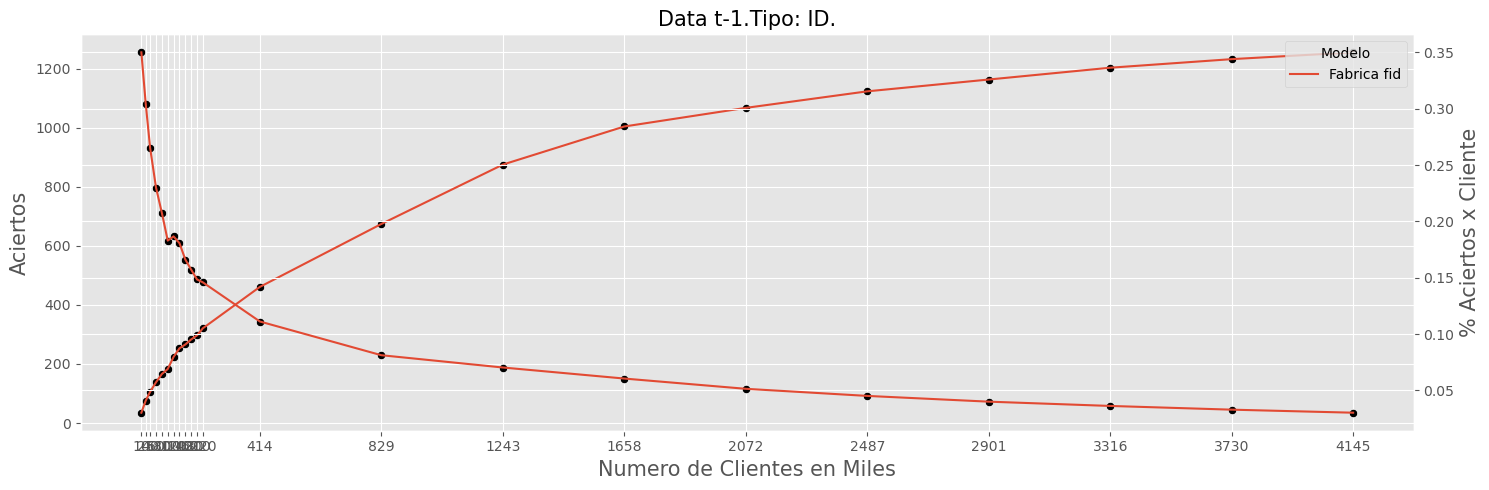

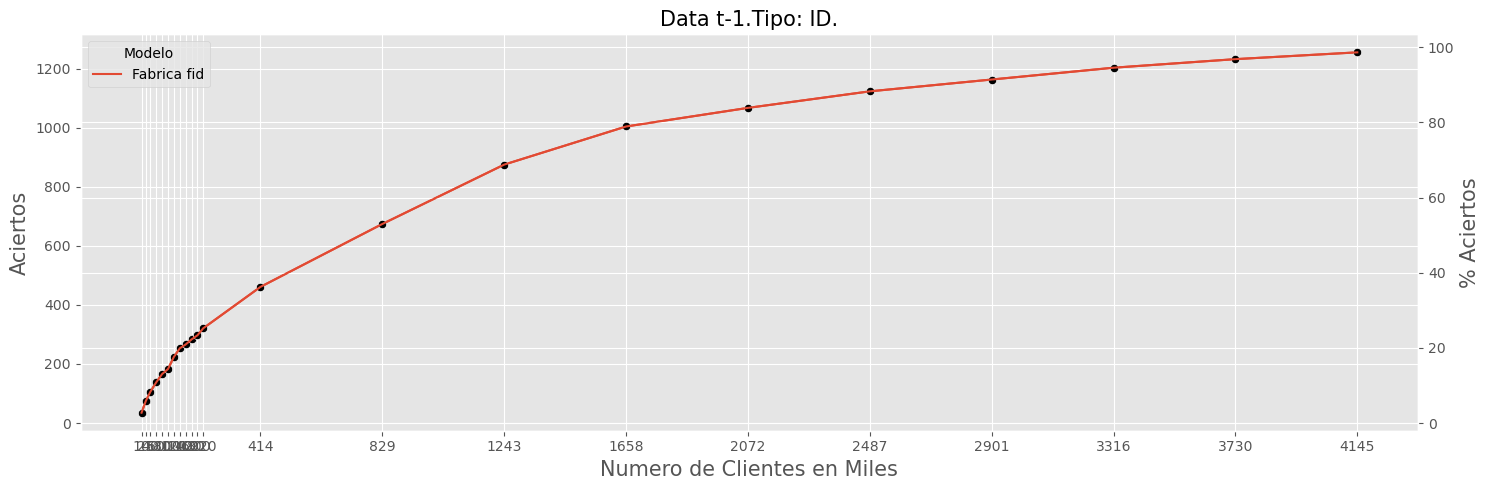

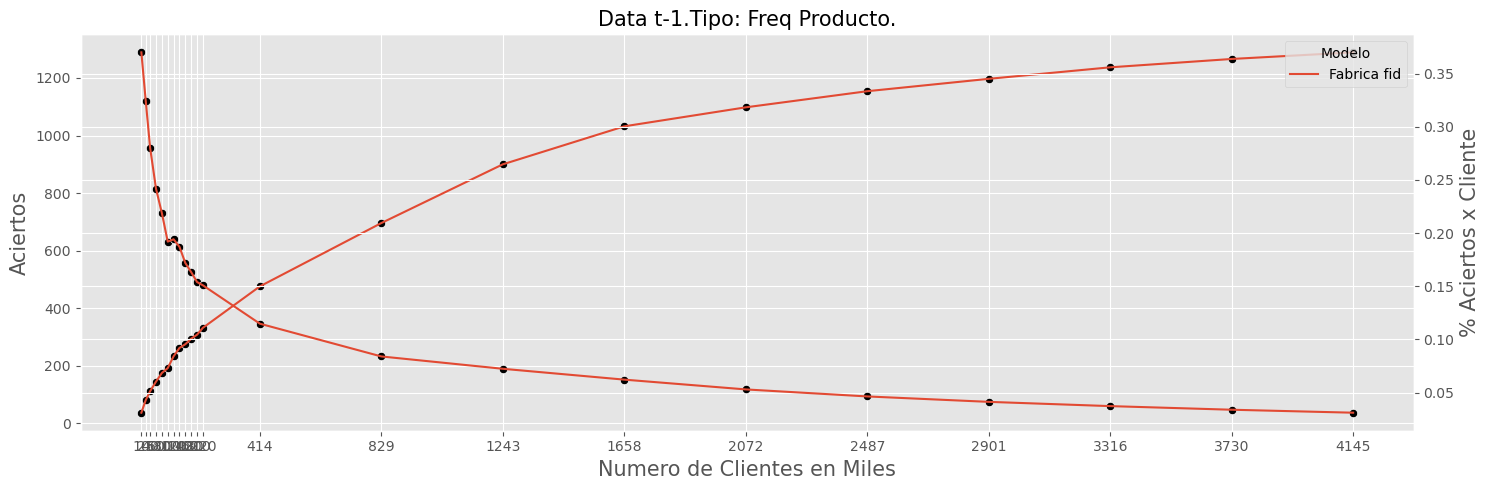

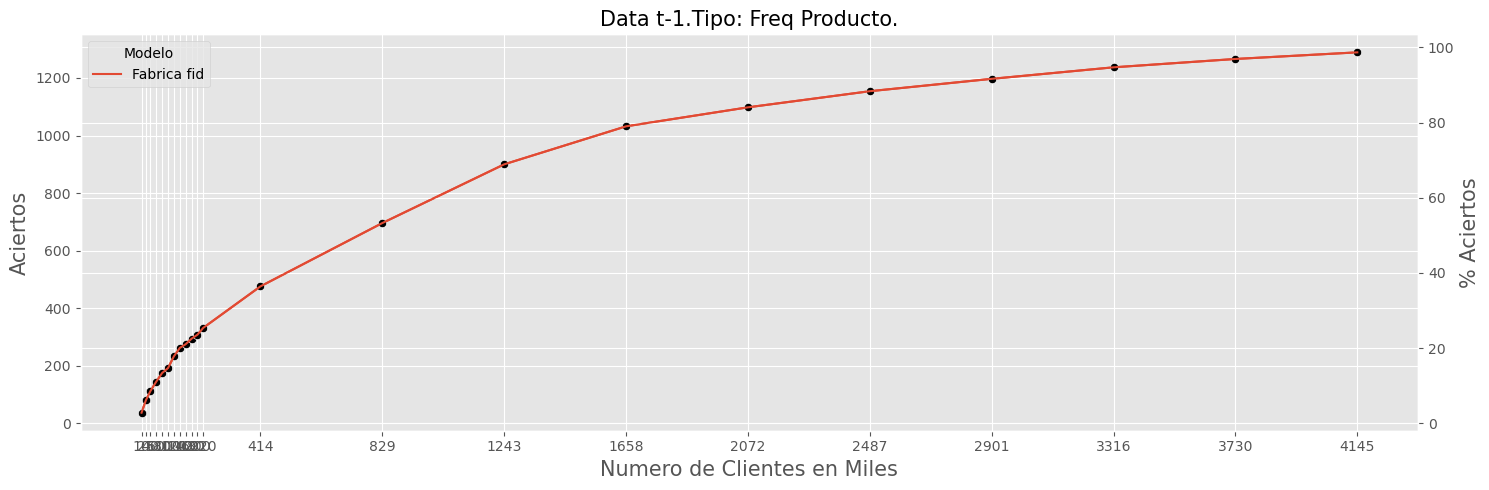

[03/30/25 19:59:24] INFO     ---------------------------------------------------                       ]8;id=551071;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=426772;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#356\356]8;;\

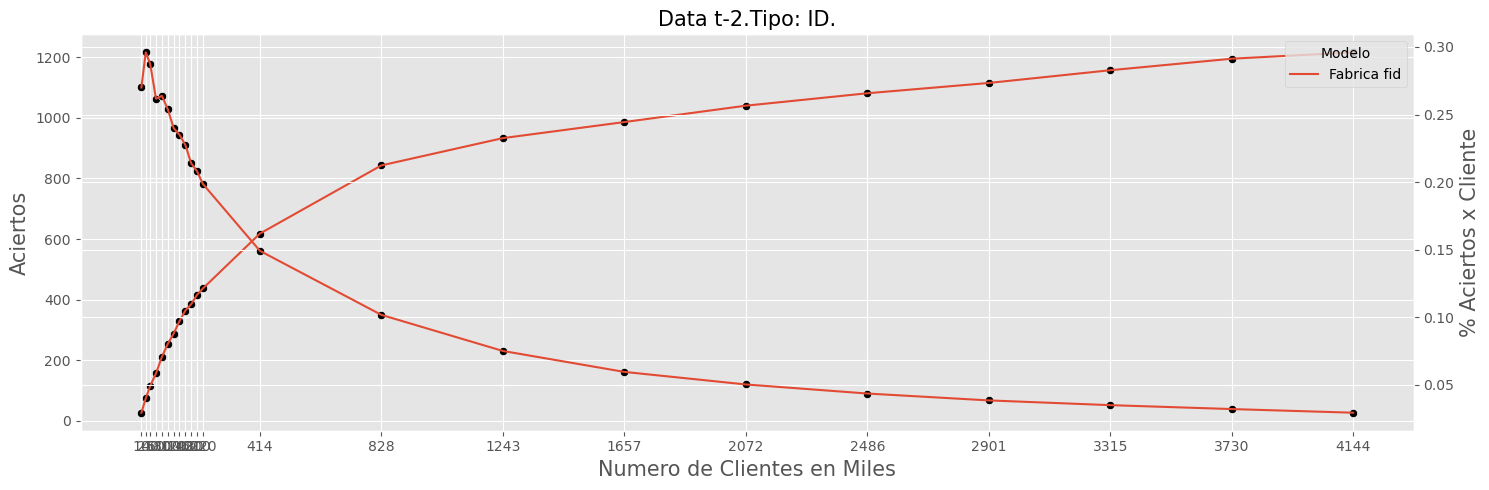

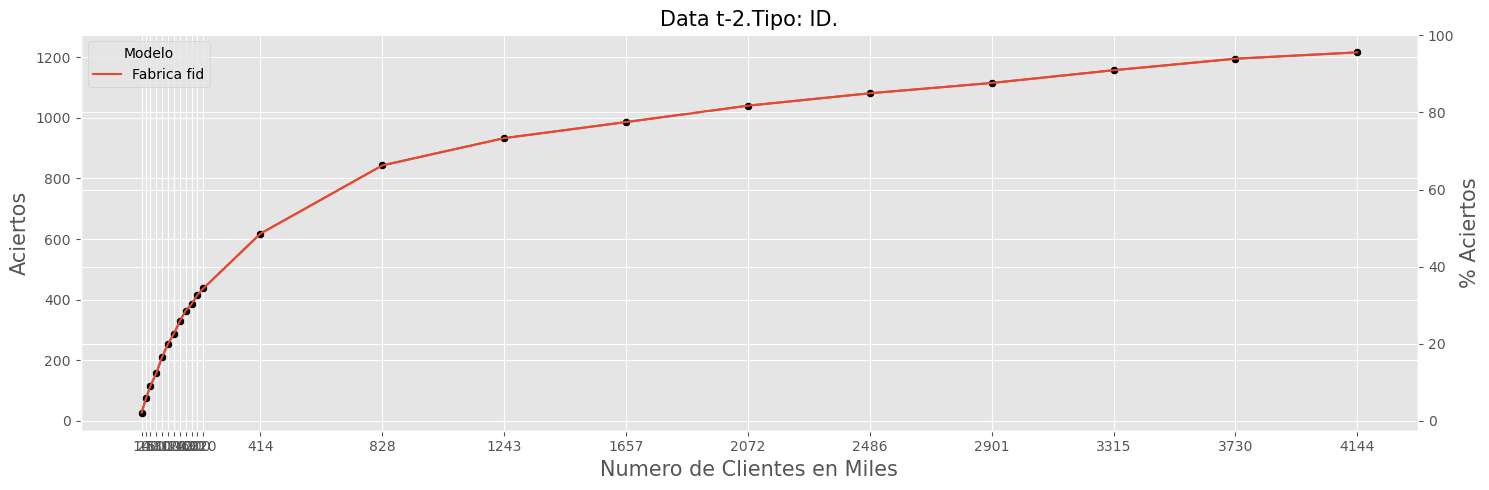

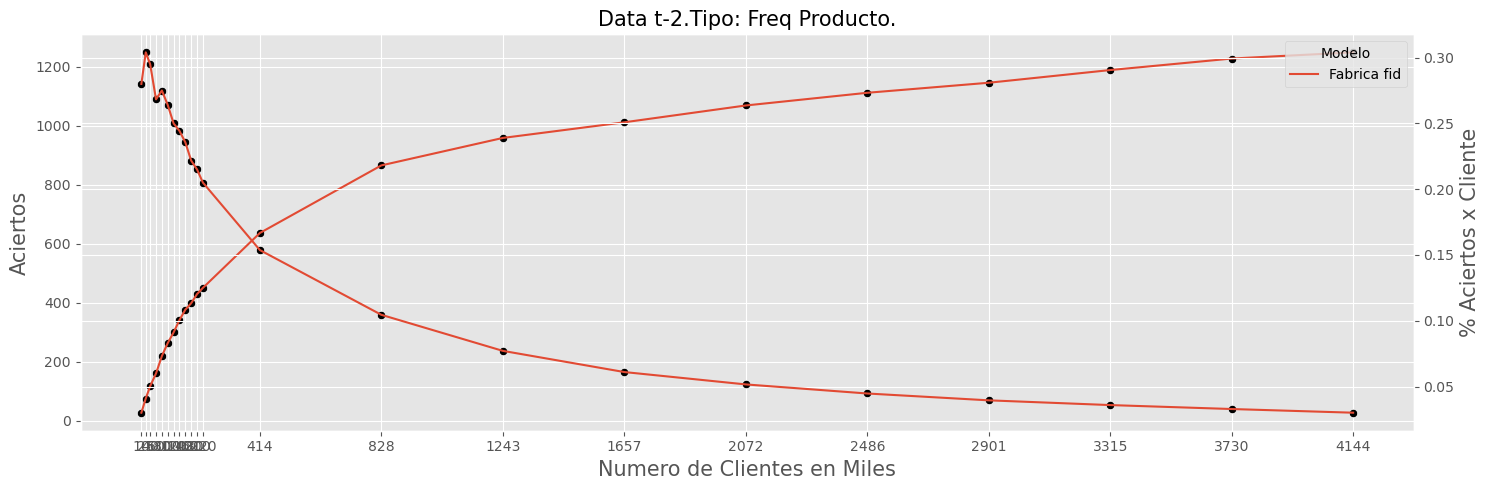

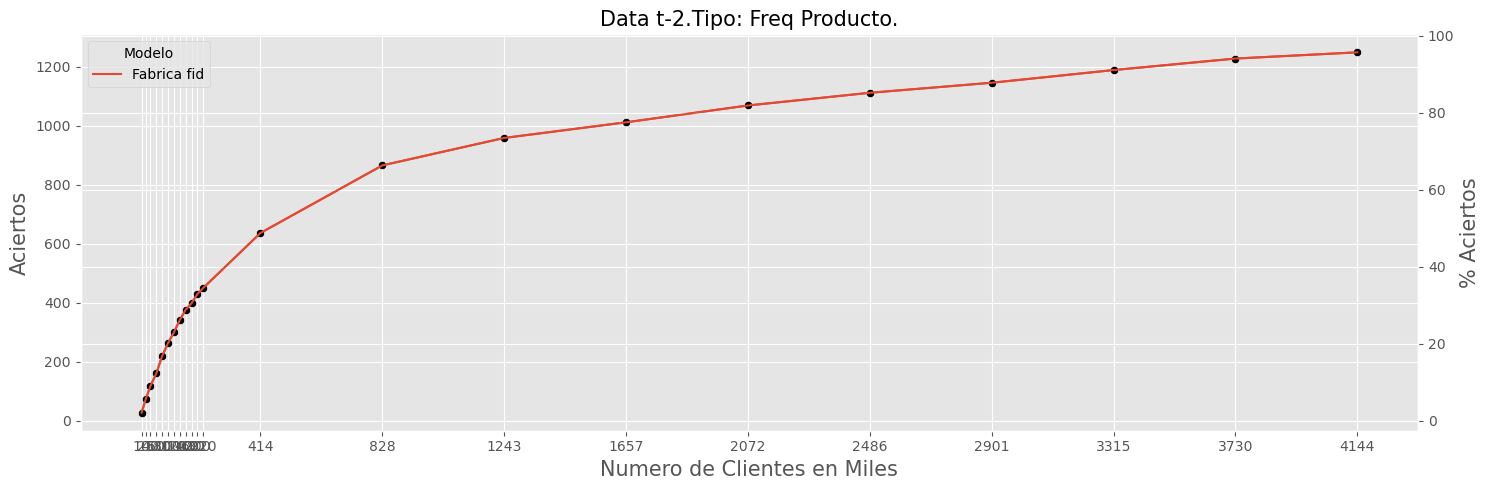

[03/30/25 19:59:26] INFO     ---------------------------------------------------                       ]8;id=709549;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=19615;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#356\356]8;;\

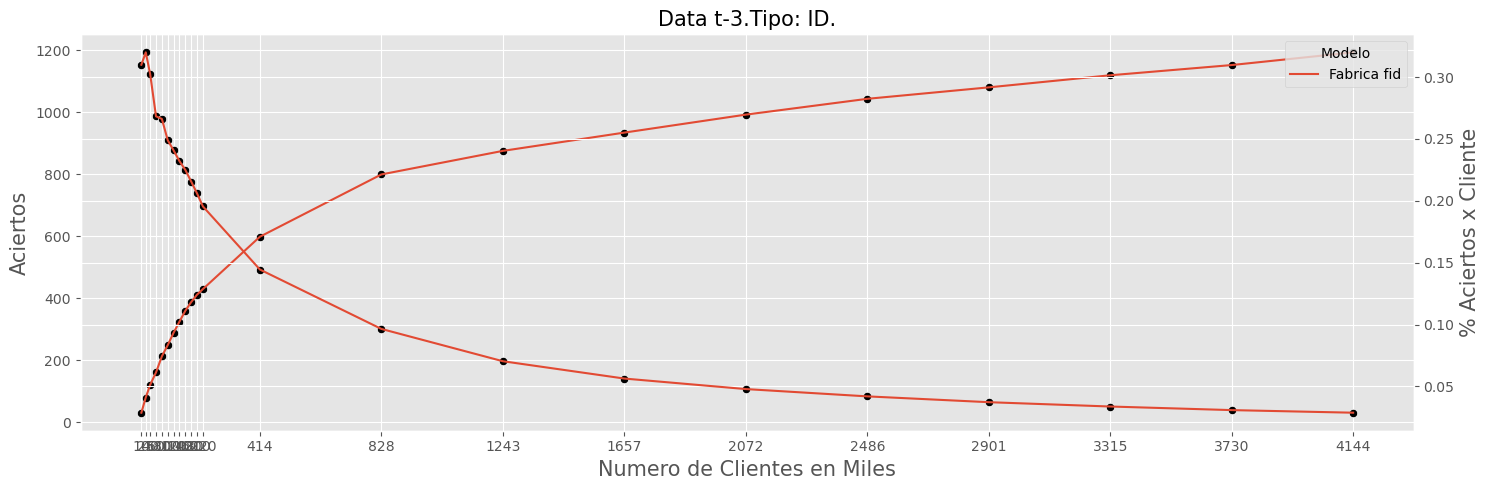

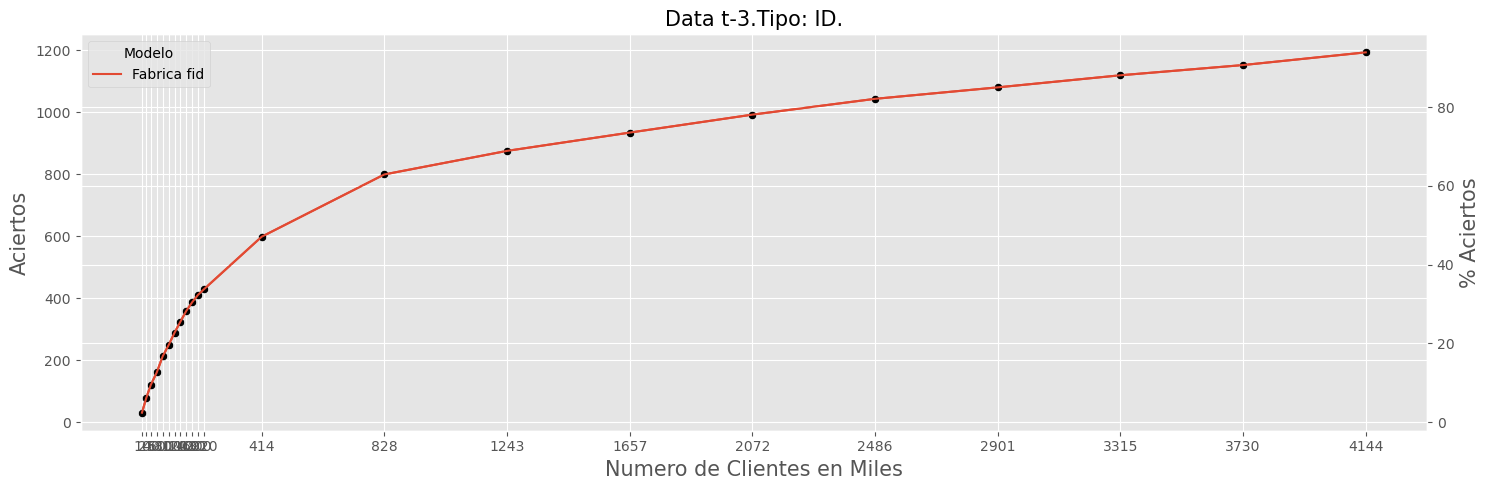

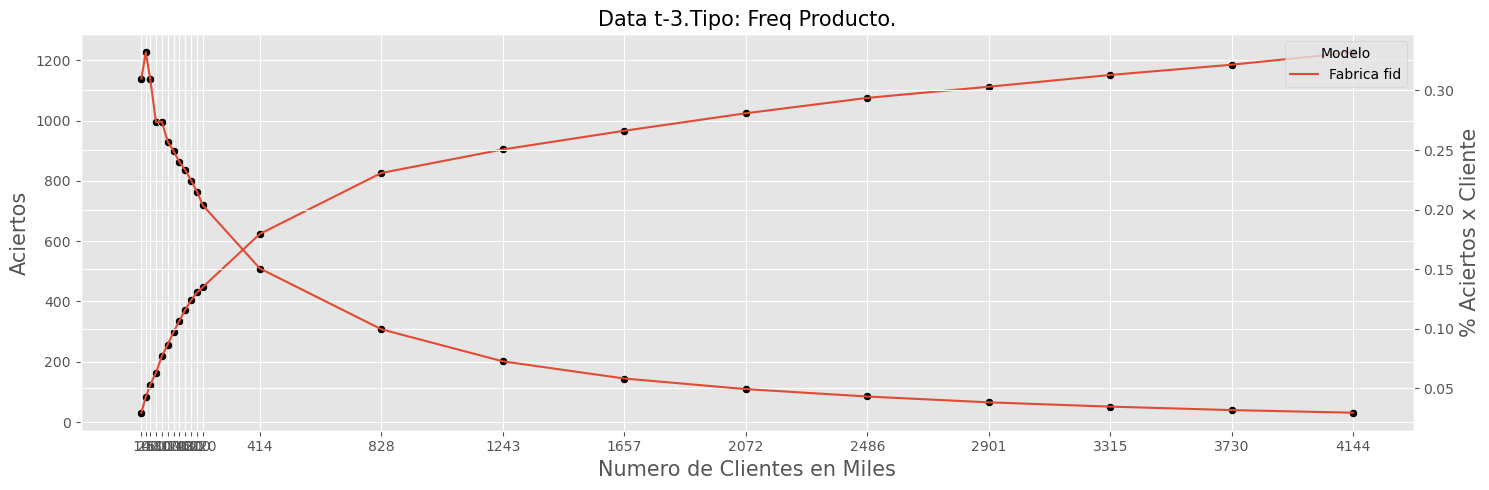

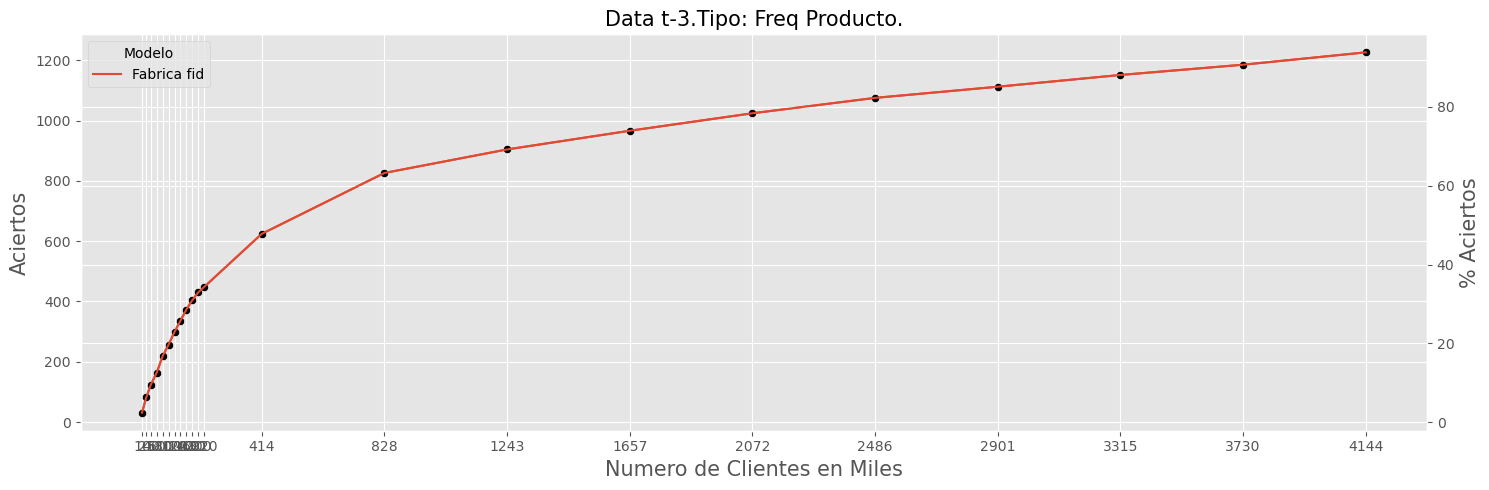

[03/30/25 19:59:28] INFO     ---------------------------------------------------                       ]8;id=172639;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=6643;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#356\356]8;;\

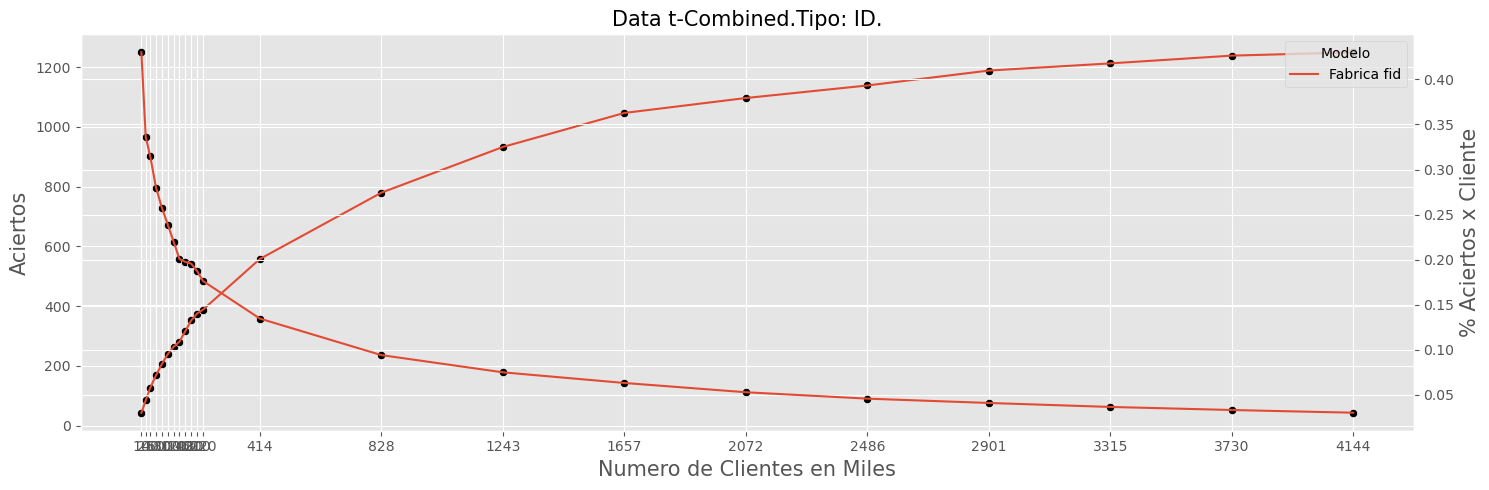

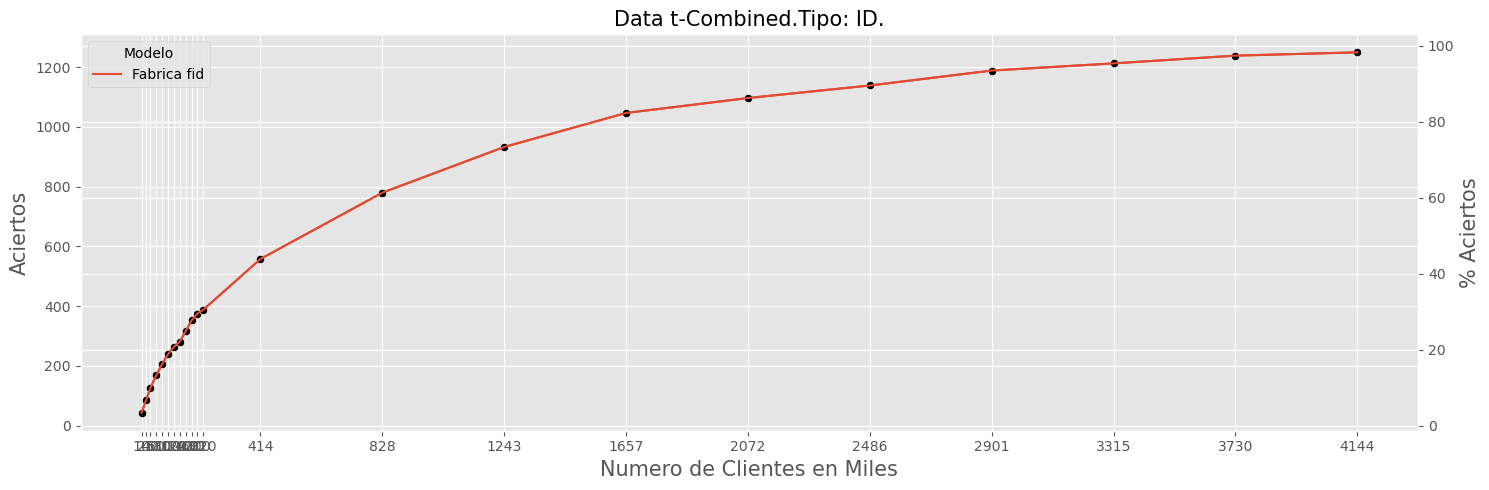

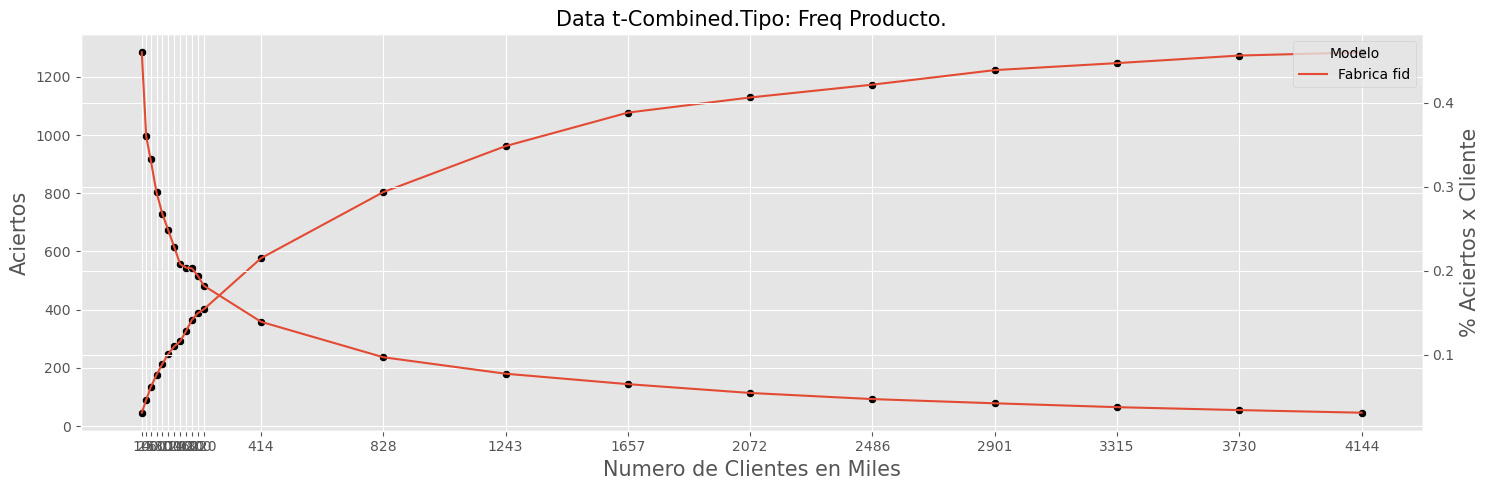

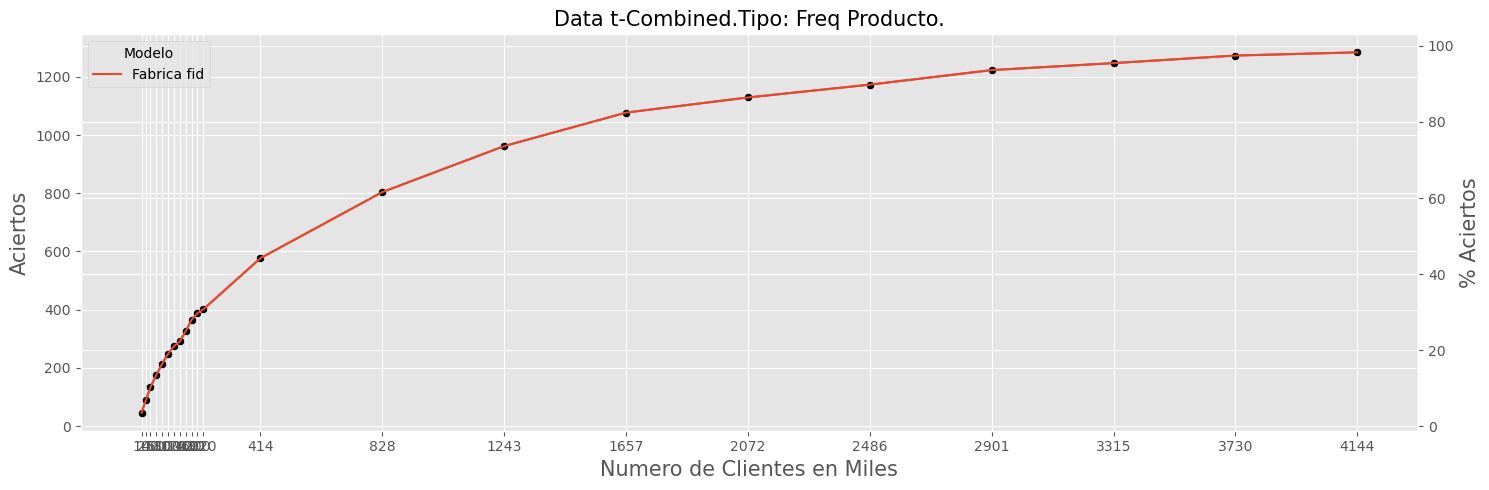

[03/30/25 19:59:30] INFO     ---------------------------------------------------                       ]8;id=373906;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=238187;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#356\356]8;;\

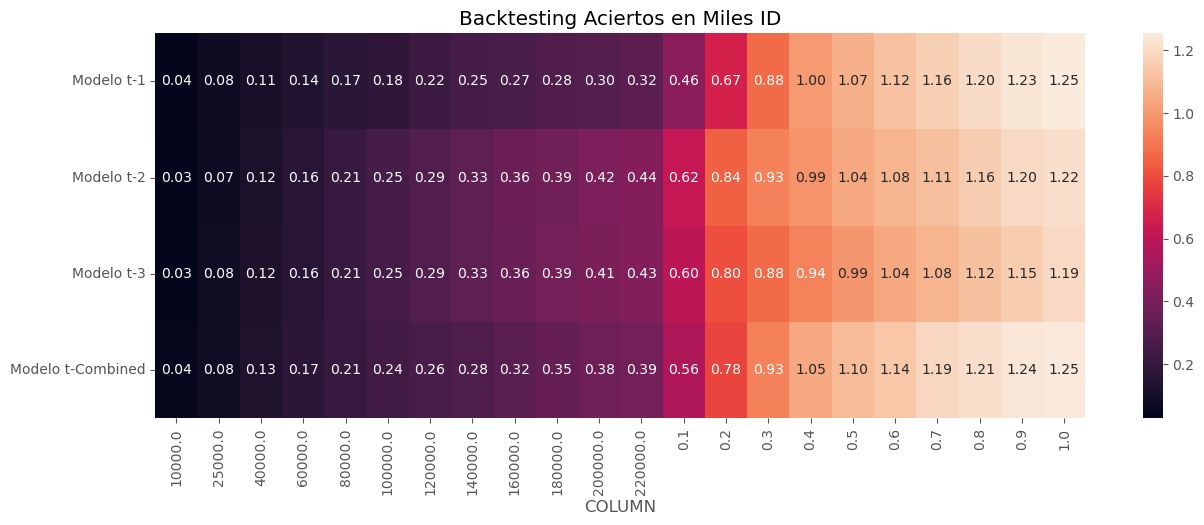

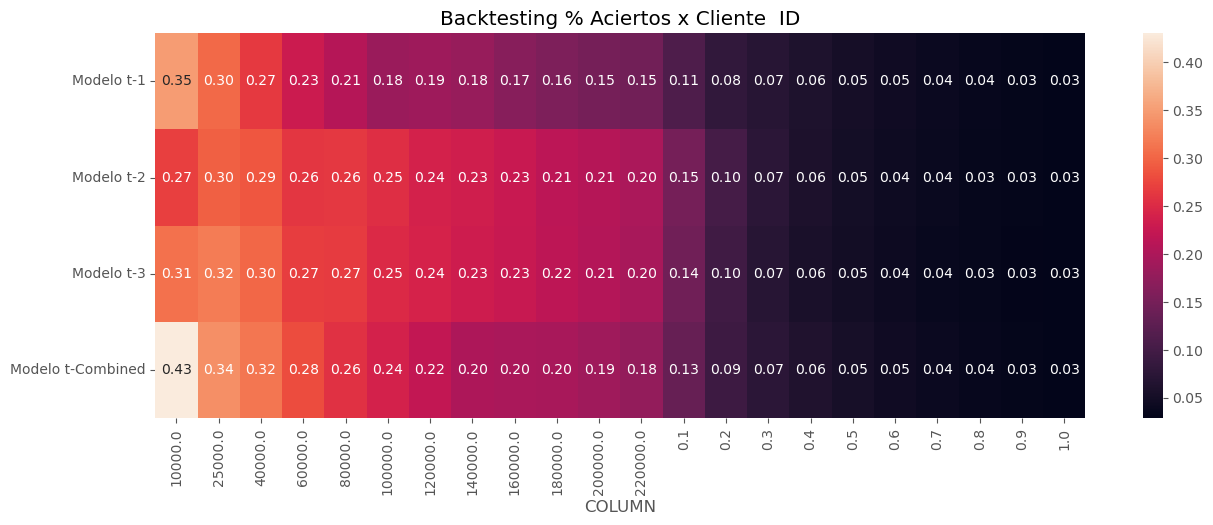

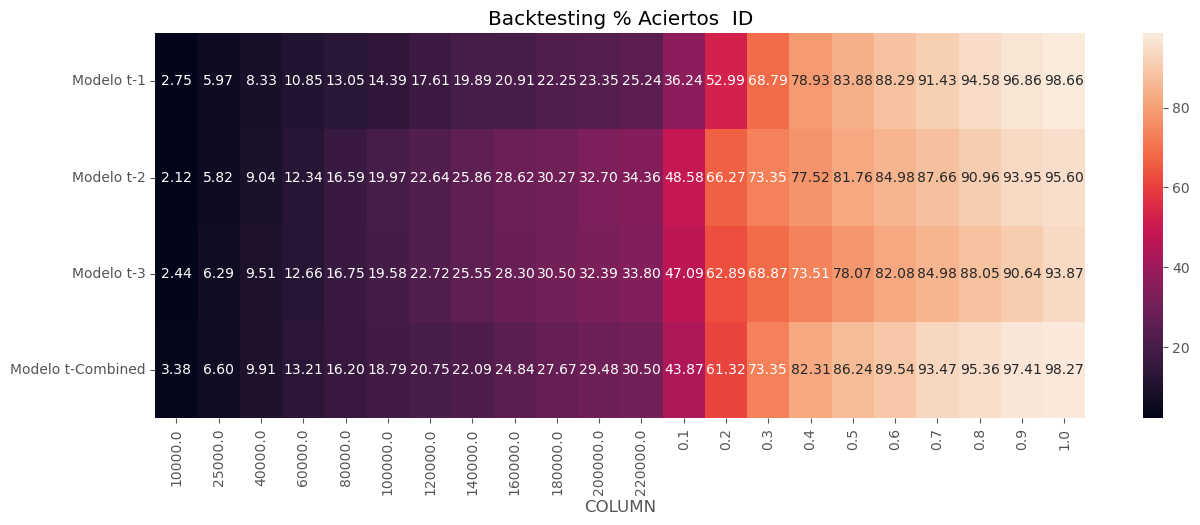

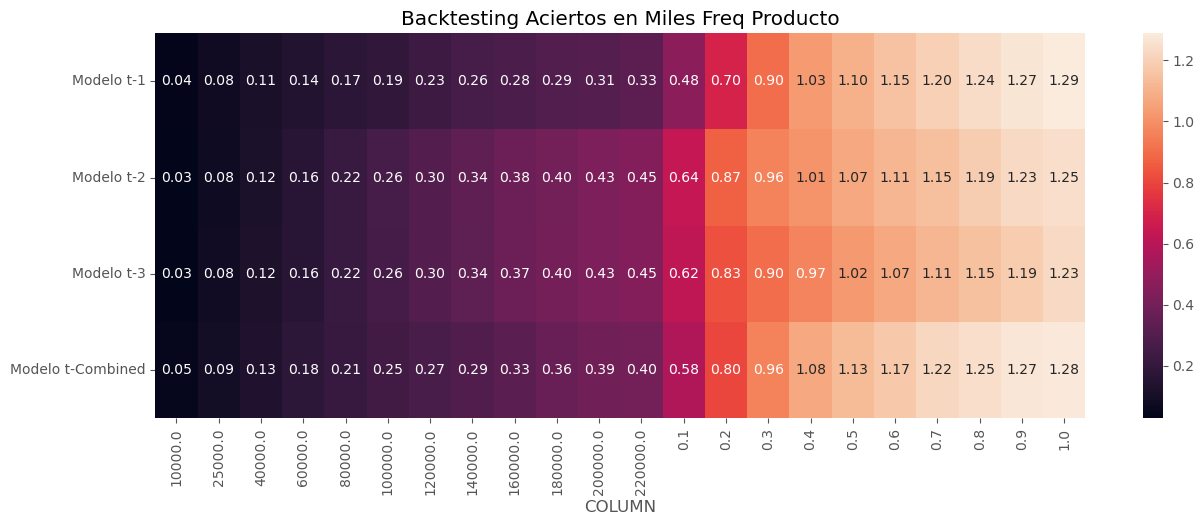

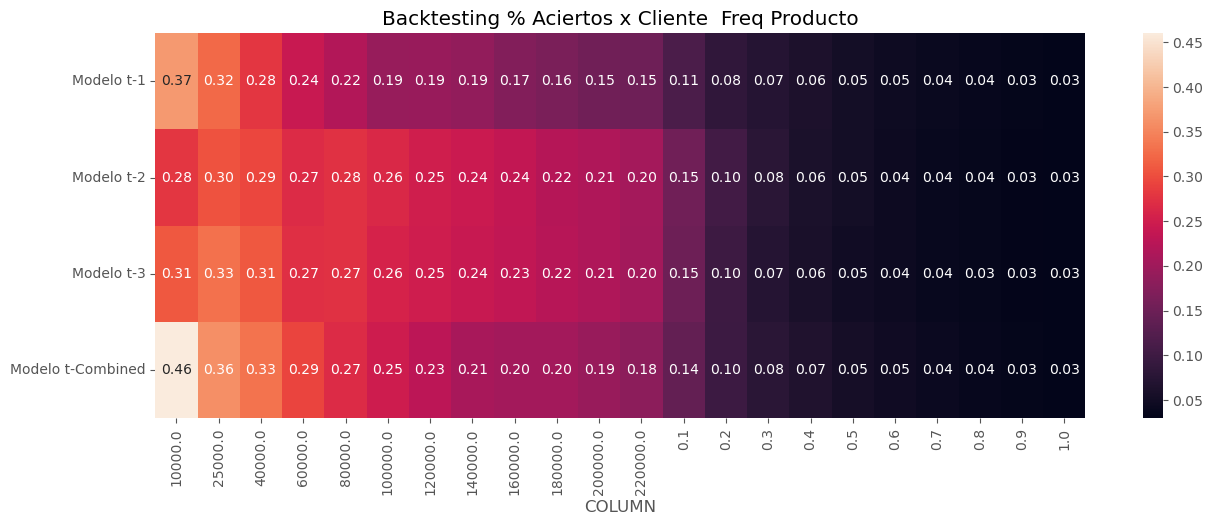

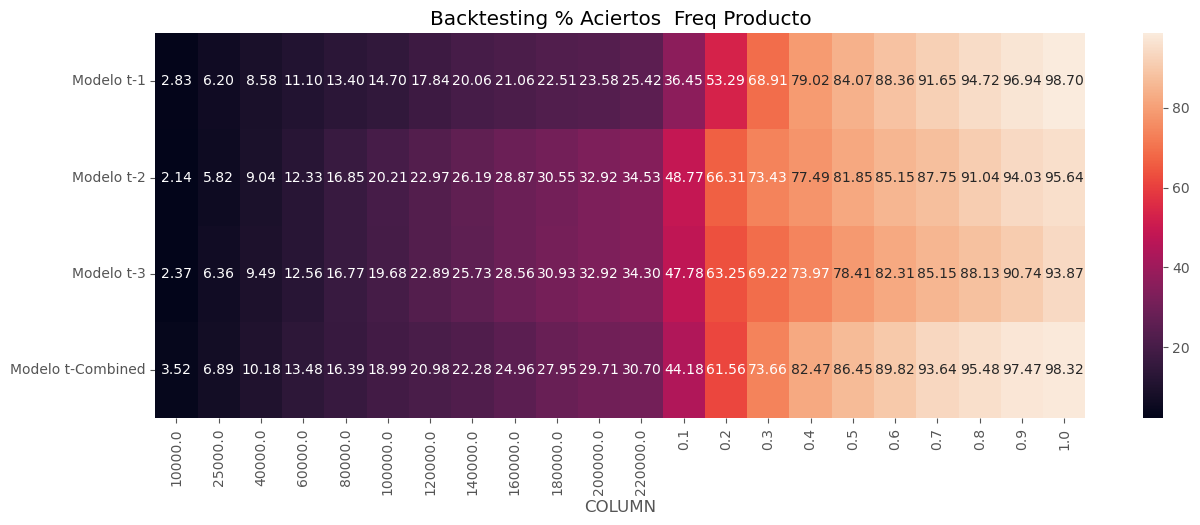

[03/30/25 19:59:34] INFO     Reduciendo memoria en el archivo...                                       ]8;id=603510;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=305241;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#657\657]8;;\

[03/30/25 19:59:38] INFO     Optimizacion realizada...                                                 ]8;id=777111;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=590360;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#662\662]8;;\

                    INFO     Generando los insumos del modelo 360...                                   ]8;id=941923;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=838541;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#663\663]8;;\

                    INFO     Iniciando insumo modelo 360 t-1                                           ]8;id=358451;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=872875;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#569\569]8;;\

                    INFO     Finalizando insumo modelo 360 t-1                                         ]8;id=808166;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=178768;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#576\576]8;;\

                    INFO     Iniciando insumo modelo 360 t-2                                           ]8;id=806426;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=52117;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#569\569]8;;\

                    INFO     Finalizando insumo modelo 360 t-2                                         ]8;id=521283;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=792902;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#576\576]8;;\

                    INFO     Iniciando insumo modelo 360 t-3                                           ]8;id=451047;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=820505;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#569\569]8;;\

                    INFO     Finalizando insumo modelo 360 t-3                                         ]8;id=231495;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=674526;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#576\576]8;;\

                    INFO     Iniciando insumo modelo 360 t-Combined                                    ]8;id=480613;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=126384;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#569\569]8;;\

                    INFO     Finalizando insumo modelo 360 t-Combined                                  ]8;id=324384;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=469842;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#576\576]8;;\

In [14]:
data_process_copy = data_process.copy()
data_process1,insumo_model_360 = backtesting.combinar_predicciones_reales(data_process_copy,nombre_modelo, parametros)

import boto3
import pandas as pd
import os
import pickle

# Save the DataFrame locally first
local_path = '/home/sagemaker-user/data-bbog-integration-fabrica-personas/notebooks/Calibracion de Productos/insumo_modelo_360_v3_202502.pickle'
# Serialize the object to a file
with open(local_path, 'wb') as file:
    pickle.dump(insumo_model_360, file)

# Initialize the S3 client using boto3
s3_client = boto3.client('s3')

# Define the S3 bucket and object path
bucket_name = 'data-bbog-dev-sandbox-entity'
s3_path = 'casos-uso/fabrica-personas/FID/09-backtesting/insumo_modelo_360_v3_202502.pickle'

# Upload the file to S3
s3_client.upload_file(local_path, bucket_name, s3_path)

# Optionally, clean up the local file after upload
os.remove(local_path)

print(f"File uploaded to s3://{bucket_name}/{s3_path}")


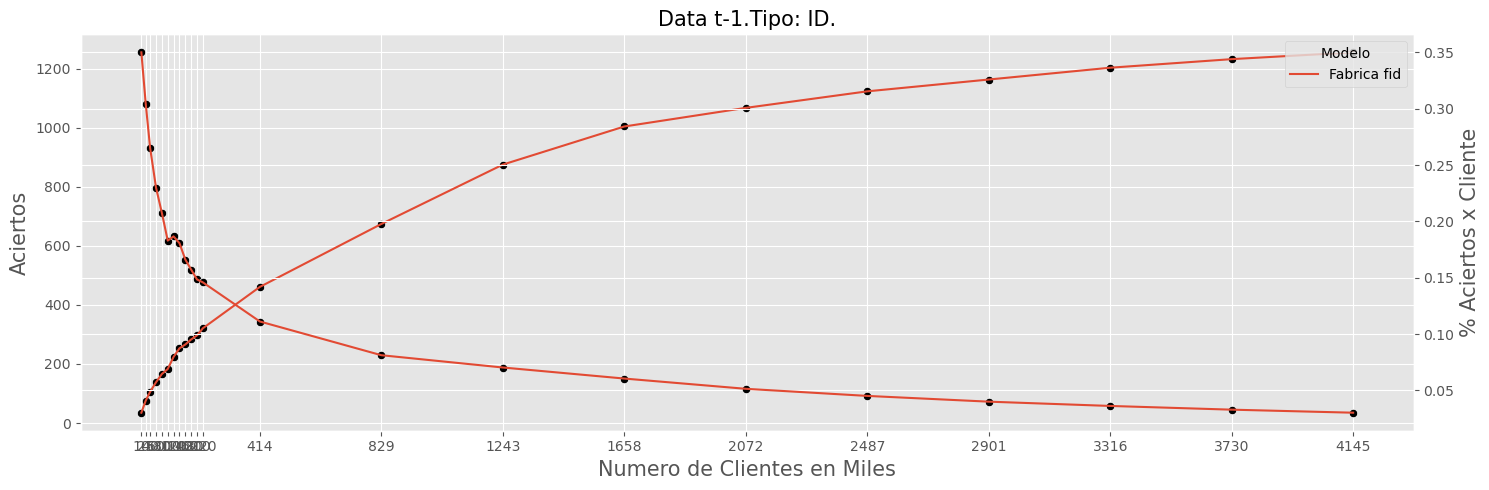

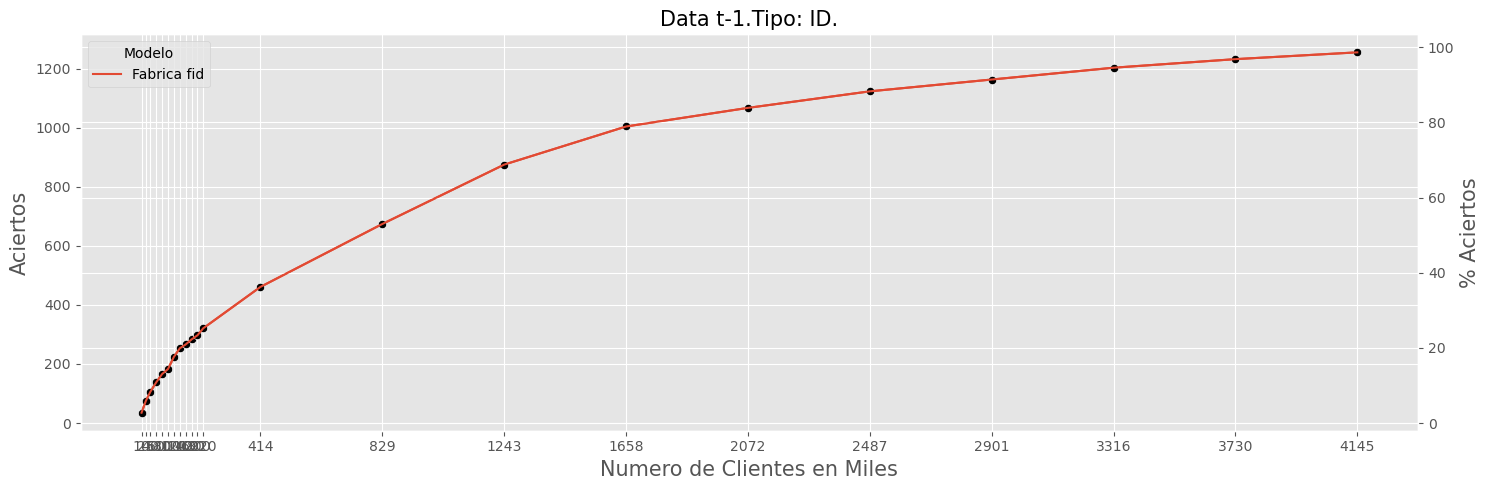

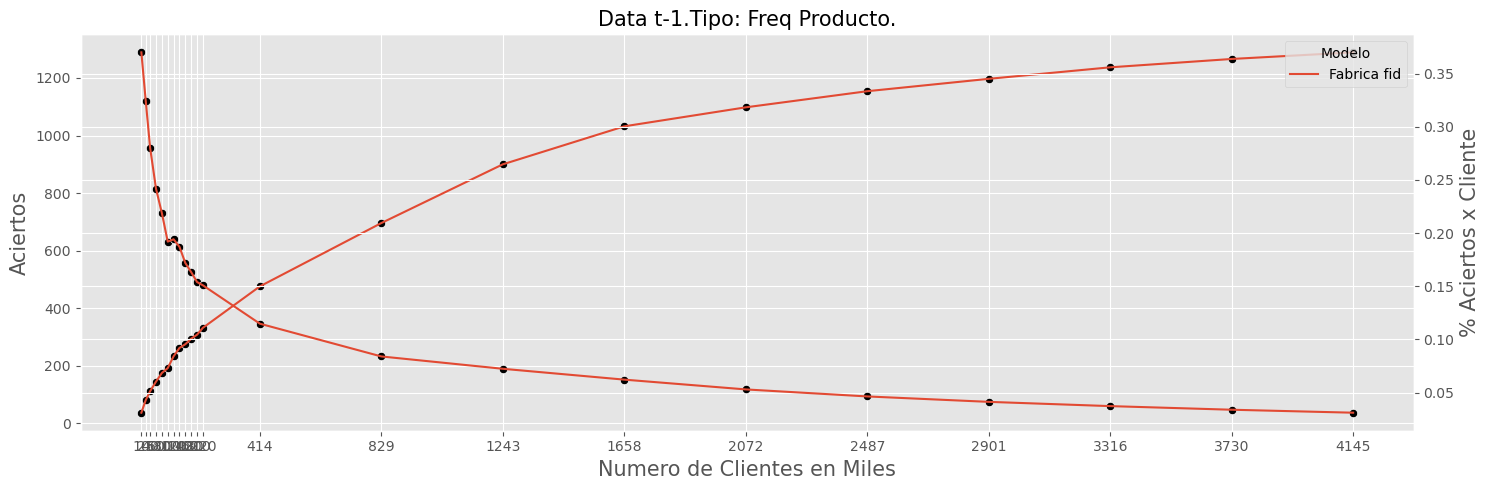

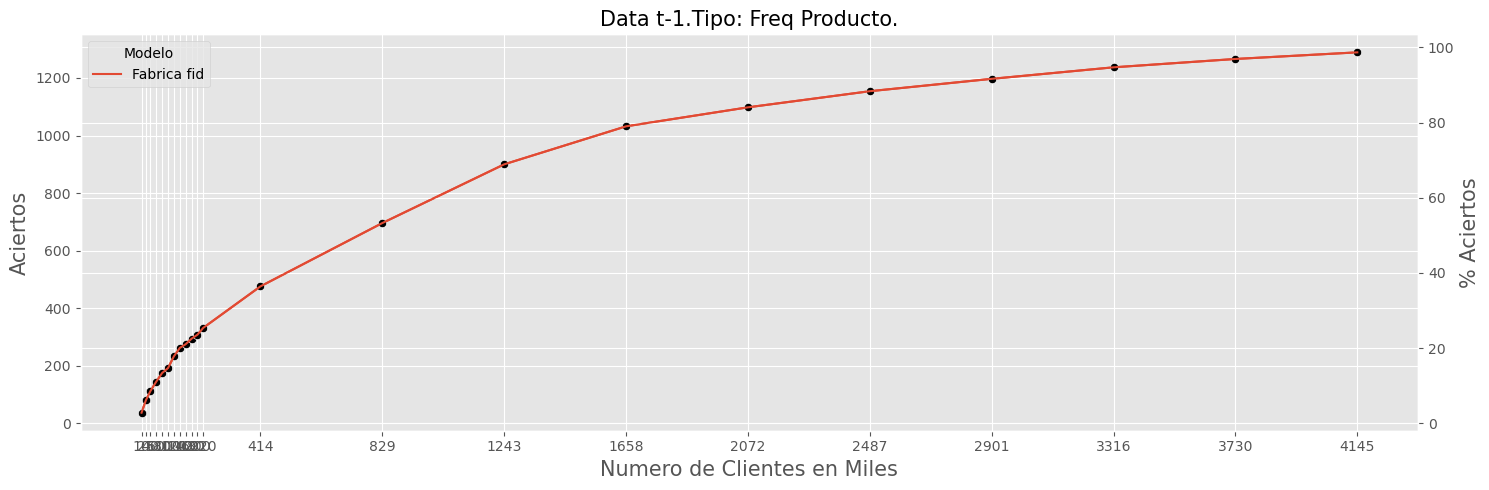

[03/30/25 20:07:13] INFO     ---------------------------------------------------                       ]8;id=358603;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=501555;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#356\356]8;;\

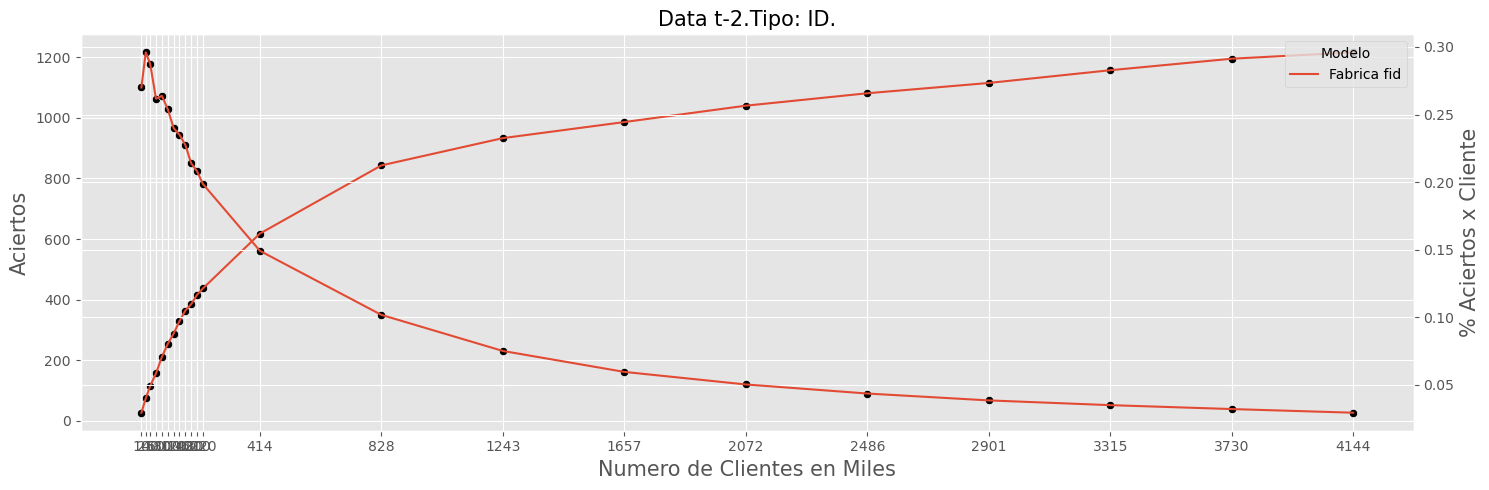

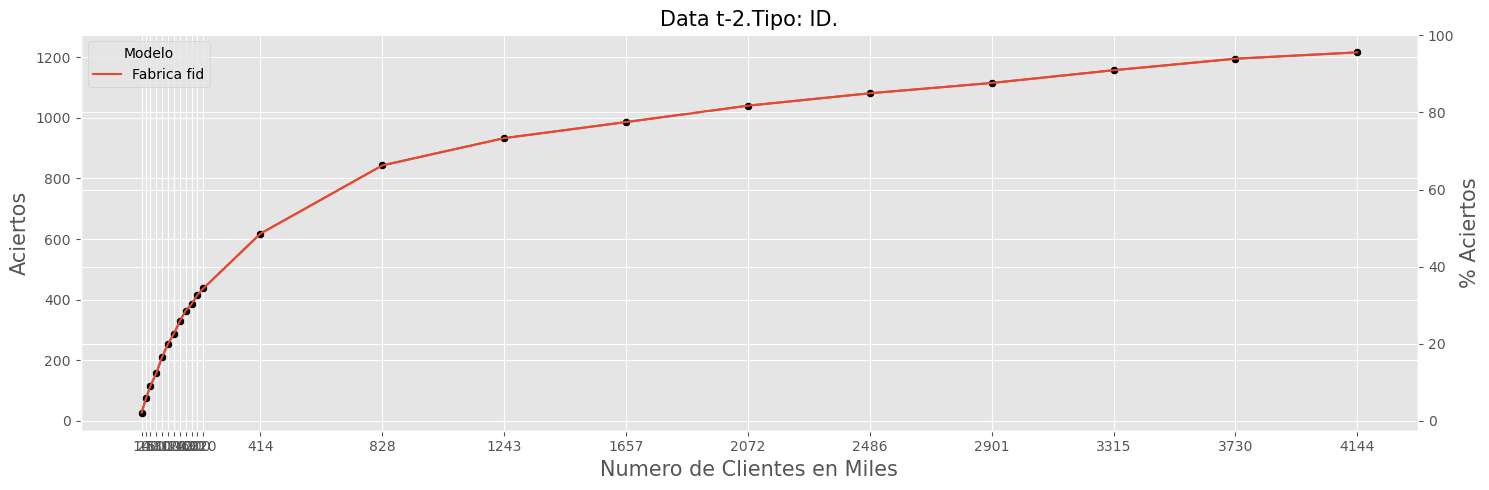

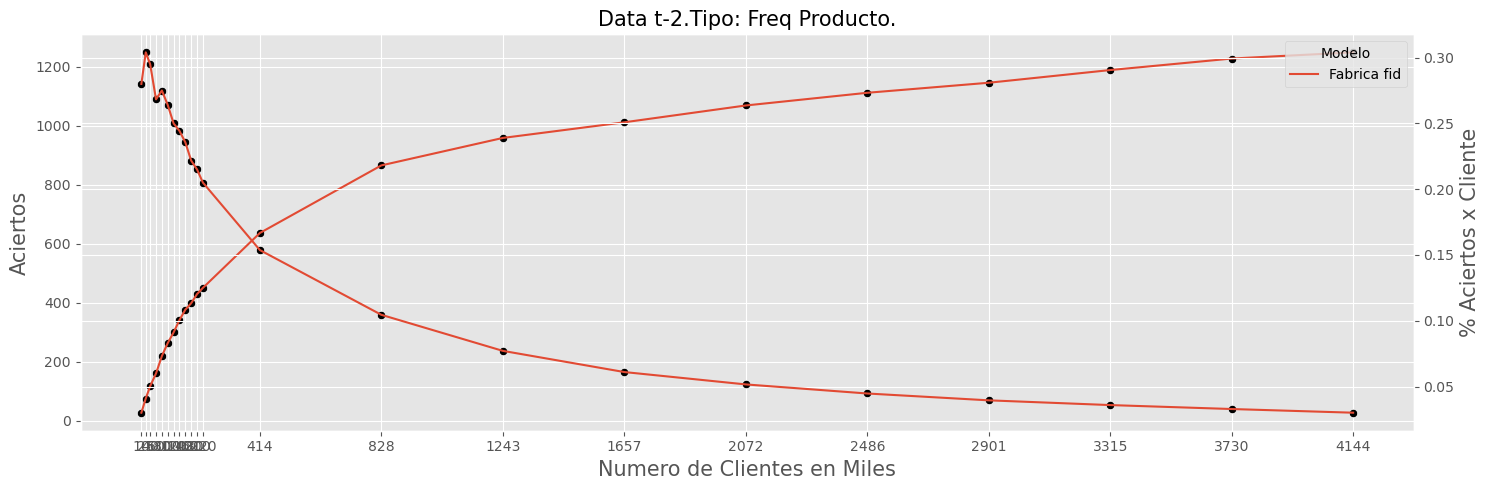

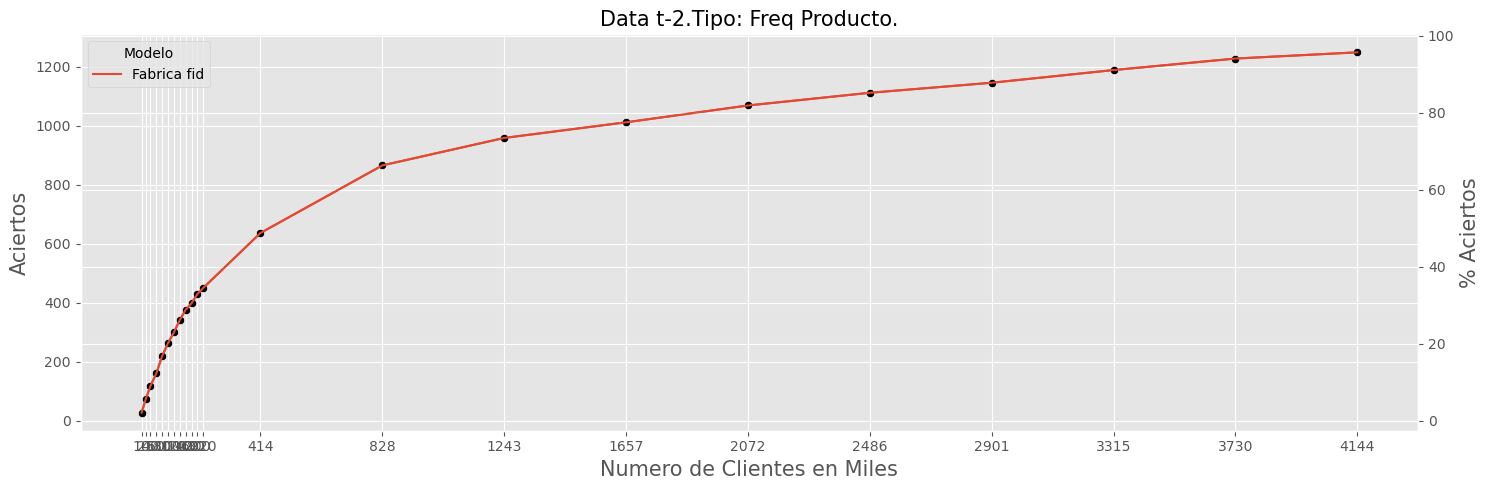

[03/30/25 20:07:15] INFO     ---------------------------------------------------                       ]8;id=129246;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=767937;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#356\356]8;;\

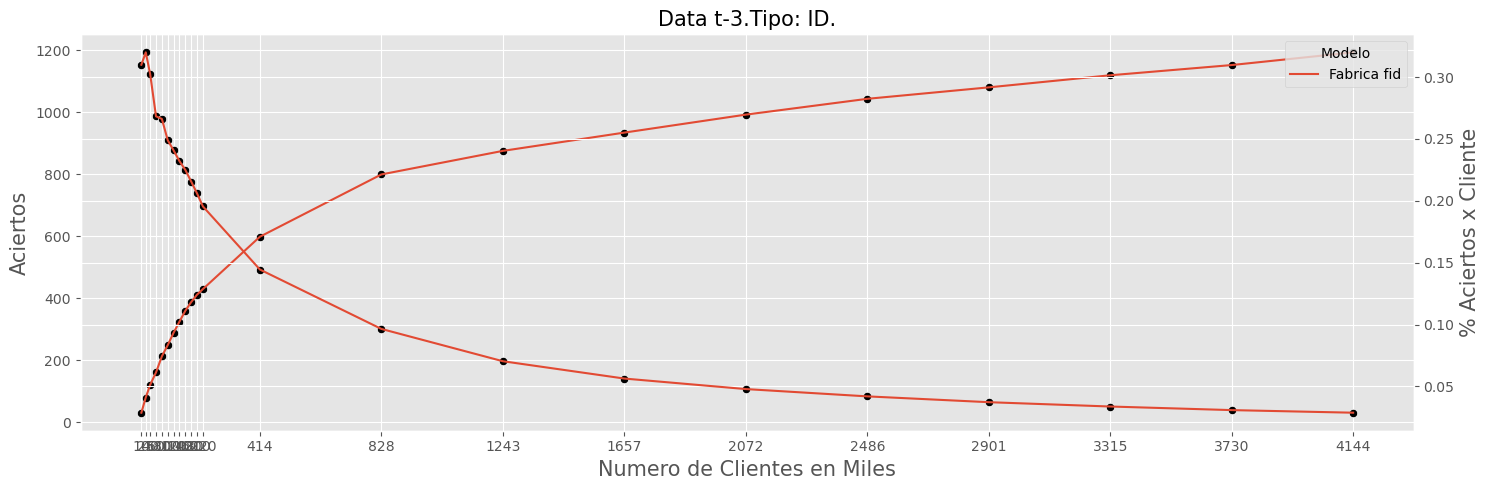

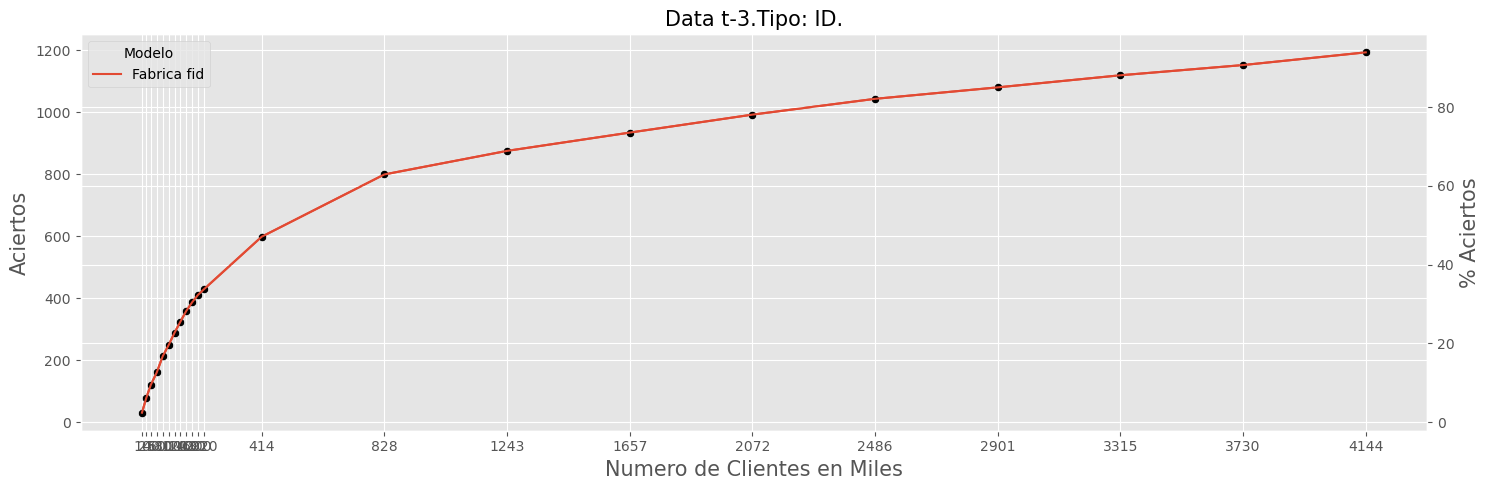

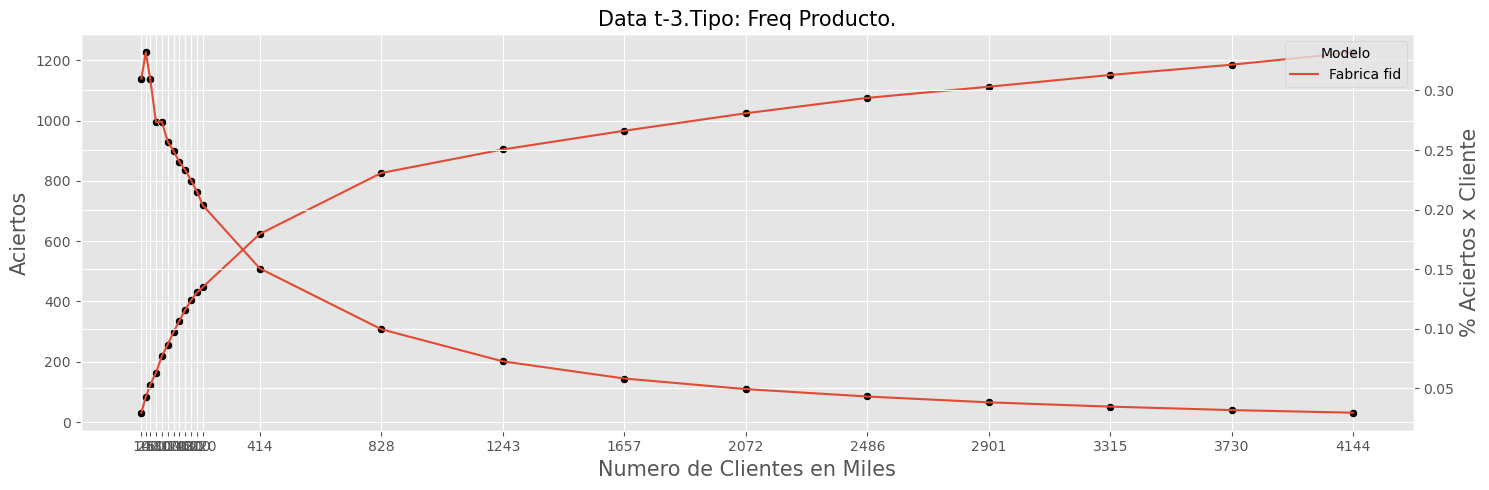

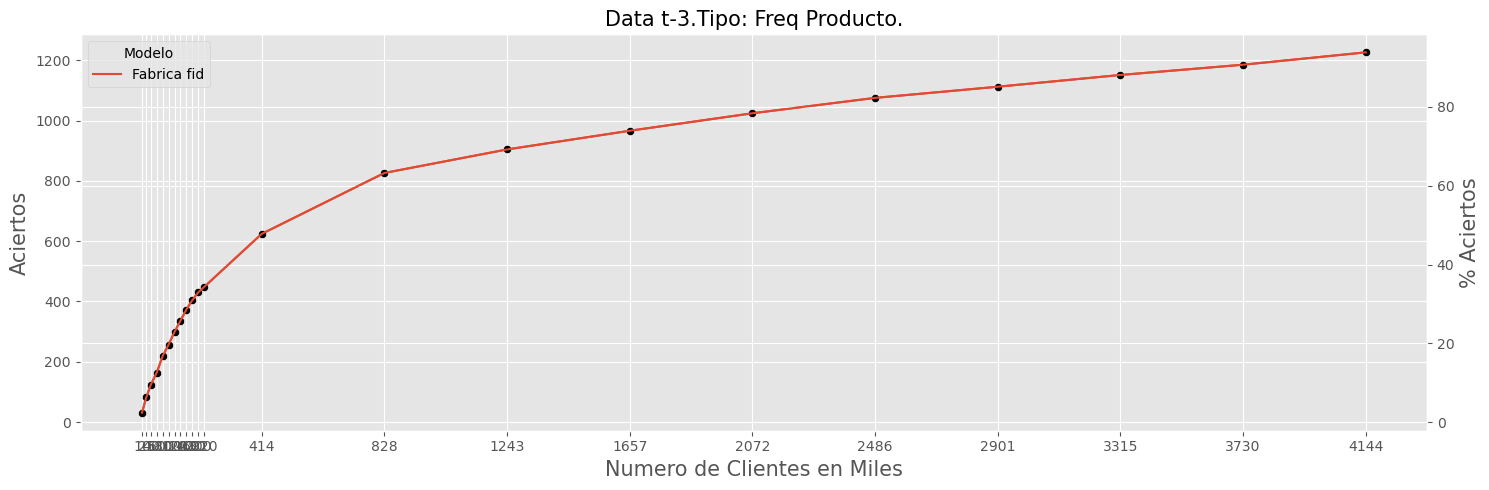

[03/30/25 20:07:16] INFO     ---------------------------------------------------                       ]8;id=424320;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=325564;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#356\356]8;;\

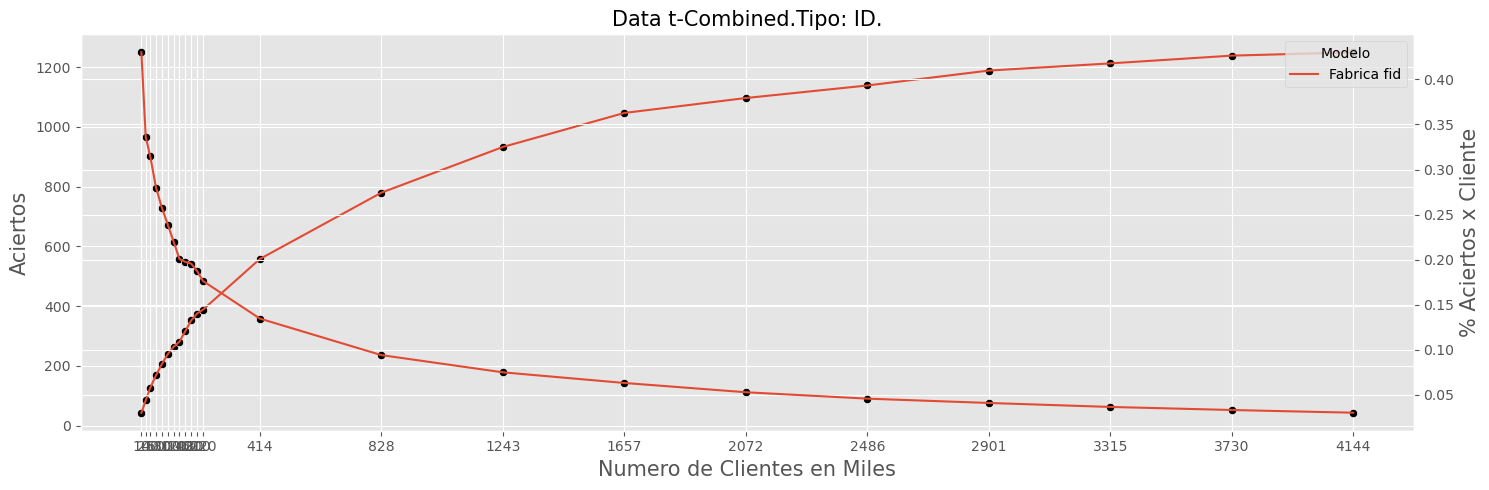

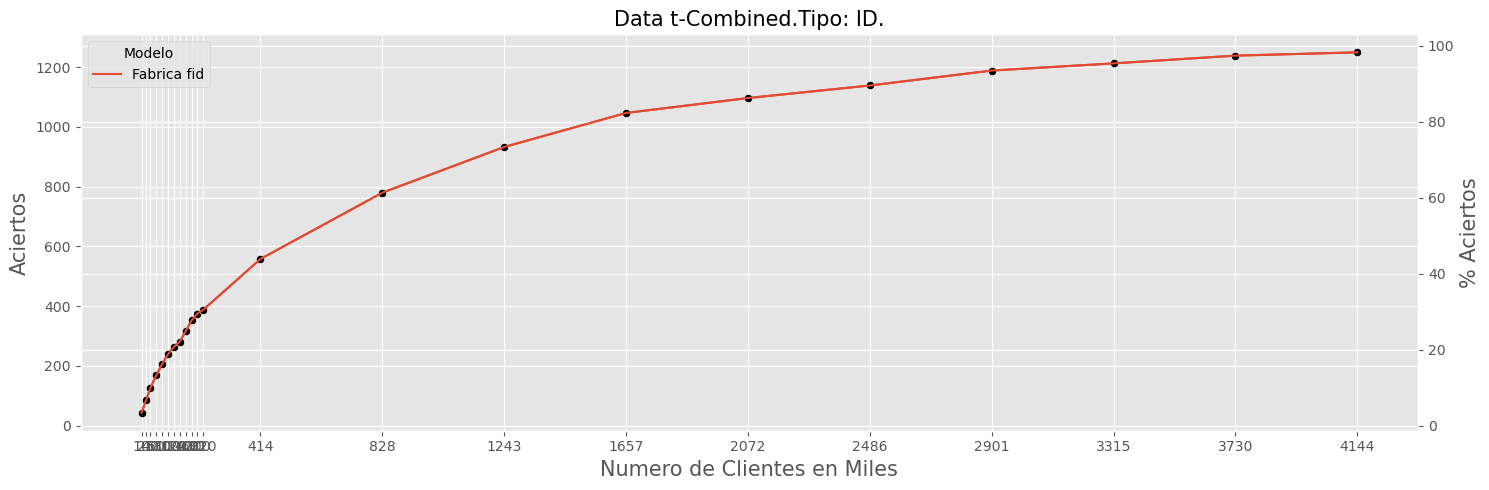

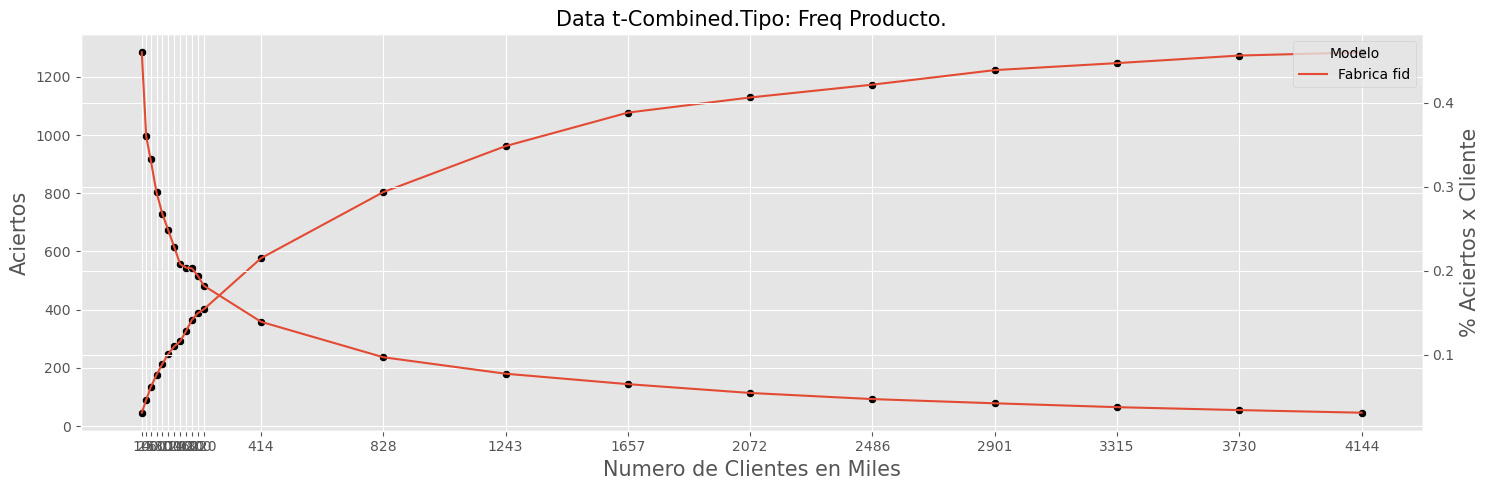

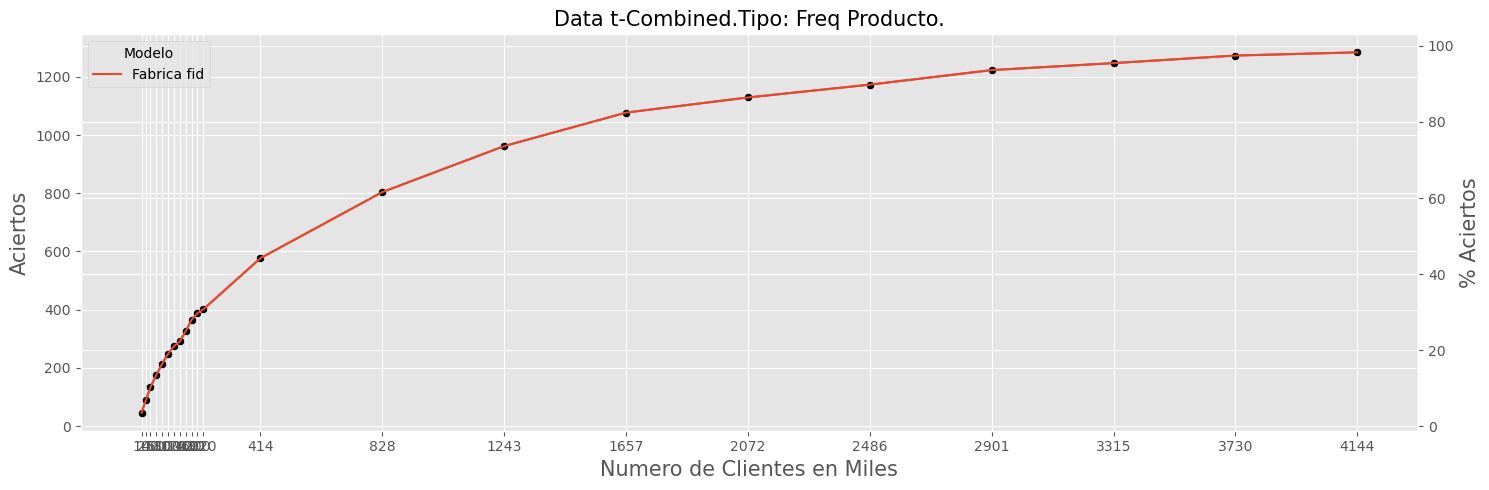

[03/30/25 20:07:18] INFO     ---------------------------------------------------                       ]8;id=488450;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=202146;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#356\356]8;;\

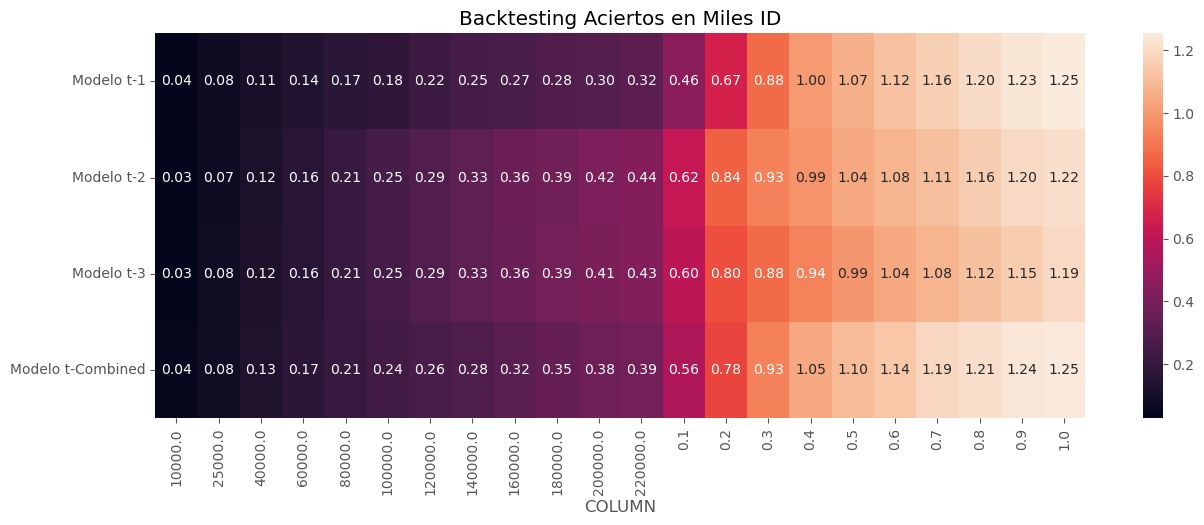

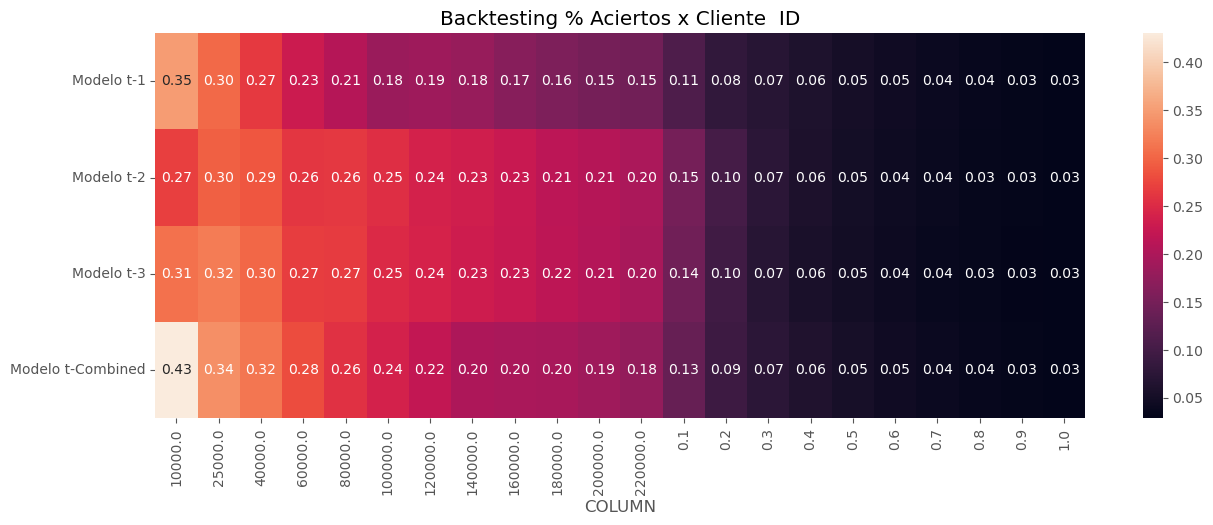

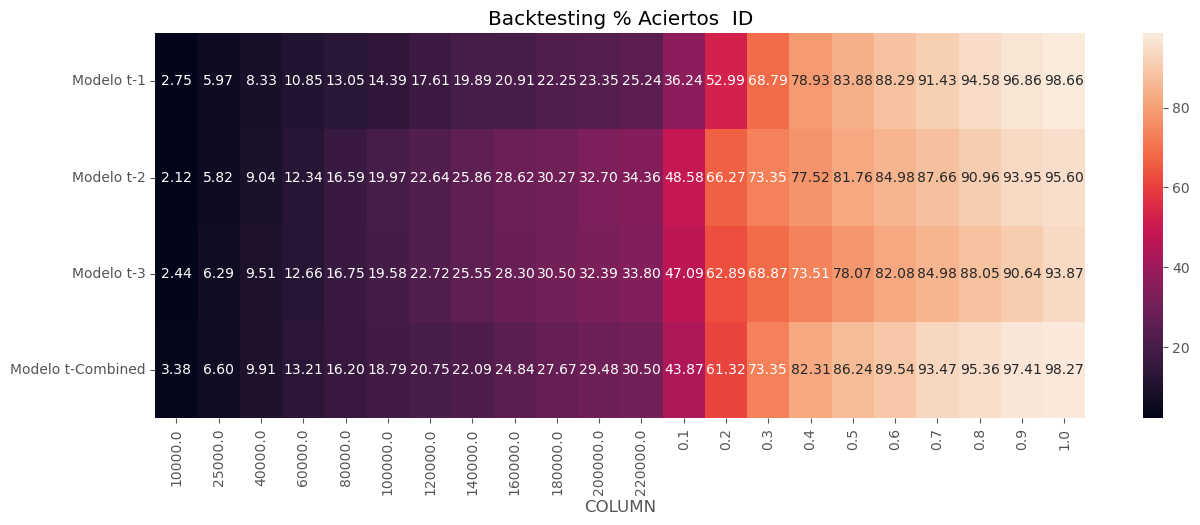

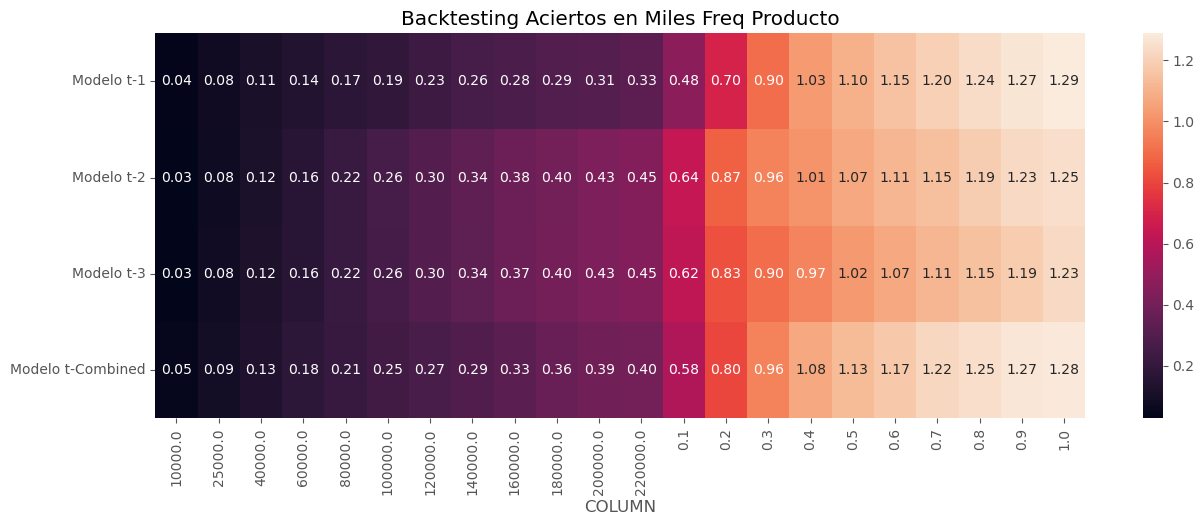

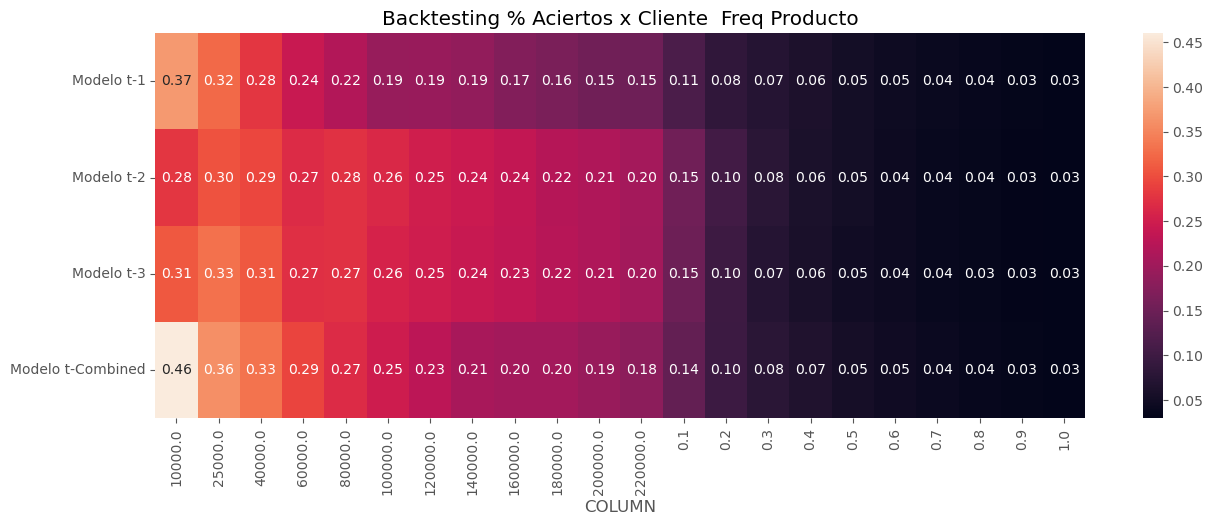

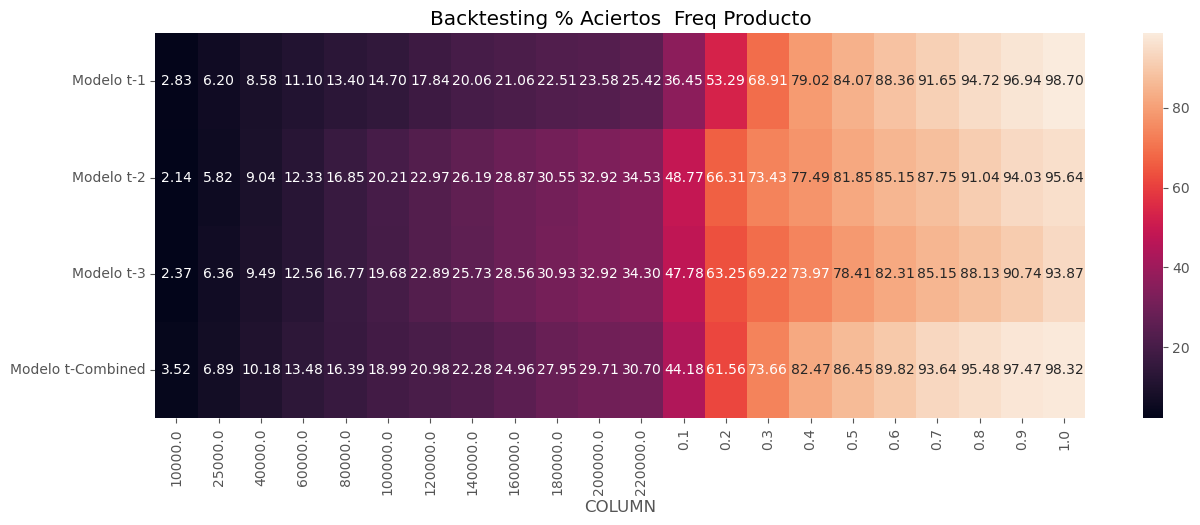

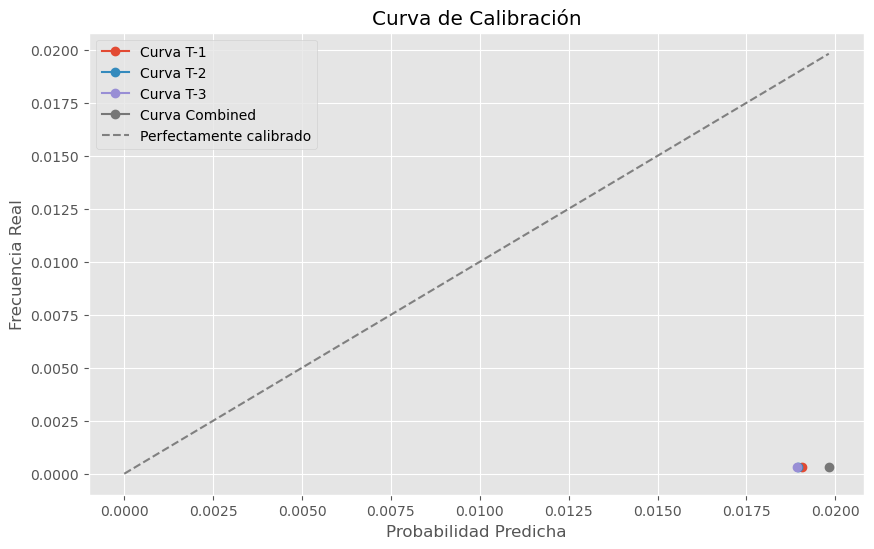

In [18]:
backtesting.plotear_curvas_rezago(data_process1,parametros)
plt.figure(figsize=(10, 6))
max_value = 0
for i in data_process1.keys():
    prob_true = data_process1[i]['prob_true']
    prob_pred = data_process1[i]['prob_pred']
    # Graficar la curva de calibración
    try:
        msg = " T-"+str(int(i))
    except:
        msg = " "+str(i)
    plt.plot(prob_pred, prob_true, marker='o', label='Curva'+msg)
    max_value = np.max([max_value,np.max(prob_pred)])
plt.plot([0, max_value], [0, max_value], linestyle='--', color='gray', label='Perfectamente calibrado')
plt.title('Curva de Calibración')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia Real')
plt.legend()
plt.show()
# curva > 45 grados = subestimar
# curva < 45 grados = sobrestimar

In [20]:
insumo_model_360[1]['Discriminacion']

N    xN    COLUMN  % Aciertos      pend Decil Pend  \
0     10.000  1000   10000.0      2.8331  0.283310         10   
1     25.000  1000   25000.0      6.2021  0.224600         10   
2     40.000  1000   40000.0      8.5758  0.158247         10   
3     60.000  1000   60000.0     11.1026  0.126340          9   
4     80.000  1000   80000.0     13.3997  0.114855          8   
5    100.000  1000  100000.0     14.7014  0.065085          6   
6    120.000  1000  120000.0     17.8407  0.156965          9   
7    140.000  1000  140000.0     20.0613  0.111030          8   
8    160.000  1000  160000.0     21.0567  0.049770          5   
9    180.000  1000  180000.0     22.5115  0.072740          7   
10   200.000  1000  200000.0     23.5835  0.053600          5   
11   220.000  1000  220000.0     25.4211  0.091880          7   
12   414.502  1000       0.1     36.4472  0.056689          6   
13   829.004  1000       0.2     53.2925  0.040640          4   
14  1243.507  1000       0.3     68.9127  0.037684          4   
15  1658.009  1000       0.4     79.0199  0.024384          3   
16  2072.512  1000       0.5     84.0735  0.012192          3   
17  2487.014  1000       0.6     88.3614  0.010345          2   
18  2901.516  1000       0.7     91.6539  0.007943          2   
19  3316.019  1000       0.8     94.7167  0.007389          1   
20  3730.521  1000       0.9     96.9372  0.005357          1   
21  4145.024  1000       1.0     98.6983  0.004249          1   

    Decil Suavizado  Decil Categoria  
0              10.0             10.0  
1              10.0             10.0  
2              10.0             10.0  
3               9.0              9.0  
4               8.0              8.0  
5               6.0              7.0  
6               6.0              6.0  
7               6.0              6.0  
8               5.0              5.0  
9               5.0              5.0  
10              5.0              5.0  
11              5.0              5.0  
12              5.0              5.0  
13              4.0              4.0  
14              4.0              4.0  
15              3.0              3.0  
16              3.0              3.0  
17              2.0              2.0  
18              2.0              2.0  
19              1.0              1.0  
20              1.0              1.0  
21              1.0              1.0

[03/30/25 20:07:47] INFO     CALCULOS: 1                                                               ]8;id=173428;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=575388;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#851\851]8;;\

                    INFO     N_top: 1243507                                                            ]8;id=191822;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=952752;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#701\701]8;;\

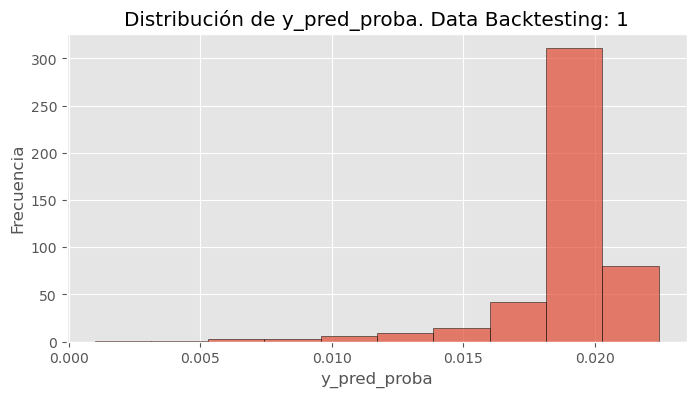

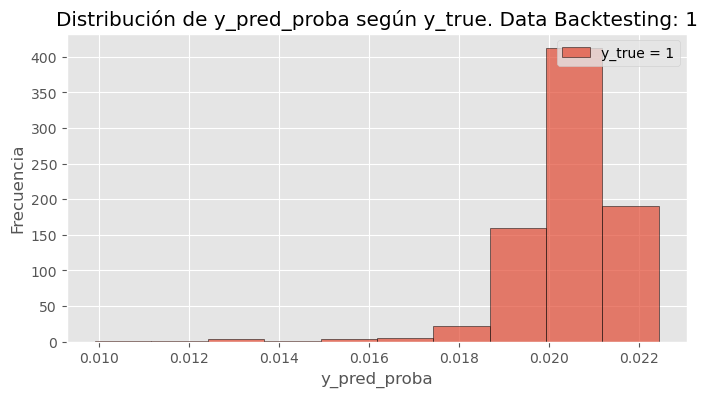

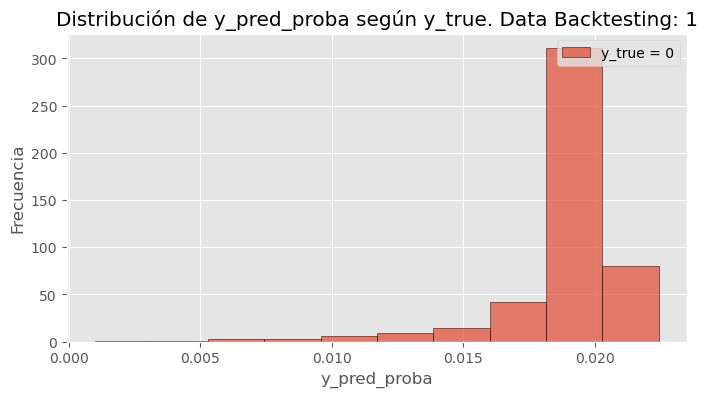

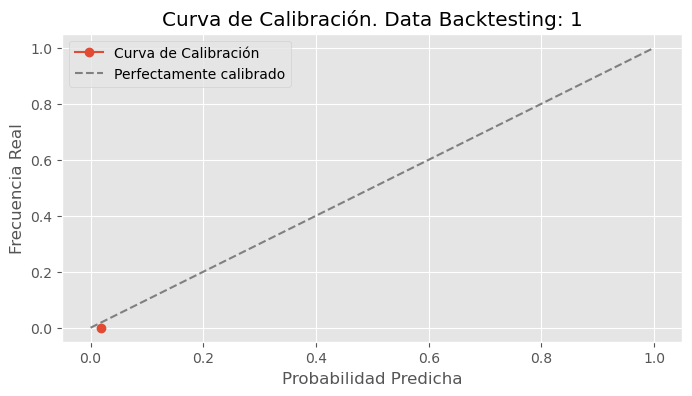

[03/30/25 20:07:49] INFO     Escenarios no medibles:                                                   ]8;id=299181;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=71483;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#713\713]8;;\
                             {'No medible 1': 84441, 'No medible 1 %': 2.0372, 'Pronosticos sin el                 
                             hashvalue en la data real': 186354}                                                   

                    INFO     Marca de tiempo actual: 2025-03-30 20:07                                  ]8;id=296622;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=600143;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#721\721]8;;\

[03/30/25 20:07:50] INFO     Metricas calculadas en %                                                  ]8;id=235327;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=661237;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#773\773]8;;\

                    INFO     Metricas N_top de Backtesting:                                            ]8;id=162110;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=45719;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#774\774]8;;\

                    INFO       model_name model_type dataset_name            metric_name    value      ]8;id=99953;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=854828;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#775\775]8;;\
                             0        FID  Ensamble,       202502                N n_top  1243507                  
                             1        FID  Ensamble,       202502                  N all  4145024                  
                             2        FID  Ensamble,       202502  backtest_metric n_top   0.0708                  
                             3        FID  Ensamble,       202502        Precision n_top   0.0708                  
                             5        FID  Ensamble,       202502           recall n_top    100.0                  
                             7        FID  Ensamble,       202502         f1-score n_top   0.1416                  
                             9        FID  Ensamble,       202502         true_sum n_top      881                  

[03/30/25 20:07:53] INFO     Matriz de confusión calculada toda la data: TN=0, FP=4059328, FN=0,       ]8;id=826264;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=269850;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#779\779]8;;\
                             TP=1255                                                                               

                    INFO     Calculando metricas generales..                                           ]8;id=938298;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=246410;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#781\781]8;;\

[03/30/25 20:08:05] INFO     Ok metricas generales                                                     ]8;id=787404;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=971852;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#802\802]8;;\

[03/30/25 20:08:08] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=952795;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=140677;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

[03/30/25 20:08:12] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=981298;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=523543;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

[03/30/25 20:08:14] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=710455;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=189402;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    INFO     Ok Reporte de clasificación                                               ]8;id=857211;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=946957;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#818\818]8;;\

                    INFO     Ok Reporte completo                                                       ]8;id=140114;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=989485;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#837\837]8;;\

                    INFO     Evaluación completada. Dimensión del DataFrame resultante: (33, 8)        ]8;id=287979;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=360650;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#845\845]8;;\

                    INFO     ------------------------------------------------------------------------- ]8;id=574991;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=706311;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#856\856]8;;\
                             ----------                                                                            

                    INFO     CALCULOS: 2                                                               ]8;id=416024;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=856419;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#851\851]8;;\

                    INFO     N_top: 1243483                                                            ]8;id=932510;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=127232;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#701\701]8;;\

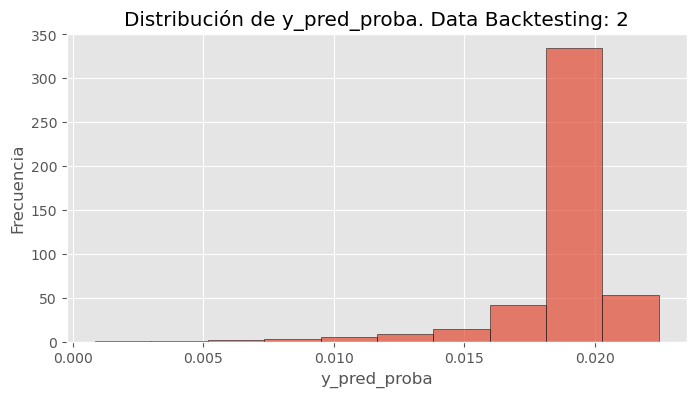

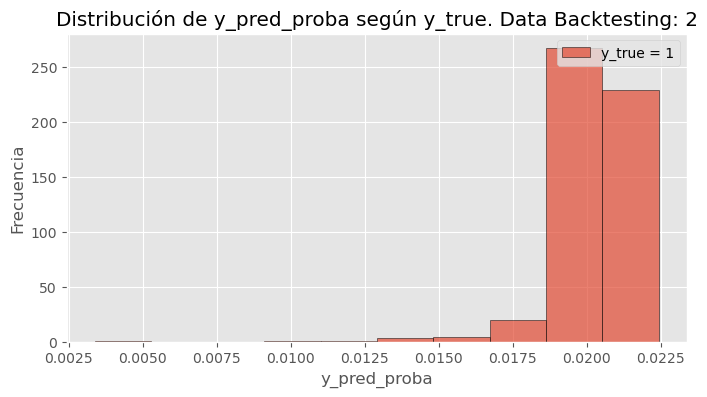

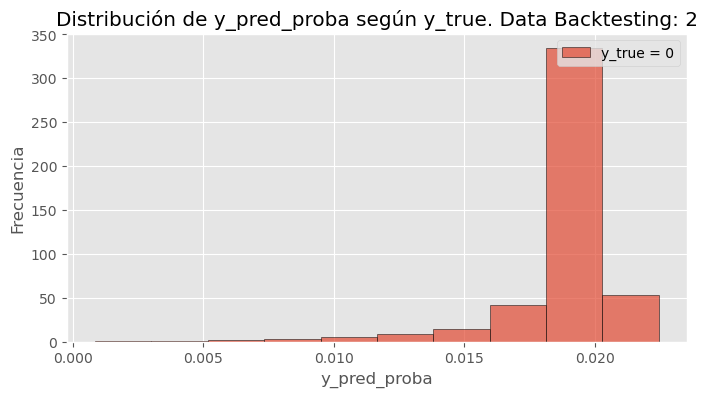

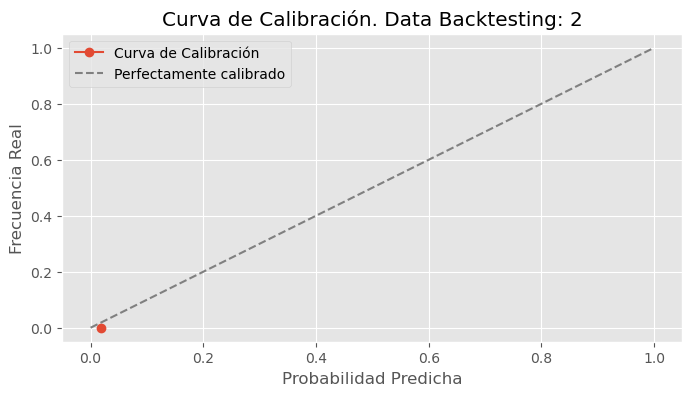

[03/30/25 20:08:16] INFO     Escenarios no medibles:                                                   ]8;id=631487;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=785194;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#713\713]8;;\
                             {'No medible 1': 161781, 'No medible 1 %': 3.9031, 'Pronosticos sin el                
                             hashvalue en la data real': 263773}                                                   

                    INFO     Marca de tiempo actual: 2025-03-30 20:08                                  ]8;id=777991;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=460333;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#721\721]8;;\

[03/30/25 20:08:17] INFO     Metricas calculadas en %                                                  ]8;id=350510;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=360725;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#773\773]8;;\

                    INFO     Metricas N_top de Backtesting:                                            ]8;id=8537;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=600289;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#774\774]8;;\

                    INFO       model_name model_type dataset_name            metric_name    value      ]8;id=713232;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=319829;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#775\775]8;;\
                             0        FID  Ensamble,       202502                N n_top  1243483                  
                             1        FID  Ensamble,       202502                  N all  4144945                  
                             2        FID  Ensamble,       202502  backtest_metric n_top   0.0754                  
                             3        FID  Ensamble,       202502        Precision n_top   0.0754                  
                             5        FID  Ensamble,       202502           recall n_top    100.0                  
                             7        FID  Ensamble,       202502         f1-score n_top   0.1508                  
                             9        FID  Ensamble,       202502         true_sum n_top      938                  

[03/30/25 20:08:20] INFO     Matriz de confusión calculada toda la data: TN=0, FP=3981948, FN=0,       ]8;id=74990;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=167917;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#779\779]8;;\
                             TP=1216                                                                               

                    INFO     Calculando metricas generales..                                           ]8;id=427459;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=498076;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#781\781]8;;\

[03/30/25 20:08:32] INFO     Ok metricas generales                                                     ]8;id=180711;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=883357;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#802\802]8;;\

[03/30/25 20:08:35] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=39645;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=945470;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

[03/30/25 20:08:39] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=980483;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=521049;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

[03/30/25 20:08:41] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=565011;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=751022;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    INFO     Ok Reporte de clasificación                                               ]8;id=40466;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=728039;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#818\818]8;;\

                    INFO     Ok Reporte completo                                                       ]8;id=47037;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=544739;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#837\837]8;;\

                    INFO     Evaluación completada. Dimensión del DataFrame resultante: (33, 8)        ]8;id=427580;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=157267;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#845\845]8;;\

                    INFO     ------------------------------------------------------------------------- ]8;id=322122;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=346418;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#856\856]8;;\
                             ----------                                                                            

                    INFO     CALCULOS: 3                                                               ]8;id=108312;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=722934;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#851\851]8;;\

                    INFO     N_top: 1243439                                                            ]8;id=961459;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=452692;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#701\701]8;;\

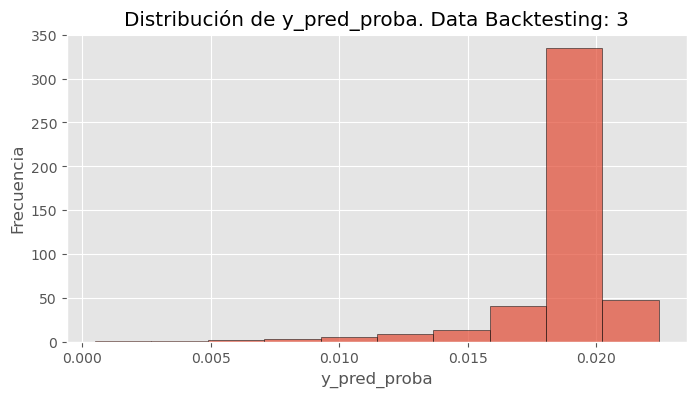

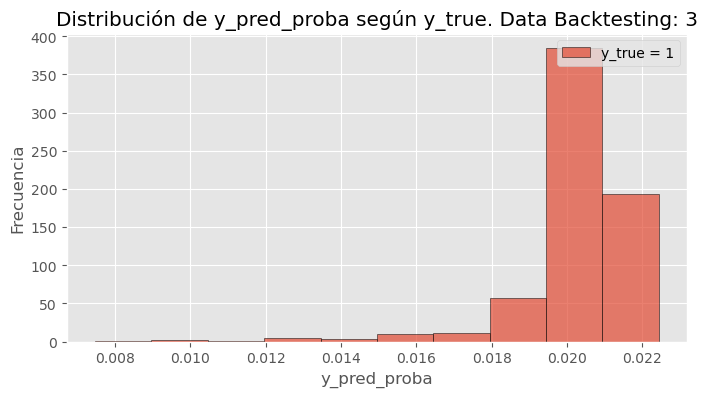

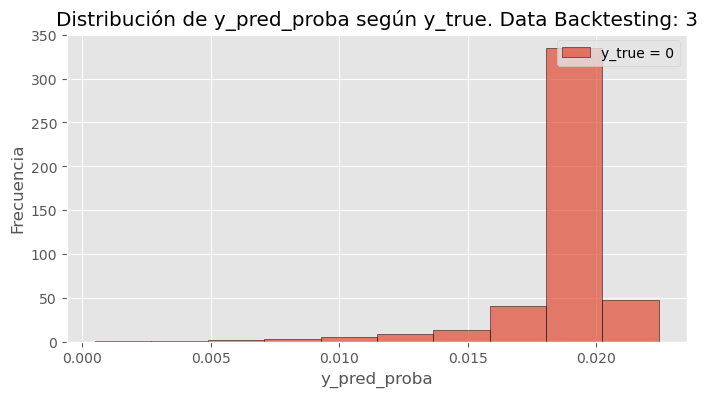

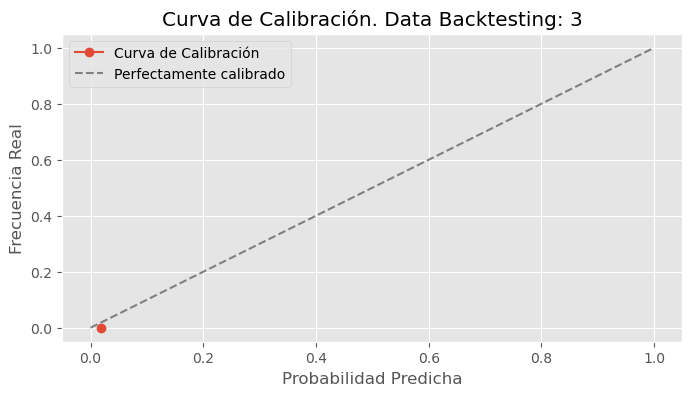

[03/30/25 20:08:43] INFO     Escenarios no medibles:                                                   ]8;id=772286;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=780924;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#713\713]8;;\
                             {'No medible 1': 233728, 'No medible 1 %': 5.6391, 'Pronosticos sin el                
                             hashvalue en la data real': 335867}                                                   

                    INFO     Marca de tiempo actual: 2025-03-30 20:08                                  ]8;id=218265;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=857023;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#721\721]8;;\

[03/30/25 20:08:44] INFO     Metricas calculadas en %                                                  ]8;id=566605;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=731681;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#773\773]8;;\

                    INFO     Metricas N_top de Backtesting:                                            ]8;id=452906;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=743901;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#774\774]8;;\

                    INFO       model_name model_type dataset_name            metric_name    value      ]8;id=691691;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=231361;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#775\775]8;;\
                             0        FID  Ensamble,       202502                N n_top  1243439                  
                             1        FID  Ensamble,       202502                  N all  4144798                  
                             2        FID  Ensamble,       202502  backtest_metric n_top   0.0709                  
                             3        FID  Ensamble,       202502        Precision n_top   0.0709                  
                             5        FID  Ensamble,       202502           recall n_top    100.0                  
                             7        FID  Ensamble,       202502         f1-score n_top   0.1416                  
                             9        FID  Ensamble,       202502         true_sum n_top      881                  

[03/30/25 20:08:46] INFO     Matriz de confusión calculada toda la data: TN=0, FP=3909876, FN=0,       ]8;id=350447;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=815006;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#779\779]8;;\
                             TP=1194                                                                               

                    INFO     Calculando metricas generales..                                           ]8;id=335656;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=688047;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#781\781]8;;\

[03/30/25 20:08:58] INFO     Ok metricas generales                                                     ]8;id=446069;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=210882;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#802\802]8;;\

[03/30/25 20:09:00] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=826513;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=391912;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

[03/30/25 20:09:04] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=684779;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=186137;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

[03/30/25 20:09:06] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=331829;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=493373;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    INFO     Ok Reporte de clasificación                                               ]8;id=839476;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=729970;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#818\818]8;;\

                    INFO     Ok Reporte completo                                                       ]8;id=447126;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=143325;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#837\837]8;;\

                    INFO     Evaluación completada. Dimensión del DataFrame resultante: (33, 8)        ]8;id=980422;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=272990;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#845\845]8;;\

                    INFO     ------------------------------------------------------------------------- ]8;id=664604;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=980752;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#856\856]8;;\
                             ----------                                                                            

                    INFO     CALCULOS: Combined                                                        ]8;id=7477;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=395337;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#851\851]8;;\

                    INFO     N_top: 1243439                                                            ]8;id=228080;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=309258;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#701\701]8;;\

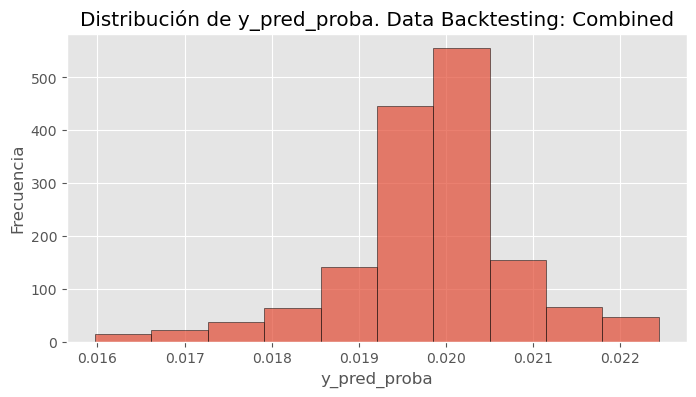

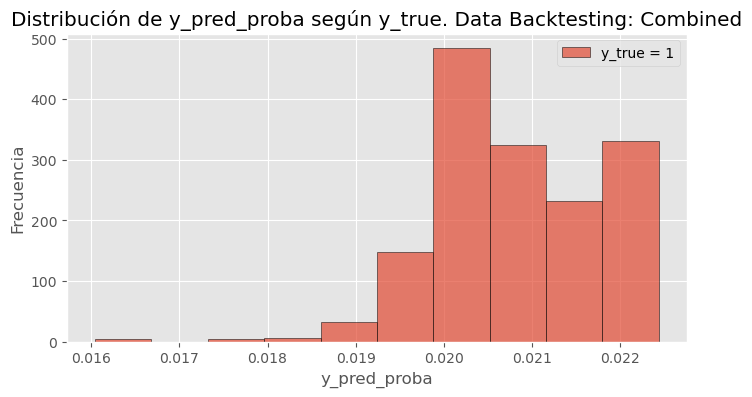

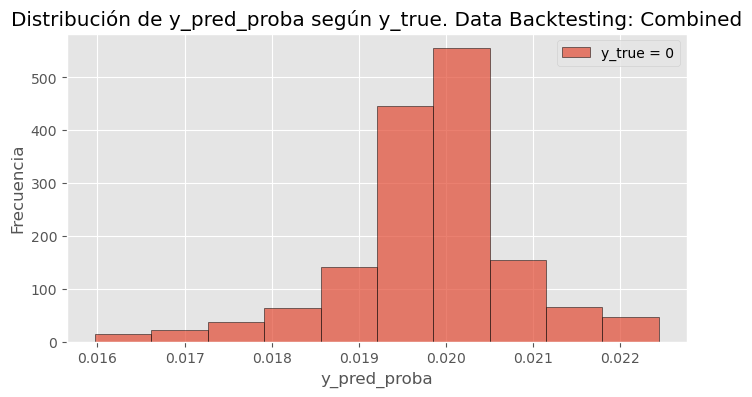

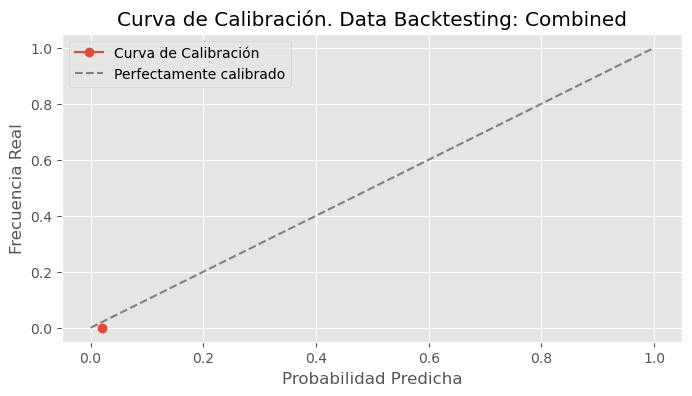

[03/30/25 20:09:08] INFO     Escenarios no medibles:                                                   ]8;id=888987;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=952828;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#713\713]8;;\
                             {'No medible 1': 217928, 'No medible 1 %': 5.2579, 'Pronosticos sin el                
                             hashvalue en la data real': 320066}                                                   

[03/30/25 20:09:09] INFO     Marca de tiempo actual: 2025-03-30 20:09                                  ]8;id=25216;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=818470;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#721\721]8;;\

                    INFO     Metricas calculadas en %                                                  ]8;id=707619;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=134079;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#773\773]8;;\

                    INFO     Metricas N_top de Backtesting:                                            ]8;id=129866;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=641352;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#774\774]8;;\

                    INFO       model_name model_type dataset_name            metric_name    value      ]8;id=603718;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=182820;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#775\775]8;;\
                             0        FID  Ensamble,       202502                N n_top  1243439                  
                             1        FID  Ensamble,       202502                  N all  4144799                  
                             2        FID  Ensamble,       202502  backtest_metric n_top   0.0755                  
                             3        FID  Ensamble,       202502        Precision n_top   0.0755                  
                             5        FID  Ensamble,       202502           recall n_top    100.0                  
                             7        FID  Ensamble,       202502         f1-score n_top   0.1509                  
                             9        FID  Ensamble,       202502         true_sum n_top      939                  

[03/30/25 20:09:12] INFO     Matriz de confusión calculada toda la data: TN=0, FP=3925621, FN=0,       ]8;id=175997;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=705629;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#779\779]8;;\
                             TP=1250                                                                               

                    INFO     Calculando metricas generales..                                           ]8;id=373963;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=128203;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#781\781]8;;\

[03/30/25 20:09:24] INFO     Ok metricas generales                                                     ]8;id=19823;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=720947;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#802\802]8;;\

[03/30/25 20:09:27] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=572694;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=634606;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

[03/30/25 20:09:31] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=258909;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=880119;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

[03/30/25 20:09:33] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=405454;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=978947;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    INFO     Ok Reporte de clasificación                                               ]8;id=752036;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=8946;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#818\818]8;;\

                    INFO     Ok Reporte completo                                                       ]8;id=762767;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=689562;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#837\837]8;;\

                    INFO     Evaluación completada. Dimensión del DataFrame resultante: (33, 8)        ]8;id=79586;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=466667;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#845\845]8;;\

                    INFO     ------------------------------------------------------------------------- ]8;id=439492;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=578157;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#856\856]8;;\
                             ----------                                                                            

In [21]:
data_metrics_backtesting = backtesting.generate_metrics_all(data_process1,parametros)

In [22]:
data_backtesting = backtesting.generate_ks_all(data_metrics_backtesting,parametros)

                    INFO     CALCULOS: 1                                                               ]8;id=133472;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=697366;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#976\976]8;;\

                    INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=143452;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=491703;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#887\887]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=780339;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=982993;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#925\925]8;;\

                    INFO     Deciles donde el ks aumenta:  [9, 8, 7]                                   ]8;id=817965;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=989484;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#949\949]8;;\

decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      2.06      2.24          414503              461            0.11   
1      9      2.02      2.06          414442              213            0.05   
2      8      2.00      2.02          414433              201            0.05   
3      7      1.99      2.00          414631              129            0.03   
4      6      1.97      1.99          414503               63            0.02   
5      5      1.95      1.97          414502               56            0.01   
6      4      1.92      1.95          414419               40            0.01   
7      3      1.85      1.92          414574               40            0.01   
8      2      1.70      1.85          414514               29            0.01   
9      1      0.10      1.70          414503               23            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          36.73                10.0    26.73  
1          53.71                20.0    33.71  
2          69.72                30.0    39.72  
3          80.00                40.0    40.00  
4          85.02                50.0    35.02  
5          89.48                60.0    29.48  
6          92.67                70.0    22.67  
7          95.86                80.0    15.86  
8          98.17                90.0     8.17  
9         100.00               100.0     0.00

                    INFO     ------------------------------------------------------------------------- ]8;id=302194;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=456821;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#986\986]8;;\
                             ----------                                                                            

                    INFO     CALCULOS: 2                                                               ]8;id=646825;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=659925;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#976\976]8;;\

                    INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=145651;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=118883;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#887\887]8;;\

[03/30/25 20:09:34] INFO     Calculando el estadístico KS para cada decil...                           ]8;id=950127;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=244266;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#925\925]8;;\

                    INFO     Deciles donde el ks aumenta:  [9]                                         ]8;id=260886;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=285215;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#949\949]8;;\

decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      2.03      2.24          414495              618            0.15   
1      9      2.00      2.03          414494              225            0.05   
2      8      1.99      2.00          414495               90            0.02   
3      7      1.98      1.99          414494               53            0.01   
4      6      1.96      1.98          414494               54            0.01   
5      5      1.94      1.96          414495               41            0.01   
6      4      1.91      1.94          414420               34            0.01   
7      3      1.85      1.91          414569               42            0.01   
8      2      1.69      1.85          414494               38            0.01   
9      1      0.09      1.69          414495               21            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          50.82                10.0    40.82  
1          69.33                20.0    49.33  
2          76.73                30.0    46.73  
3          81.09                40.0    41.09  
4          85.53                50.0    35.53  
5          88.90                60.0    28.90  
6          91.69                70.0    21.70  
7          95.15                80.0    15.15  
8          98.27                90.0     8.27  
9         100.00               100.0     0.00

                    INFO     ------------------------------------------------------------------------- ]8;id=666311;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=504095;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#986\986]8;;\
                             ----------                                                                            

                    INFO     CALCULOS: 3                                                               ]8;id=522039;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=191073;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#976\976]8;;\

                    INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=657448;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=770700;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#887\887]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=793426;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=635740;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#925\925]8;;\

                    INFO     Deciles donde el ks aumenta:  [9]                                         ]8;id=367610;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=424518;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#949\949]8;;\

decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      2.02      2.24          414480              599            0.14   
1      9      2.00      2.02          414480              201            0.05   
2      8      1.99      2.00          414480               76            0.02   
3      7      1.98      1.99          414479               59            0.01   
4      6      1.96      1.98          414480               58            0.01   
5      5      1.94      1.96          414447               51            0.01   
6      4      1.91      1.94          414512               37            0.01   
7      3      1.84      1.91          414474               39            0.01   
8      2      1.68      1.84          414486               33            0.01   
9      1      0.05      1.68          414480               41            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          50.17                10.0    40.17  
1          67.00                20.0    47.00  
2          73.37                30.0    43.37  
3          78.31                40.0    38.31  
4          83.17                50.0    33.17  
5          87.44                60.0    27.44  
6          90.54                70.0    20.54  
7          93.80                80.0    13.80  
8          96.57                90.0     6.57  
9         100.00               100.0     0.00

                    INFO     ------------------------------------------------------------------------- ]8;id=796894;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=928645;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#986\986]8;;\
                             ----------                                                                            

[03/30/25 20:09:35] INFO     CALCULOS: Combined                                                        ]8;id=754485;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=611111;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#976\976]8;;\

                    INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=829042;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=171827;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#887\887]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=649575;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=713831;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#925\925]8;;\

                    INFO     Deciles donde el ks aumenta:  [9, 8]                                      ]8;id=592718;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=61875;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#949\949]8;;\

decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      2.09      2.24          414480              558            0.13   
1      9      2.04      2.09          414480              222            0.05   
2      8      2.01      2.04          414480              153            0.04   
3      7      2.00      2.01          414480              114            0.03   
4      6      1.99      2.00          414476               50            0.01   
5      5      1.97      1.99          414483               42            0.01   
6      4      1.96      1.97          414480               50            0.01   
7      3      1.93      1.96          414480               24            0.01   
8      2      1.86      1.93          414480               26            0.01   
9      1      1.60      1.86          414480               11            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          44.64                10.0    34.64  
1          62.40                20.0    42.40  
2          74.64                30.0    44.64  
3          83.76                40.0    43.76  
4          87.76                50.0    37.76  
5          91.12                60.0    31.12  
6          95.12                70.0    25.12  
7          97.04                80.0    17.04  
8          99.12                90.0     9.12  
9         100.00               100.0     0.00

                    INFO     ------------------------------------------------------------------------- ]8;id=187091;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=881073;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#986\986]8;;\
                             ----------                                                                            

import boto3
import pandas as pd
import os
import pickle

# Save the DataFrame locally first
local_path = '/home/sagemaker-user/data-bbog-integration-fabrica-personas/notebooks/Calibracion de Productos/save_backtesting_v3_202502.pickle'
# Serialize the object to a file
with open(local_path, 'wb') as file:
    pickle.dump(data_backtesting, file)

# Initialize the S3 client using boto3
s3_client = boto3.client('s3')

# Define the S3 bucket and object path
bucket_name = 'data-bbog-dev-sandbox-entity'
s3_path = 'casos-uso/fabrica-personas/FID/09-backtesting/save_backtesting_v3_202502.pickle'

# Upload the file to S3
s3_client.upload_file(local_path, bucket_name, s3_path)

# Optionally, clean up the local file after upload
os.remove(local_path)

print(f"File uploaded to s3://{bucket_name}/{s3_path}")
